In [85]:
# import files
from google.colab import files
files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data (1).csv


{'Life Expectancy Data.csv': b"Country,Year,Status,Life expectancy ,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles , BMI ,under-five deaths ,Polio,Total expenditure,Diphtheria , HIV/AIDS,GDP,Population, thinness  1-19 years, thinness 5-9 years,Income composition of resources,Schooling\r\nAfghanistan,2015,Developing,65,263,62,0.01,71.27962362,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1\r\nAfghanistan,2014,Developing,59.9,271,64,0.01,73.52358168,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10\r\nAfghanistan,2013,Developing,59.9,268,66,0.01,73.21924272,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.47,9.9\r\nAfghanistan,2012,Developing,59.5,272,69,0.01,78.1842153,67,2787,17.6,93,67,8.52,67,0.1,669.959,3696958,17.9,18,0.463,9.8\r\nAfghanistan,2011,Developing,59.2,275,71,0.01,7.097108703,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5\r\nAfghanistan,2010,Developing,58.8,279,74,

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

# Some useful functions

In [0]:
def plot_data(data, column_x, column_y, x_label, y_label):
  plt.scatter(data[column_x], data[column_y])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  
  
def plot_expected_and_trained_data(data_X, data_y_expected, data_y_predicted):
  # apply PCA to reduce dimensionality to 1
  clf = TruncatedSVD(n_components=1)
  Xpca = clf.fit_transform(data_X)
  
  # make the figure bigger
  plt.figure(num=None, figsize=(30, 15), dpi=80, facecolor='w', edgecolor='k')
  
  # Scatter expected data with RED
  plt.scatter(Xpca, data_y_expected,  color='red')
  # Scatter predicted data with BLUE
  plt.scatter(Xpca, data_y_predicted, color='blue')
  
  plt.show()

In [0]:
# some constants
file_name = "Life Expectancy Data.csv"
used_columns = [ "Status", "Life expectancy ", "Adult Mortality", "Alcohol", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure", "Diphtheria ", "GDP"]

In [0]:
# read data and selecte only the used columns
data = pd.read_csv(file_name)
data = data[used_columns]

# Plotting Data

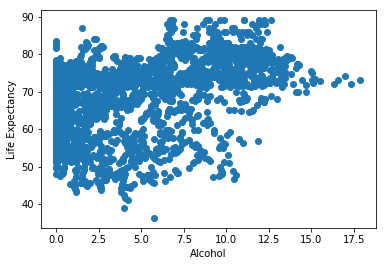

In [90]:
plot_data(data,  "Alcohol", "Life expectancy ",  "Alcohol", "Life Expectancy")

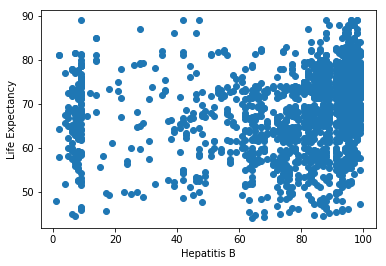

In [91]:
plot_data(data,  "Hepatitis B", "Life expectancy ",  "Hepatitis B", "Life Expectancy")

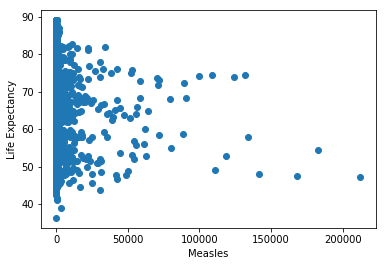

In [92]:
plot_data(data,  "Measles ", "Life expectancy ", "Measles", "Life Expectancy")

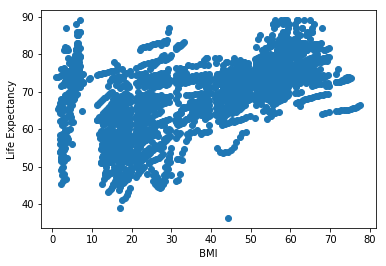

In [93]:
plot_data(data,  " BMI ", "Life expectancy ",  " BMI ", "Life Expectancy")

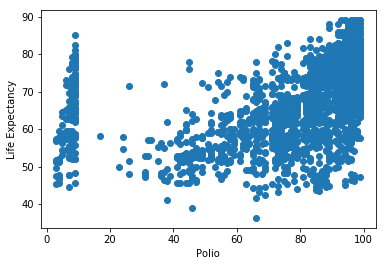

In [94]:
plot_data(data,  "Polio", "Life expectancy ", "Polio", "Life Expectancy")

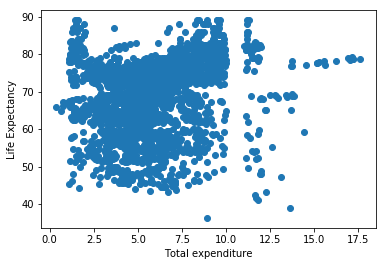

In [95]:
plot_data(data, "Total expenditure", "Life expectancy ", "Total expenditure", "Life Expectancy")

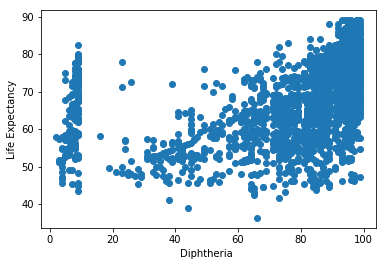

In [96]:
plot_data(data,  "Diphtheria ", "Life expectancy ", "Diphtheria ", "Life Expectancy")

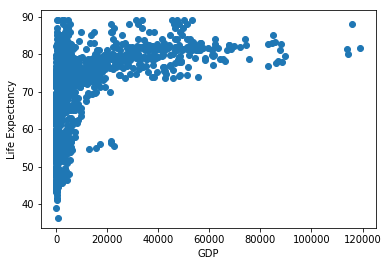

In [97]:
plot_data(data, "GDP", "Life expectancy ",  "GDP", "Life Expectancy")

In [98]:
# are there any NaN values?
data.isna().sum()

Status                 0
Life expectancy       10
Adult Mortality       10
Alcohol              194
Hepatitis B          553
Measles                0
 BMI                  34
Polio                 19
Total expenditure    226
Diphtheria            19
GDP                  448
dtype: int64

In [99]:
# there are NaN values -> replace NaN with mean values
data.fillna(value=data.mean(), inplace = True)
data.isna().sum()

Status               0
Life expectancy      0
Adult Mortality      0
Alcohol              0
Hepatitis B          0
Measles              0
 BMI                 0
Polio                0
Total expenditure    0
Diphtheria           0
GDP                  0
dtype: int64

# Data Manipulation

In [0]:
# Split data into features and labels
Y = data["Life expectancy "]
X = data.drop(["Life expectancy "], axis=1)

# Data Normalization

In [0]:
# Handle "Status" column which is categorical
categorical_columns = ["Status"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    unique_columns = set(X[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    X[column + "_encoded"] = label_encoder.fit_transform(X[column])
    X = X.drop(column, axis=1) # drop the old collumns

In [0]:
# Normalization
# Normalize X
X["Adult Mortality"] = X["Adult Mortality"] / 1000.0
X["Alcohol"] = (X["Alcohol"] - X["Alcohol"].min()) / (X["Alcohol"].max() - X["Alcohol"].min())
X["Hepatitis B"] = X["Hepatitis B"] / 100.0
X["Measles "] = X["Measles "] / 1000.0
X[" BMI "] = (X[" BMI "] - X[" BMI "].min()) / (X[" BMI "].max() - X[" BMI "].min())
X["Polio"] = X["Polio"] / 100.0
X["Total expenditure"] = X["Total expenditure"] / 100.0
X["Diphtheria "] = X["Diphtheria "] / 100.0
X["GDP"] = (X["GDP"] - X["GDP"].min()) / (X["GDP"].max() - X["GDP"].min())

# Normaliza Y - not necessary but it won't change the result and we can work with smaller numbers
Y = Y / 100.0

In [0]:
# Also try a polynomial transformer
poly_features_transformer = PolynomialFeatures(3, interaction_only = True)
poly_features_transformer.fit(X)
X_train_poly = poly_features_transformer.transform(X_train)
X_test_poly = poly_features_transformer.transform(X_test)

# Data Split - Train / Test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) # split data into train and test

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2497, 10)
(2497,)
(441, 10)
(441,)


# Linear Regression

LinearRegression {}
Mean squared error: 0.002789756953596122
Score (Variance): 0.7108178134989327
--------------------------------------------------------------------------------------------------------



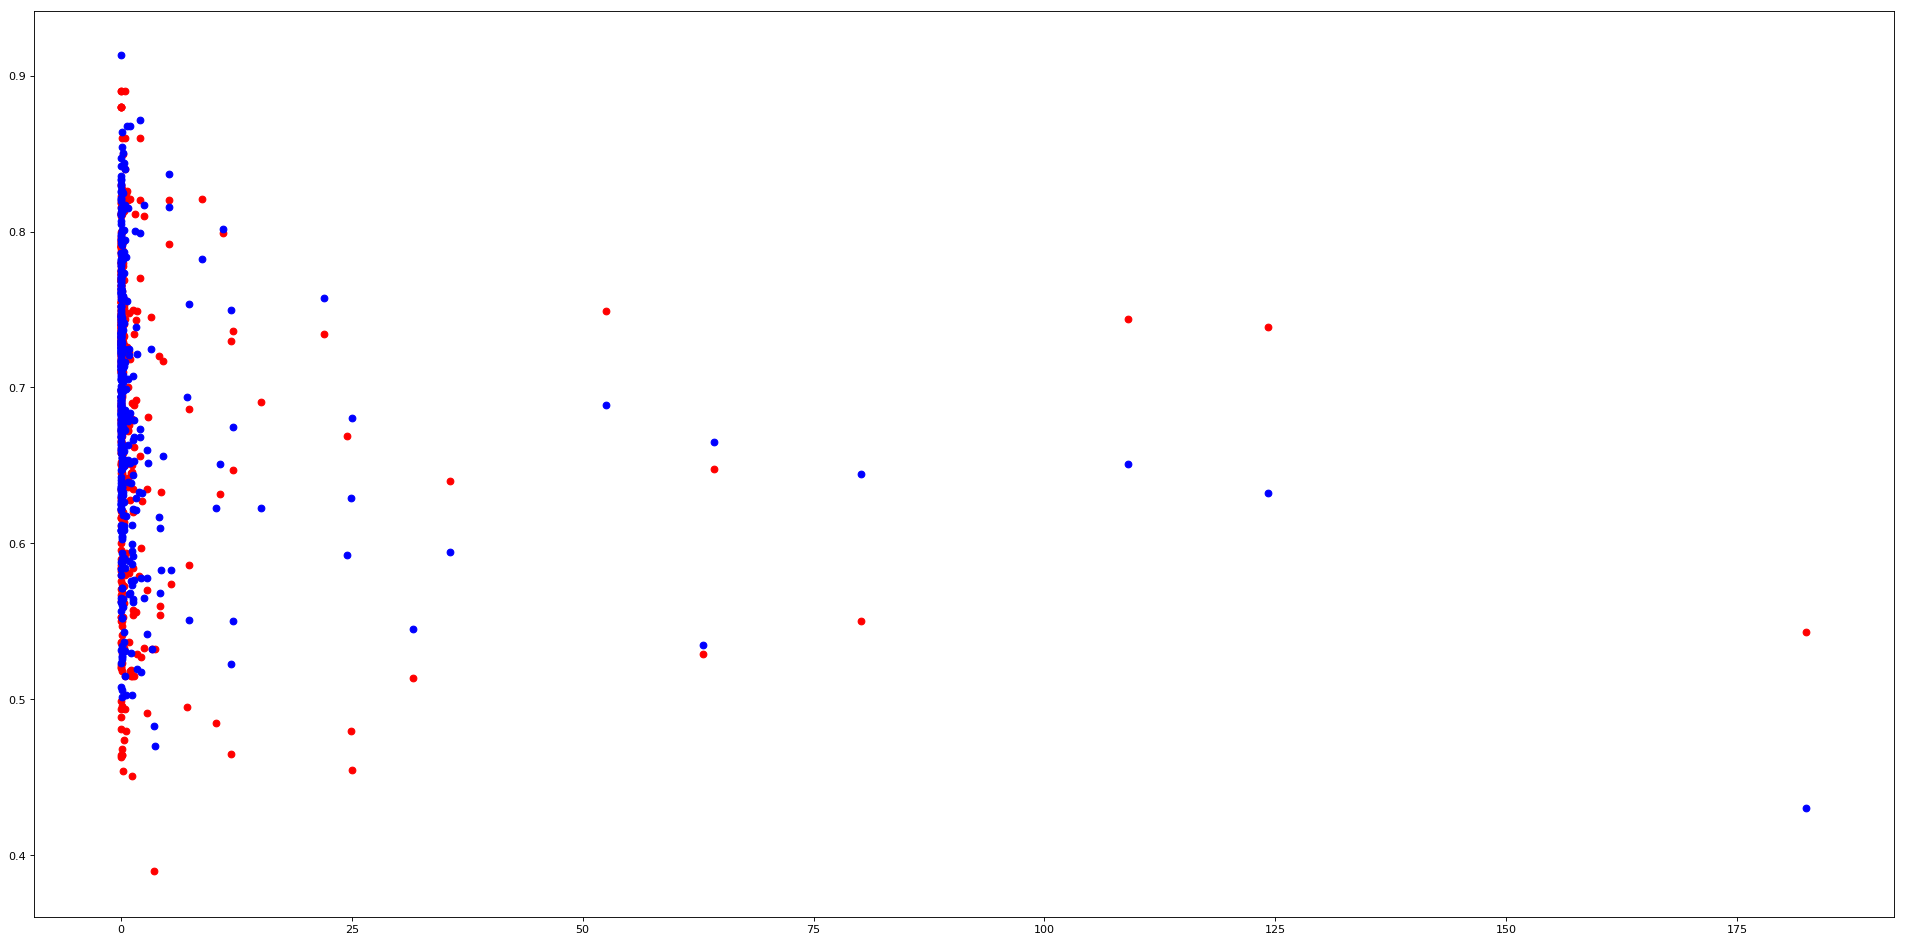

In [113]:
linear_regression_models = [(LinearRegression, {})]


for i, (Model, kwargs) in enumerate(linear_regression_models):
  model = Model(**kwargs)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Score (Variance):", model.score(X_test, y_test))
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_expected_and_trained_data(X_test, y_test, y_predicted)

# Linear Regression - Polynomial Features

LinearRegression {}
Mean squared error: 0.010913287722765553
Score (Variance): -0.1312556821541251
--------------------------------------------------------------------------------------------------------



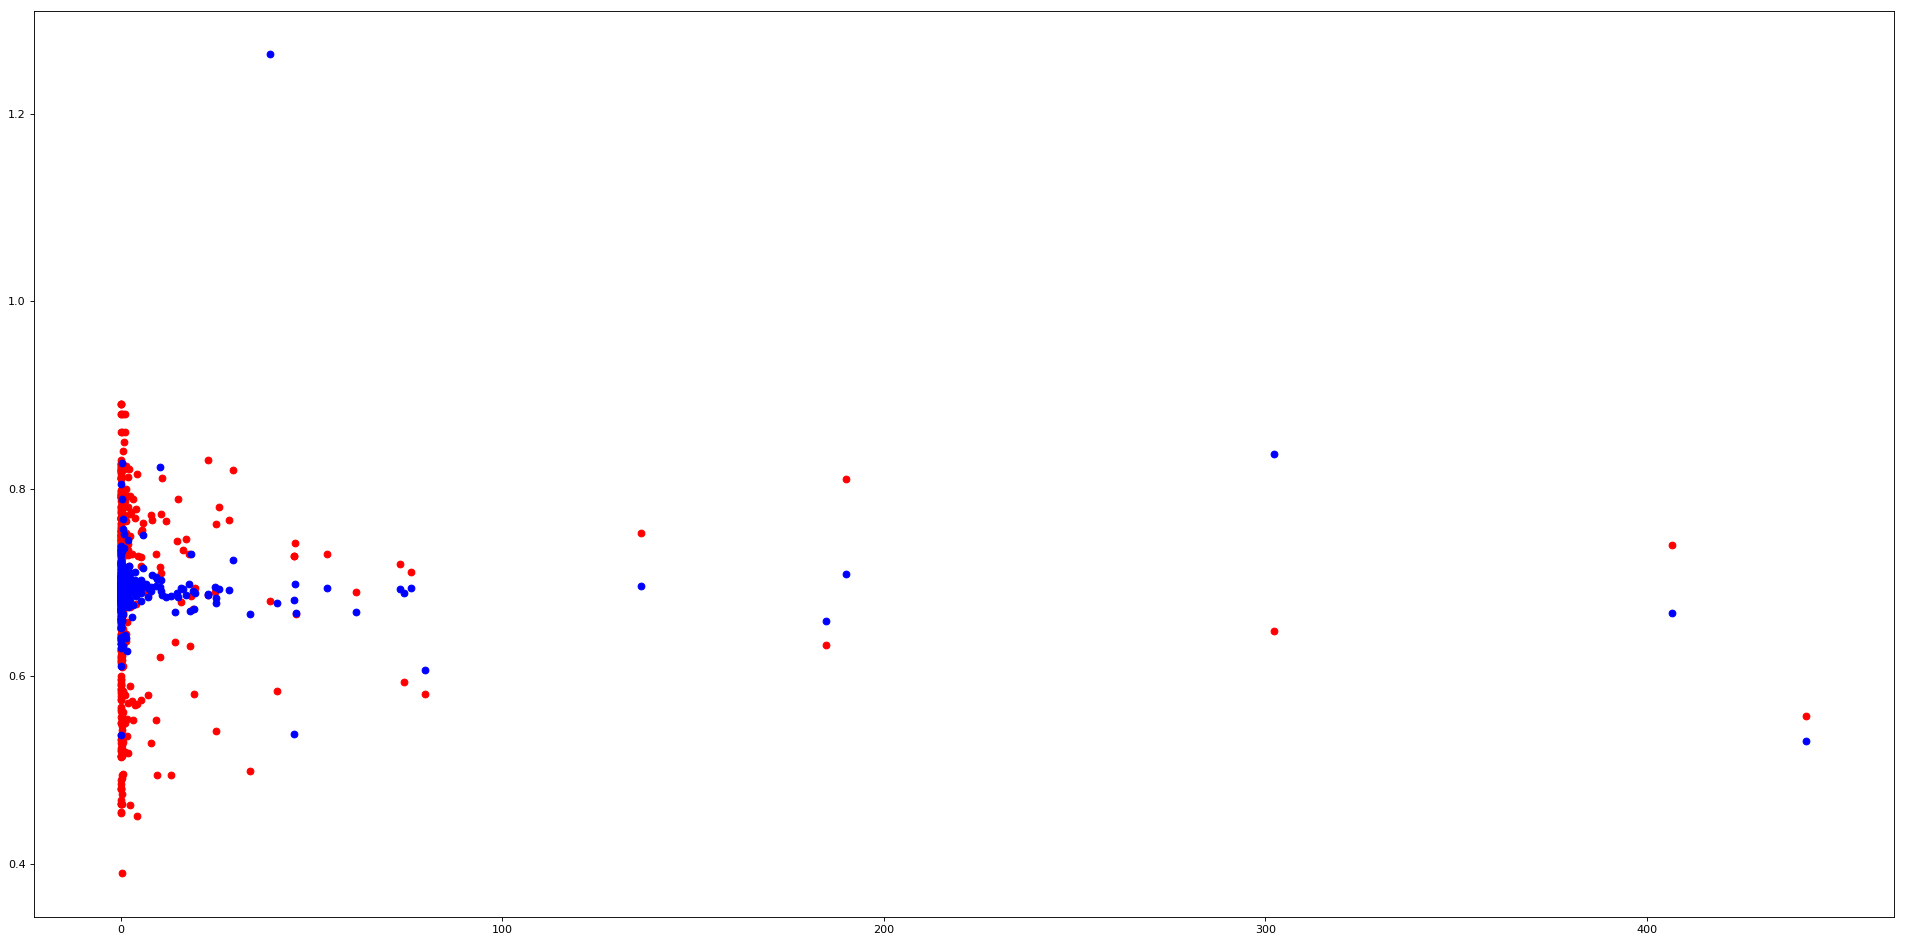

In [114]:
linear_regression_models = [(LinearRegression, {})]


for i, (Model, kwargs) in enumerate(linear_regression_models):
  model = Model(**kwargs)
  model.fit(X_train_poly, y_train)
  y_predicted = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Score (Variance):", model.score(X_test_poly, y_test))
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_expected_and_trained_data(X_test_poly, y_test, y_predicted)

# Decision Trees - Regression

DecisionTreeRegressor {}
Mean squared error: 0.0010393167710628527
Score (Variance): 0.892265920894736
--------------------------------------------------------------------------------------------------------



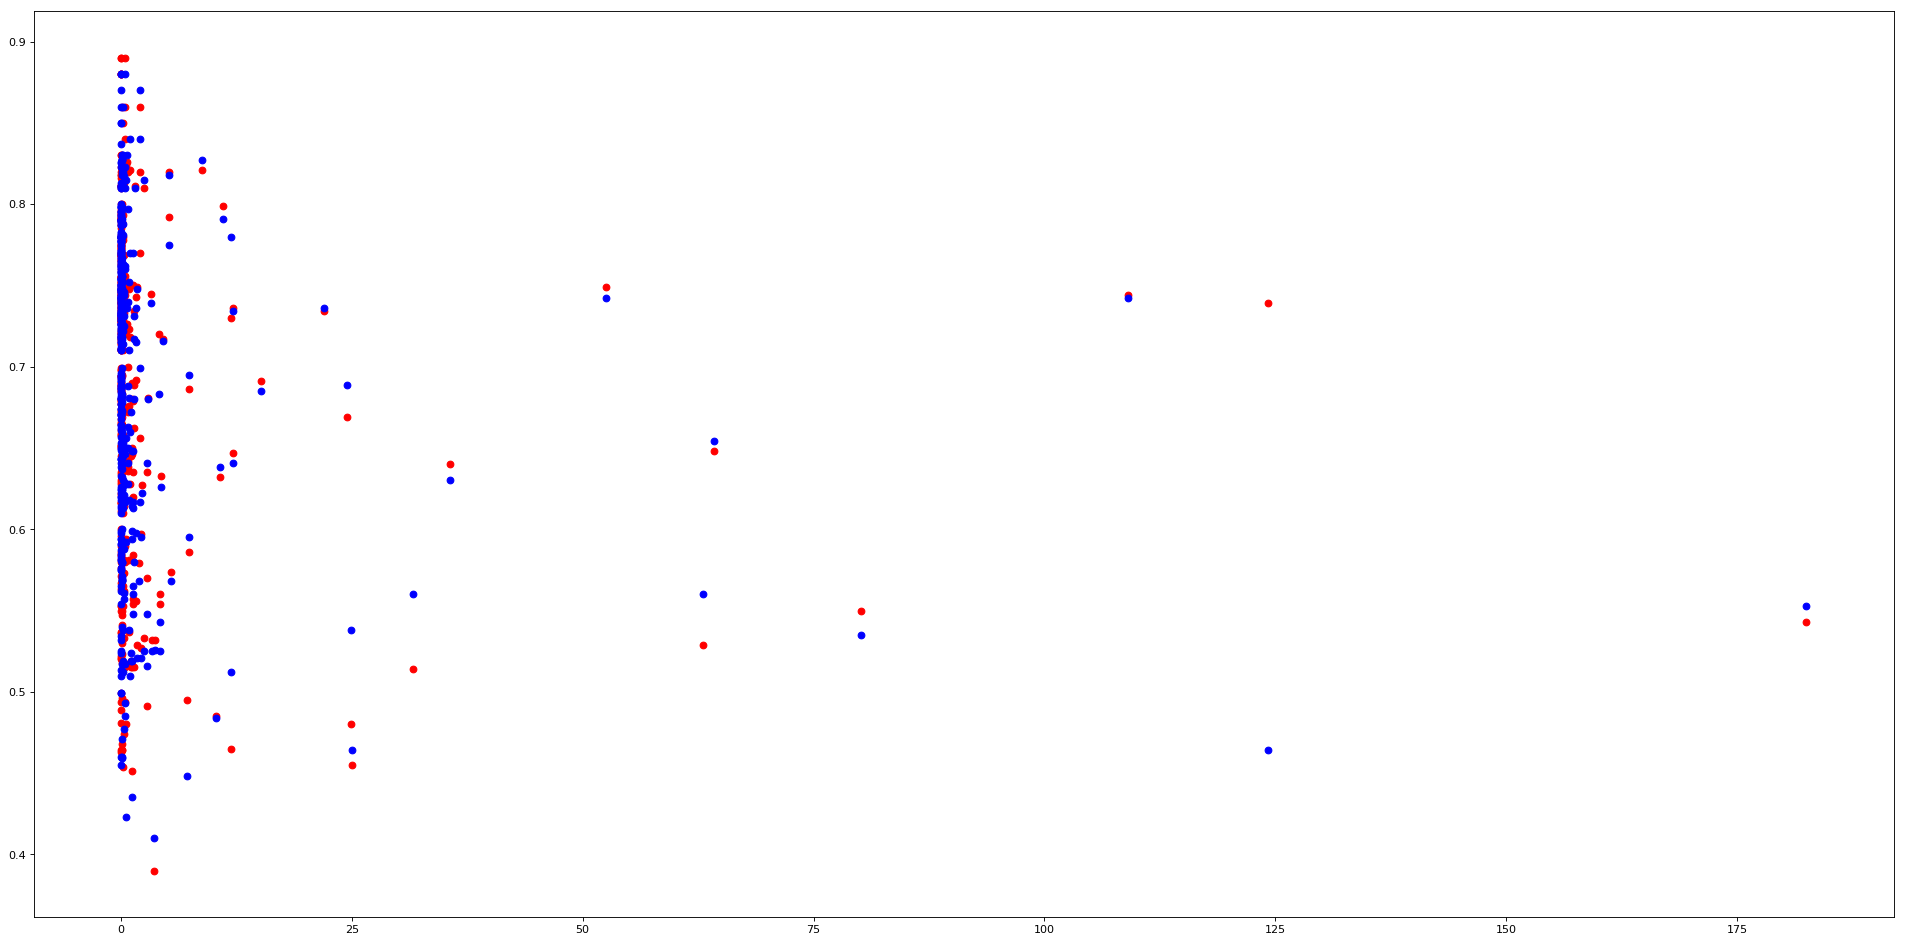

DecisionTreeRegressor {'max_depth': 2}
Mean squared error: 0.003726434699315182
Score (Variance): 0.6137231478848677
--------------------------------------------------------------------------------------------------------



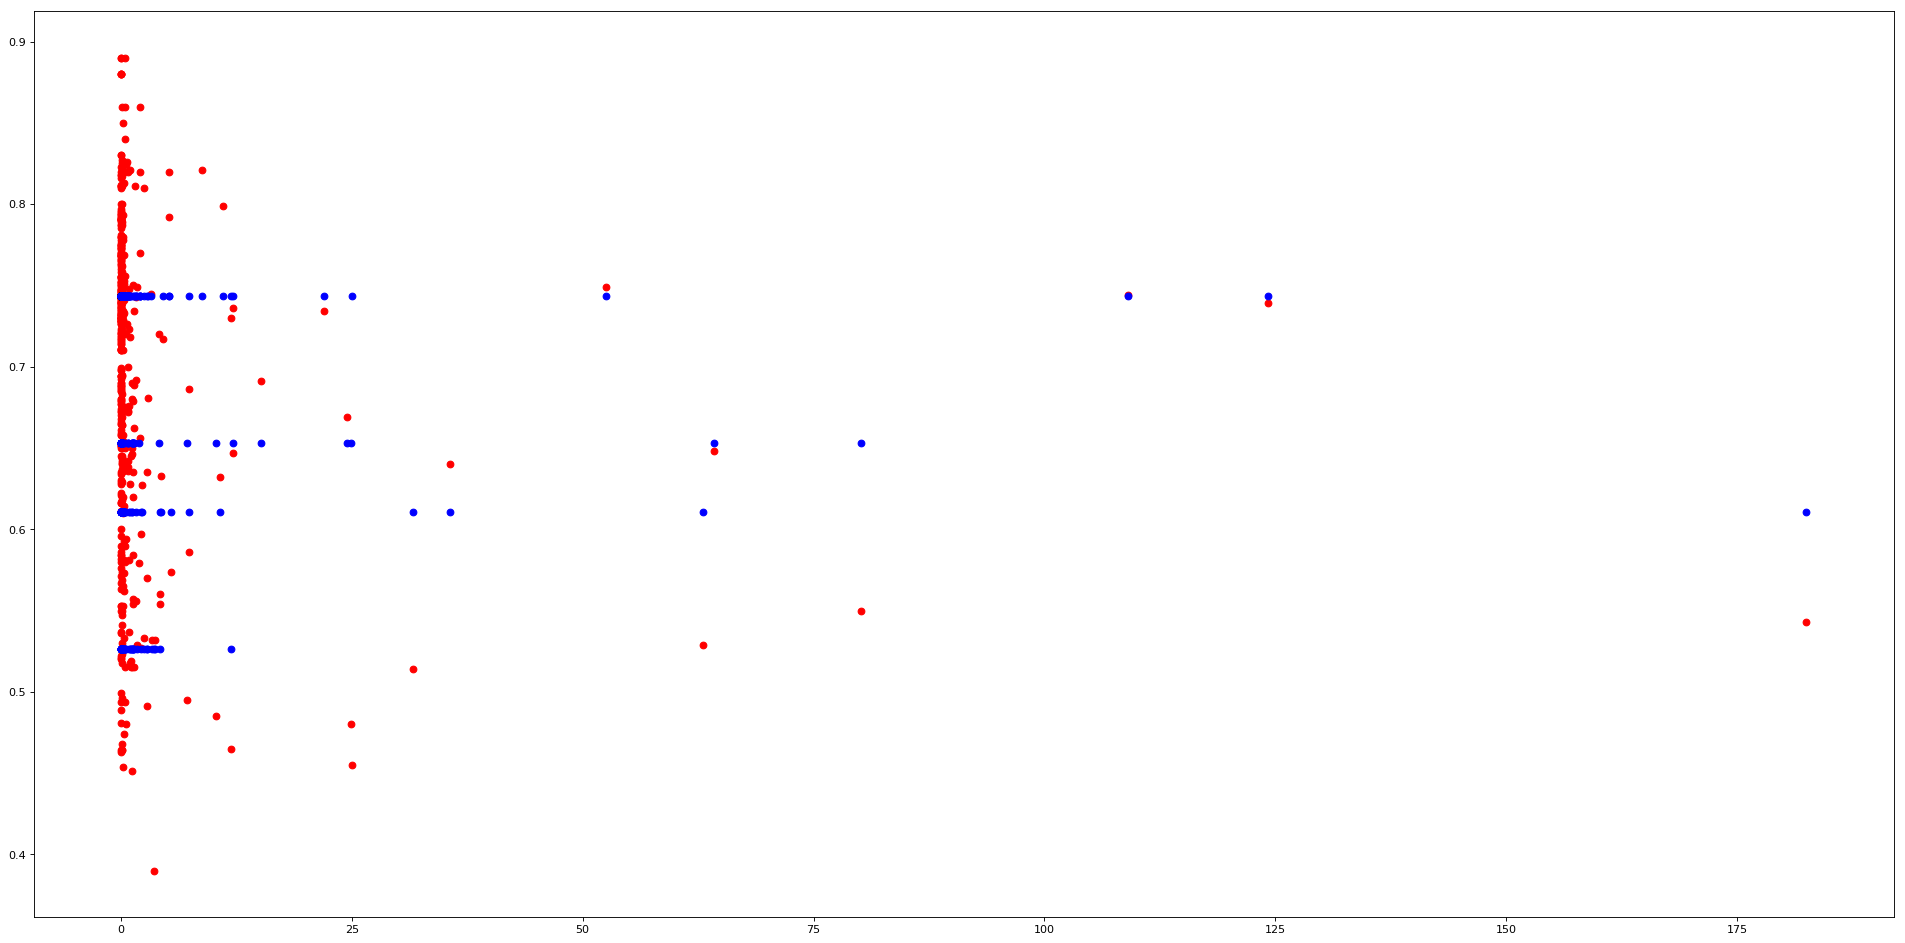

DecisionTreeRegressor {'max_depth': 5}
Mean squared error: 0.0016464169407610714
Score (Variance): 0.829334791976071
--------------------------------------------------------------------------------------------------------



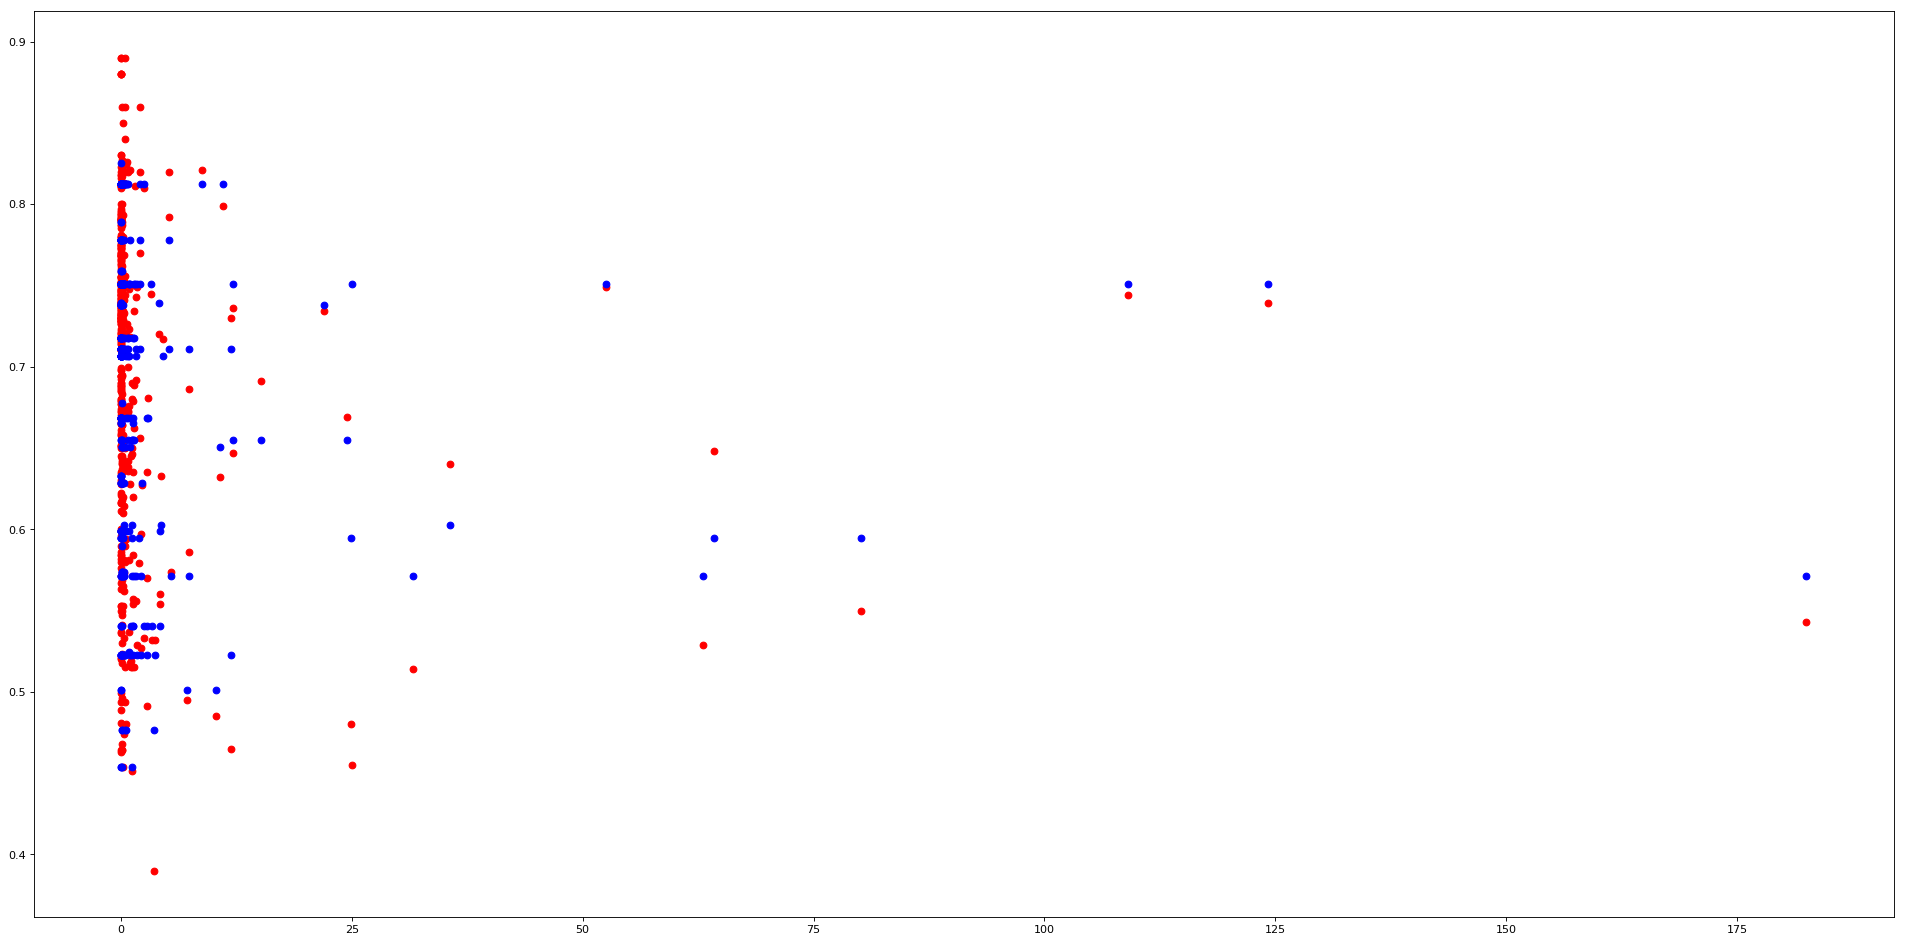

DecisionTreeRegressor {'max_depth': 7}
Mean squared error: 0.001024093637493742
Score (Variance): 0.8938439289879638
--------------------------------------------------------------------------------------------------------



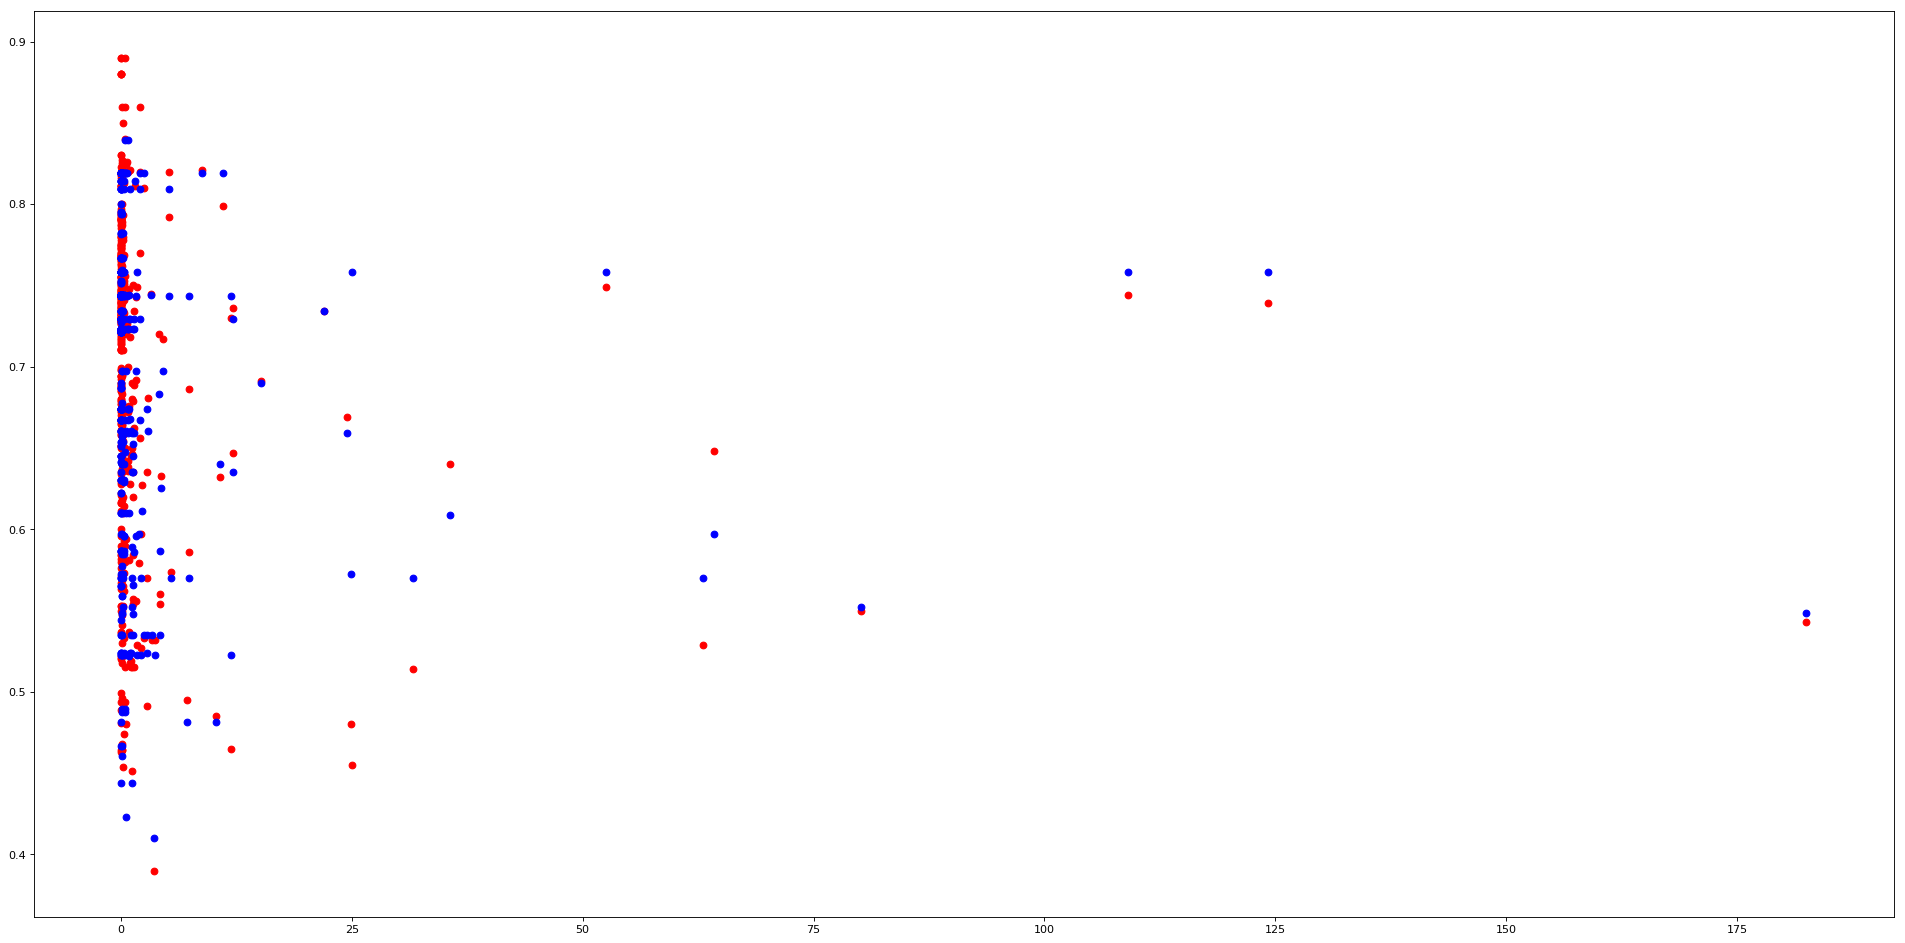

DecisionTreeRegressor {'max_depth': 10}
Mean squared error: 0.0007701117558612039
Score (Variance): 0.9201713249166579
--------------------------------------------------------------------------------------------------------



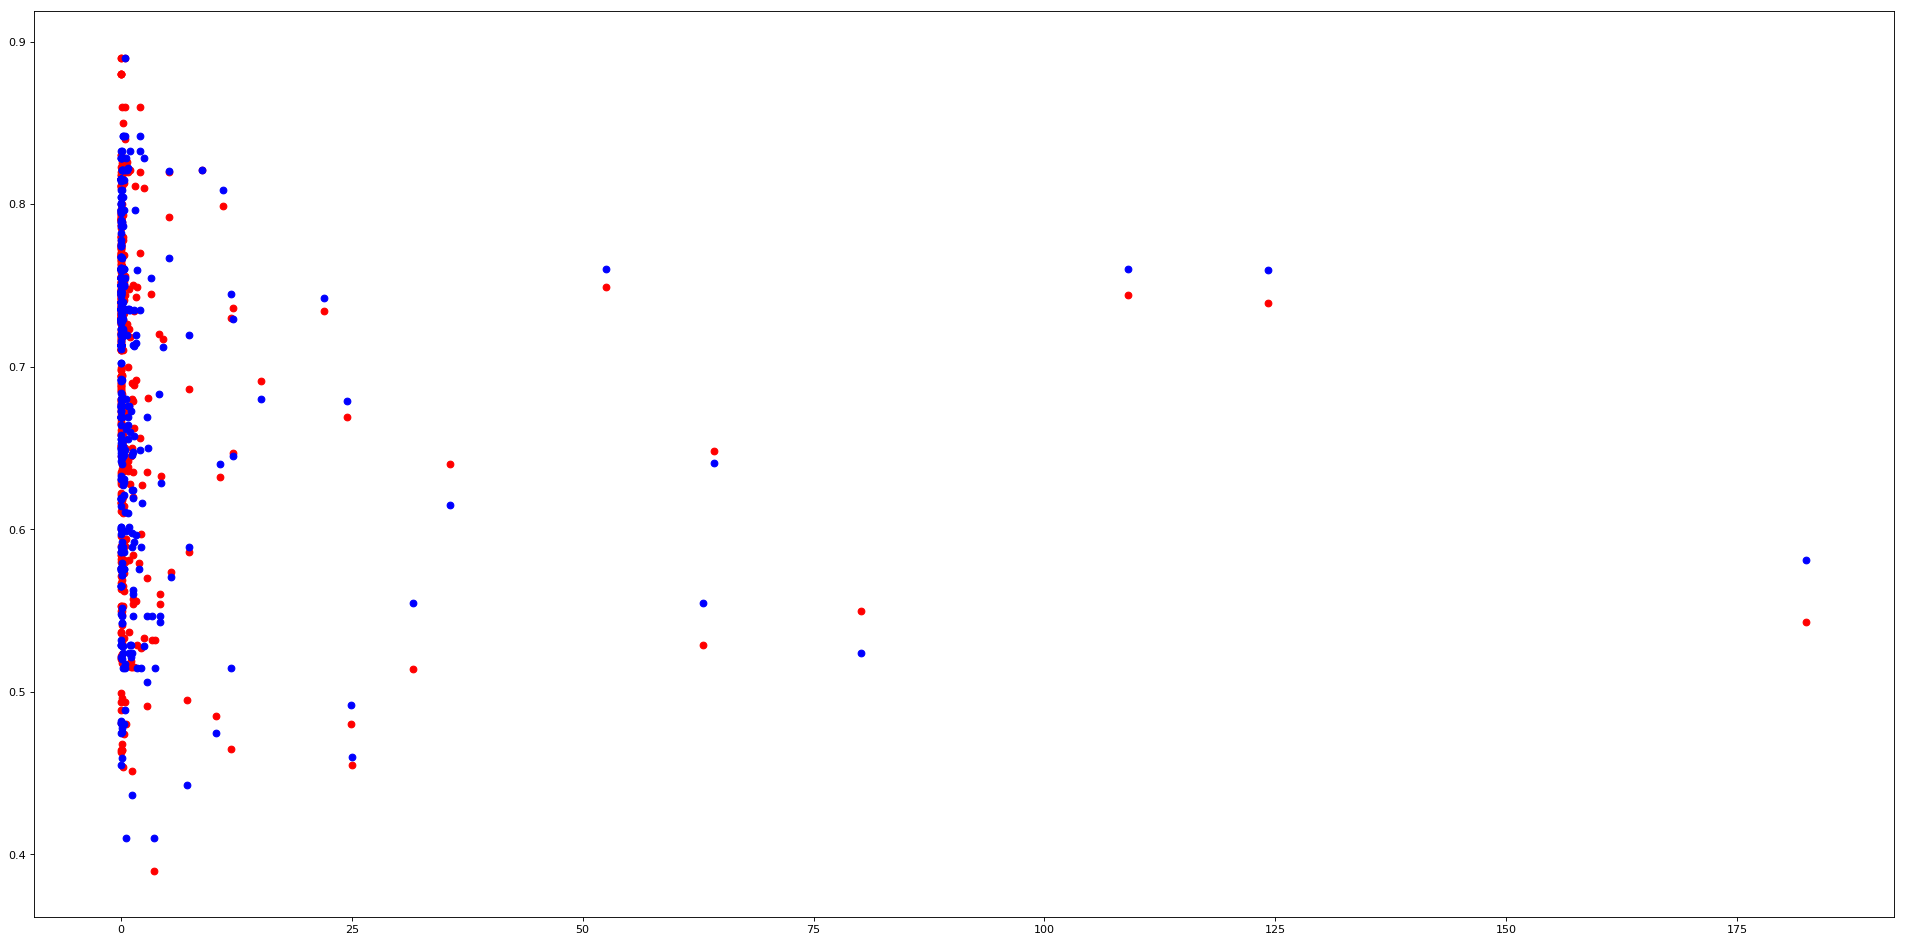

DecisionTreeRegressor {'criterion': 'friedman_mse'}
Mean squared error: 0.0010333734604052562
Score (Variance): 0.8928819959147493
--------------------------------------------------------------------------------------------------------



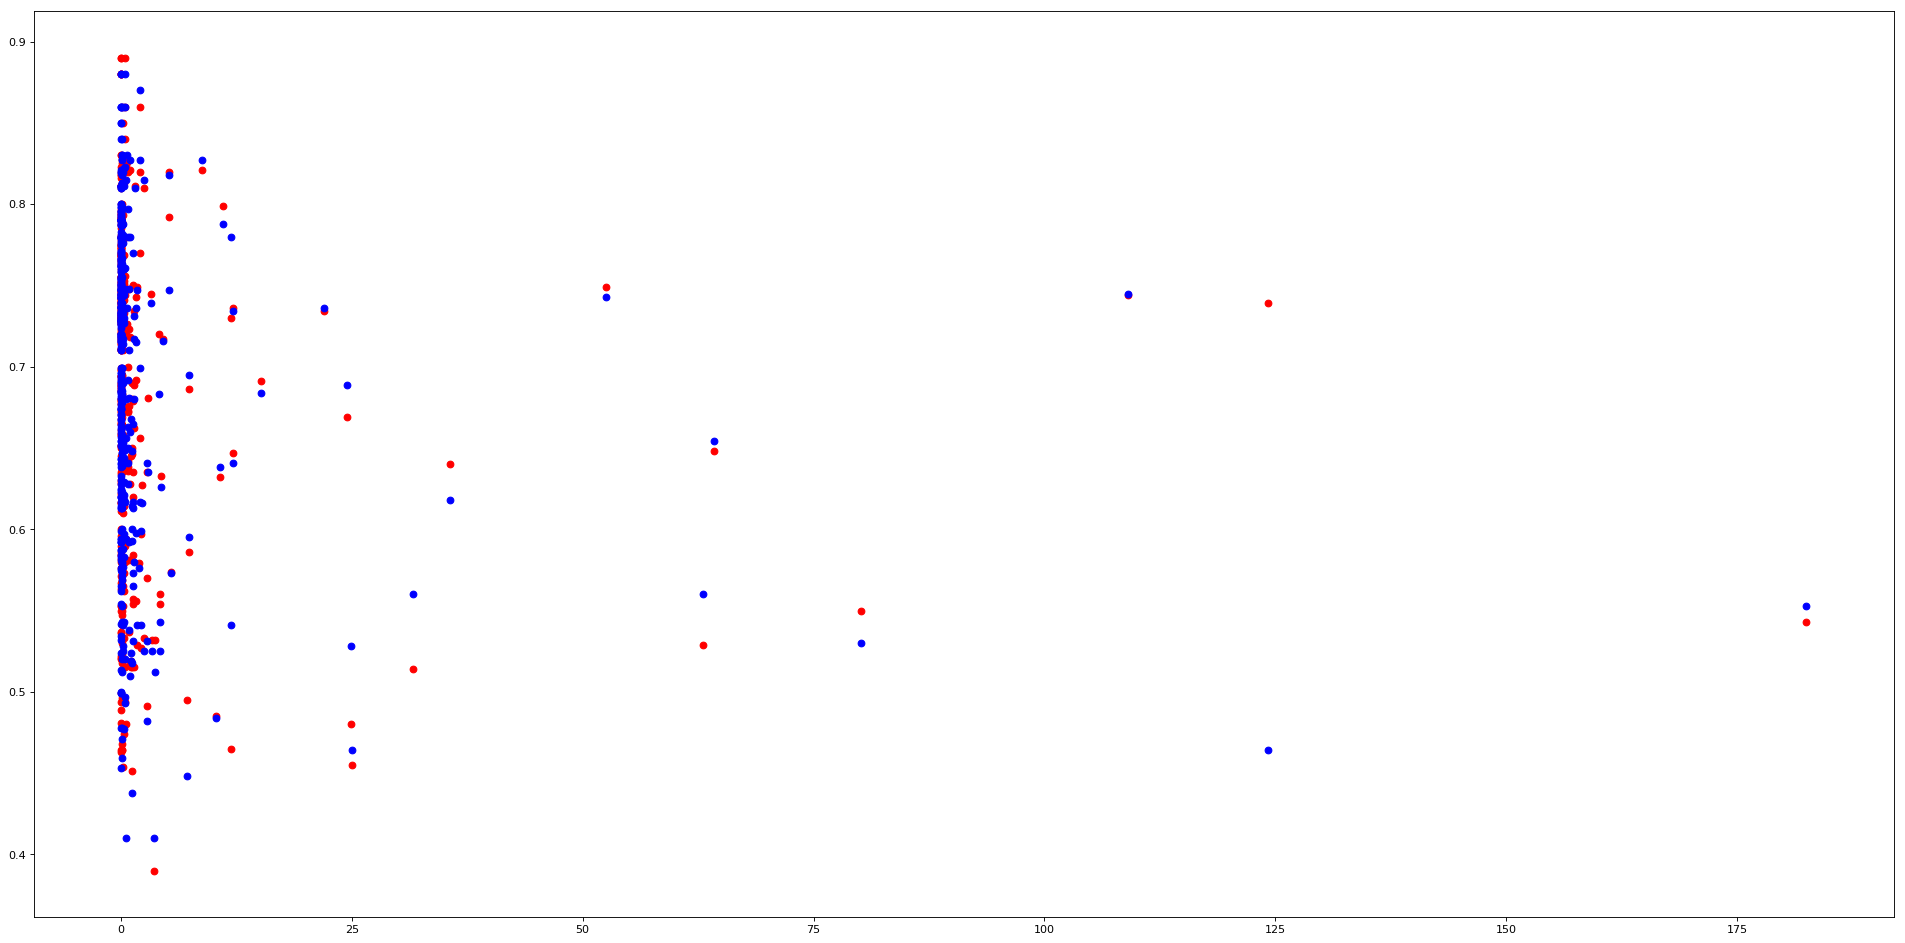

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 2}
Mean squared error: 0.0037264346993151807
Score (Variance): 0.6137231478848678
--------------------------------------------------------------------------------------------------------



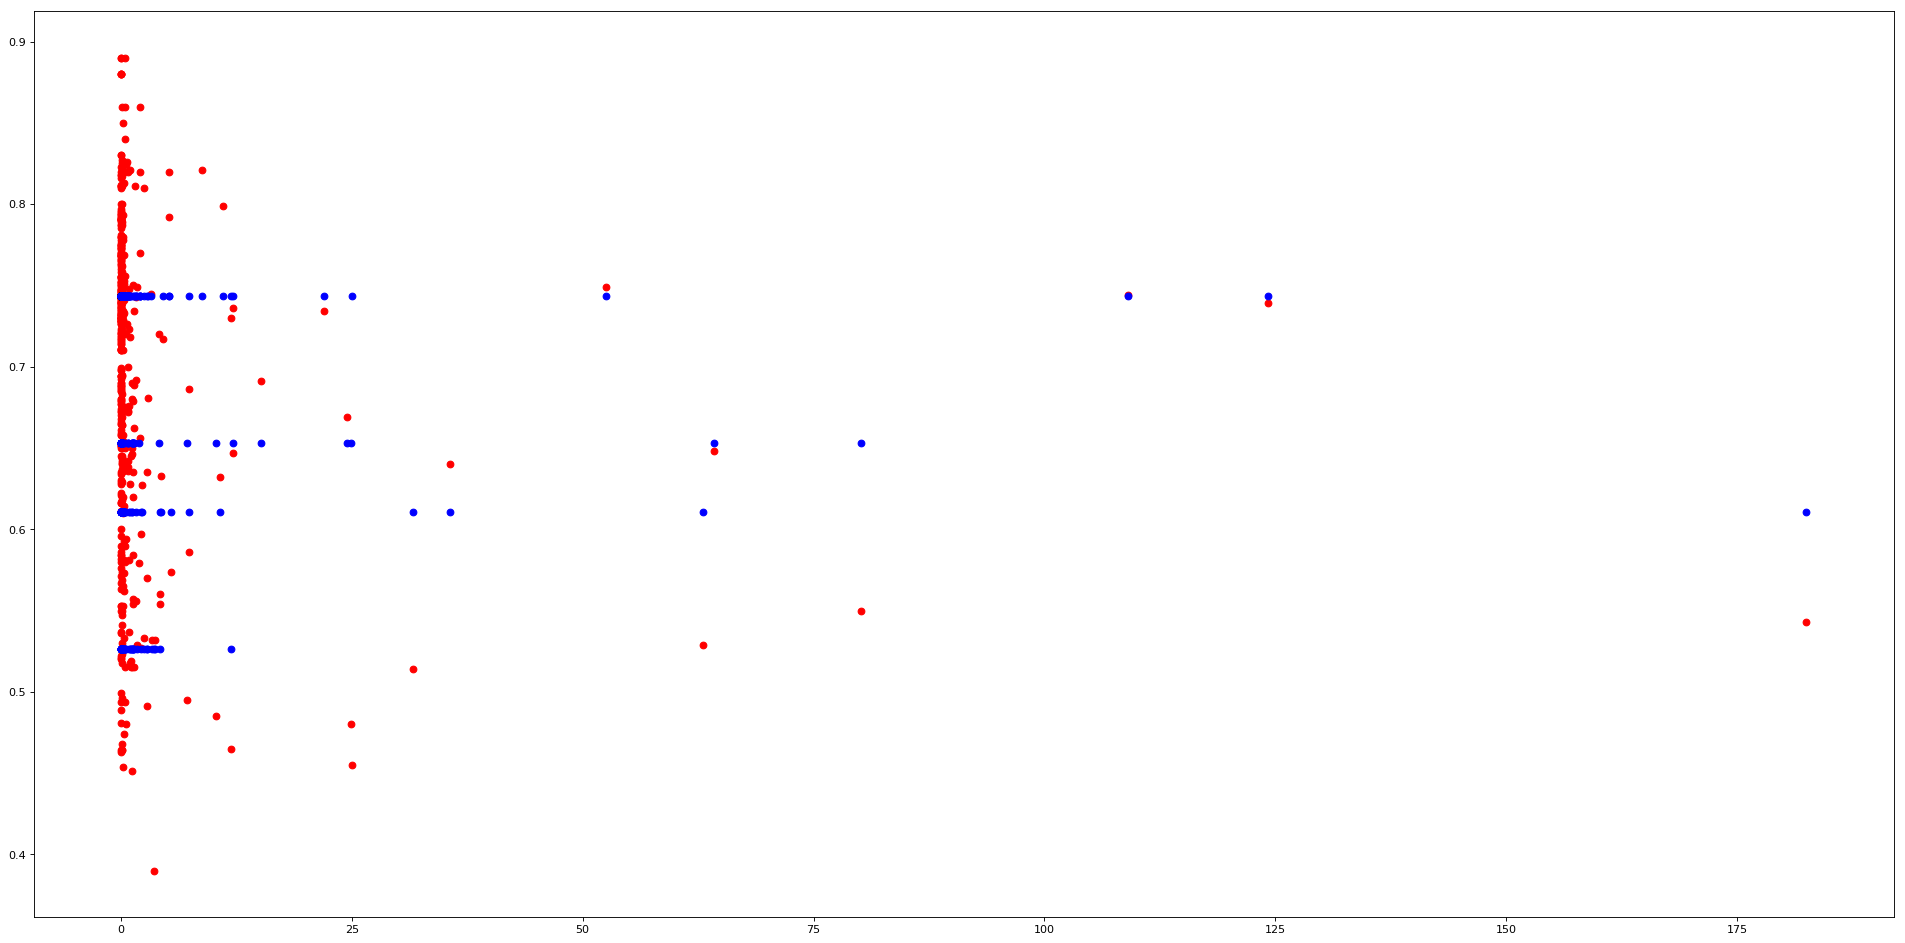

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 5}
Mean squared error: 0.001646416940761073
Score (Variance): 0.8293347919760709
--------------------------------------------------------------------------------------------------------



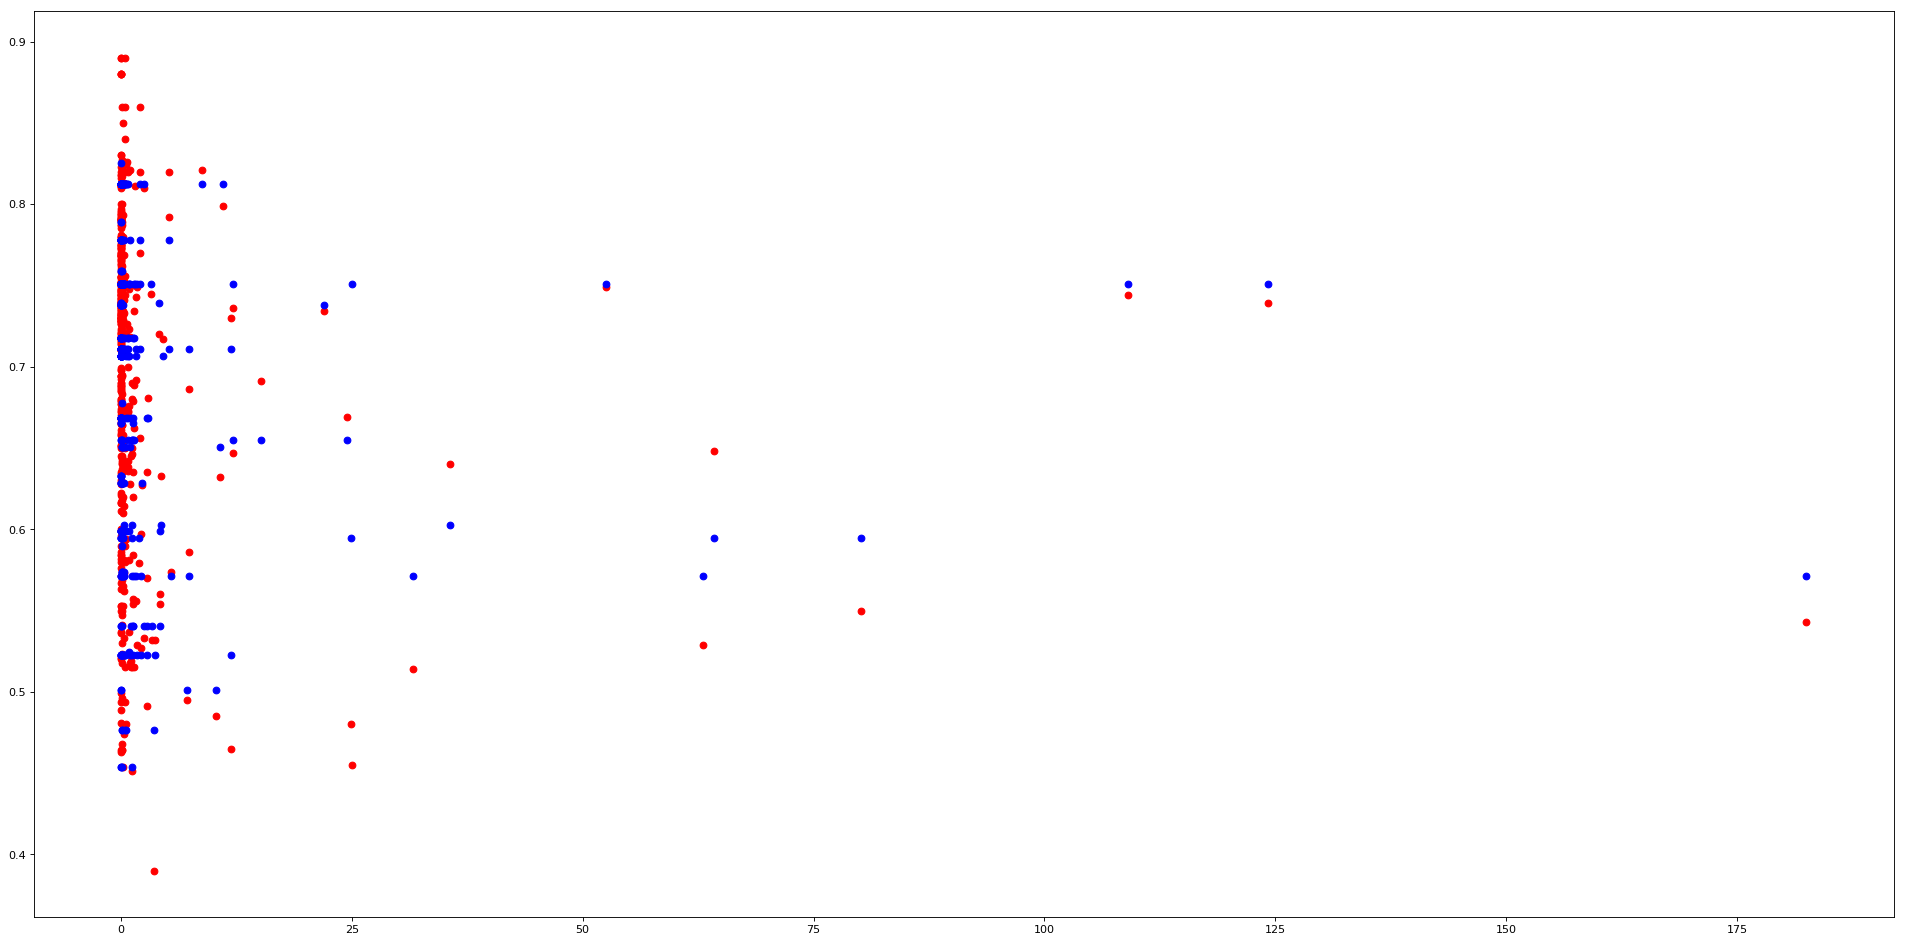

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 7}
Mean squared error: 0.001029390689647937
Score (Variance): 0.893294844193324
--------------------------------------------------------------------------------------------------------



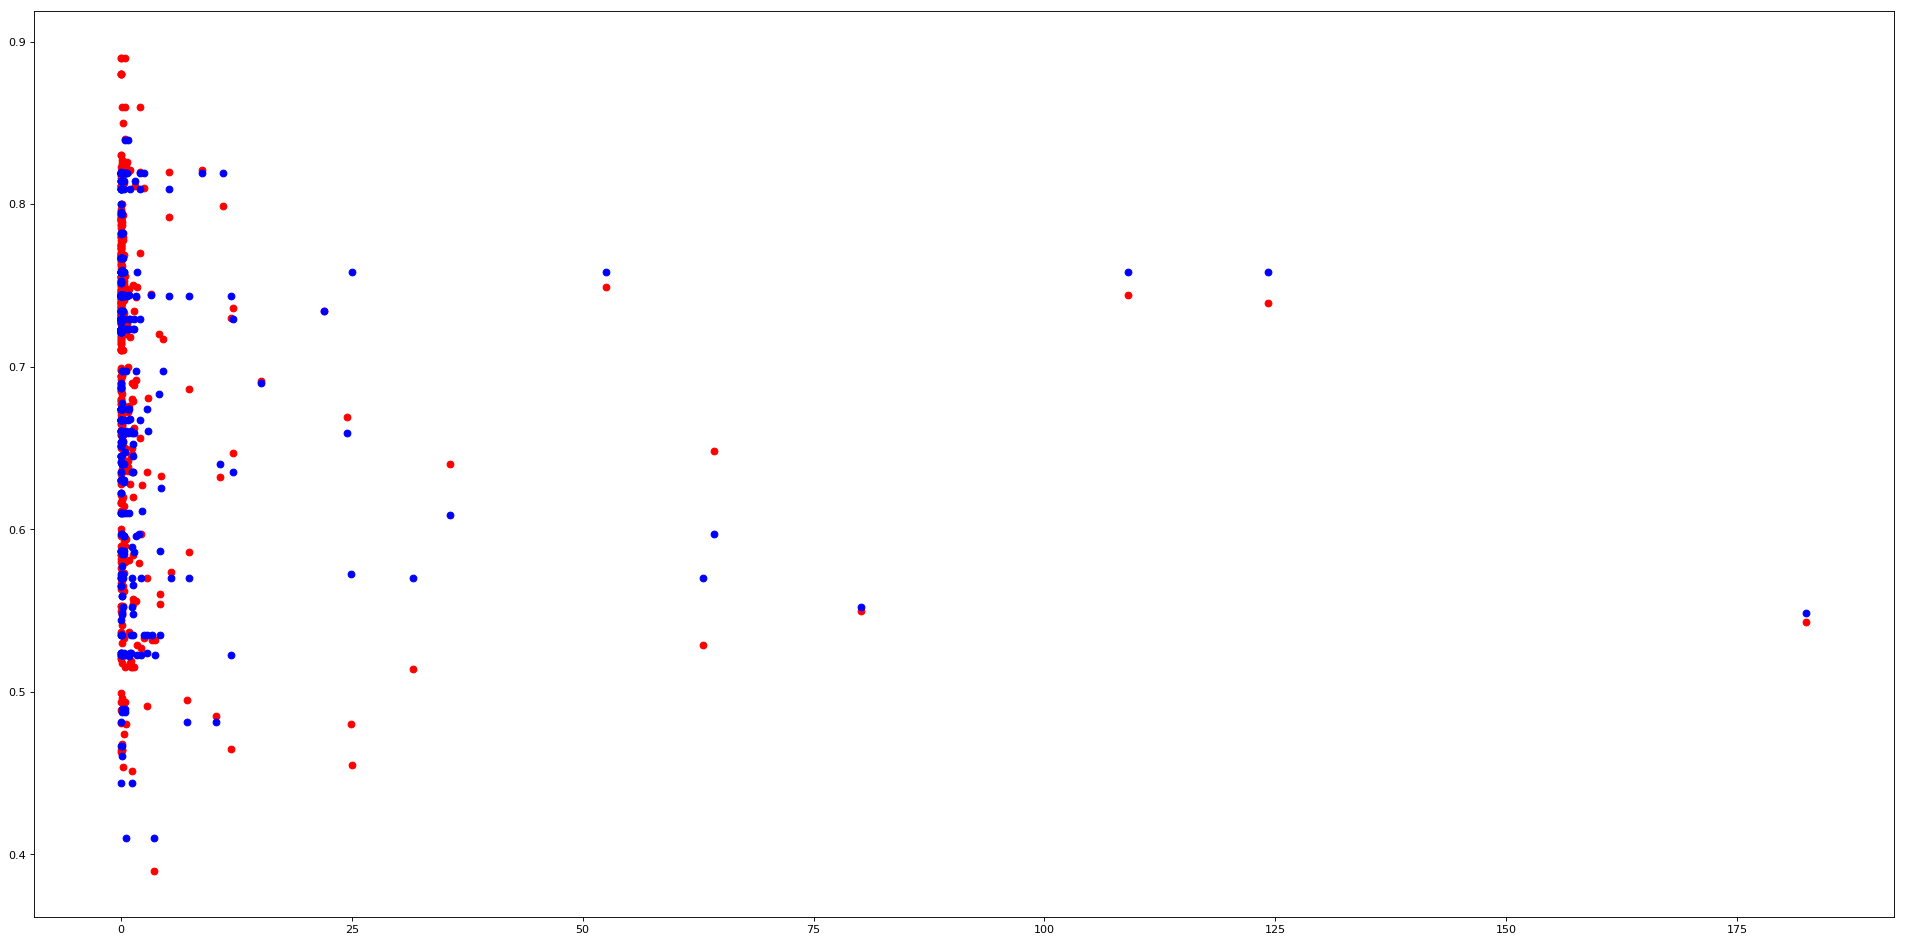

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 10}
Mean squared error: 0.0010081300342373693
Score (Variance): 0.8954986931021505
--------------------------------------------------------------------------------------------------------



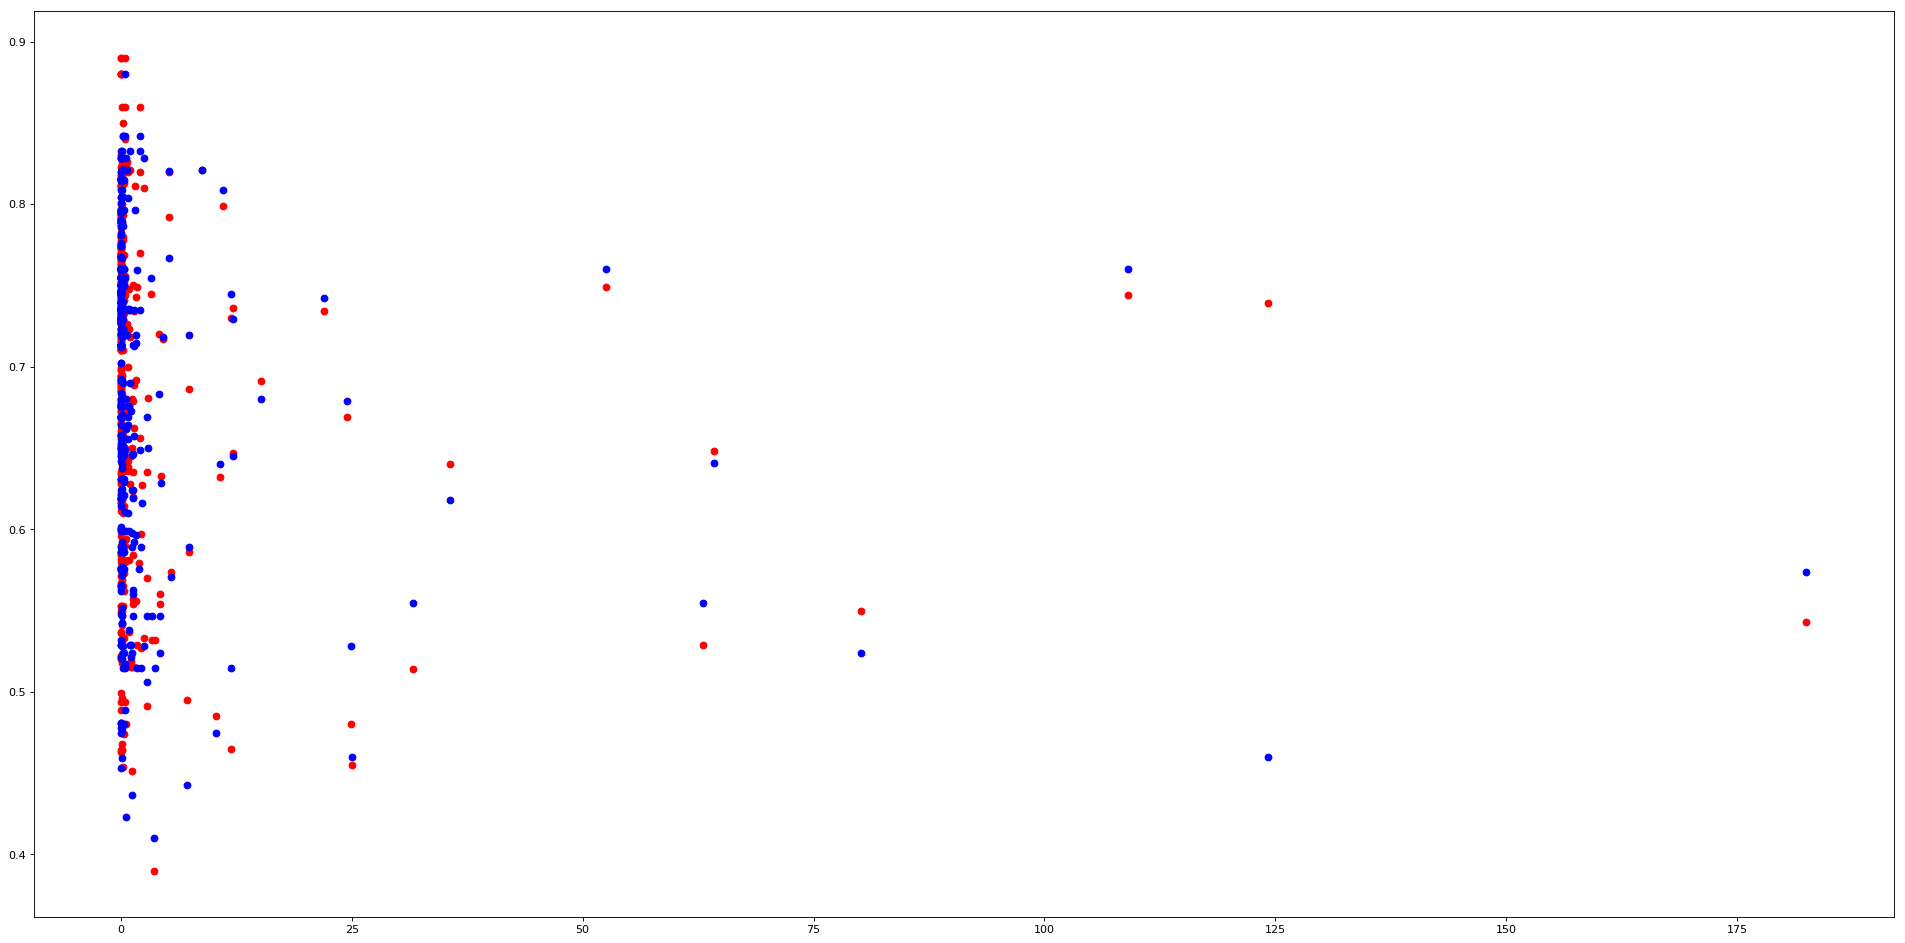

DecisionTreeRegressor {'criterion': 'mae'}
Mean squared error: 0.0017013334959677512
Score (Variance): 0.8236422209837115
--------------------------------------------------------------------------------------------------------



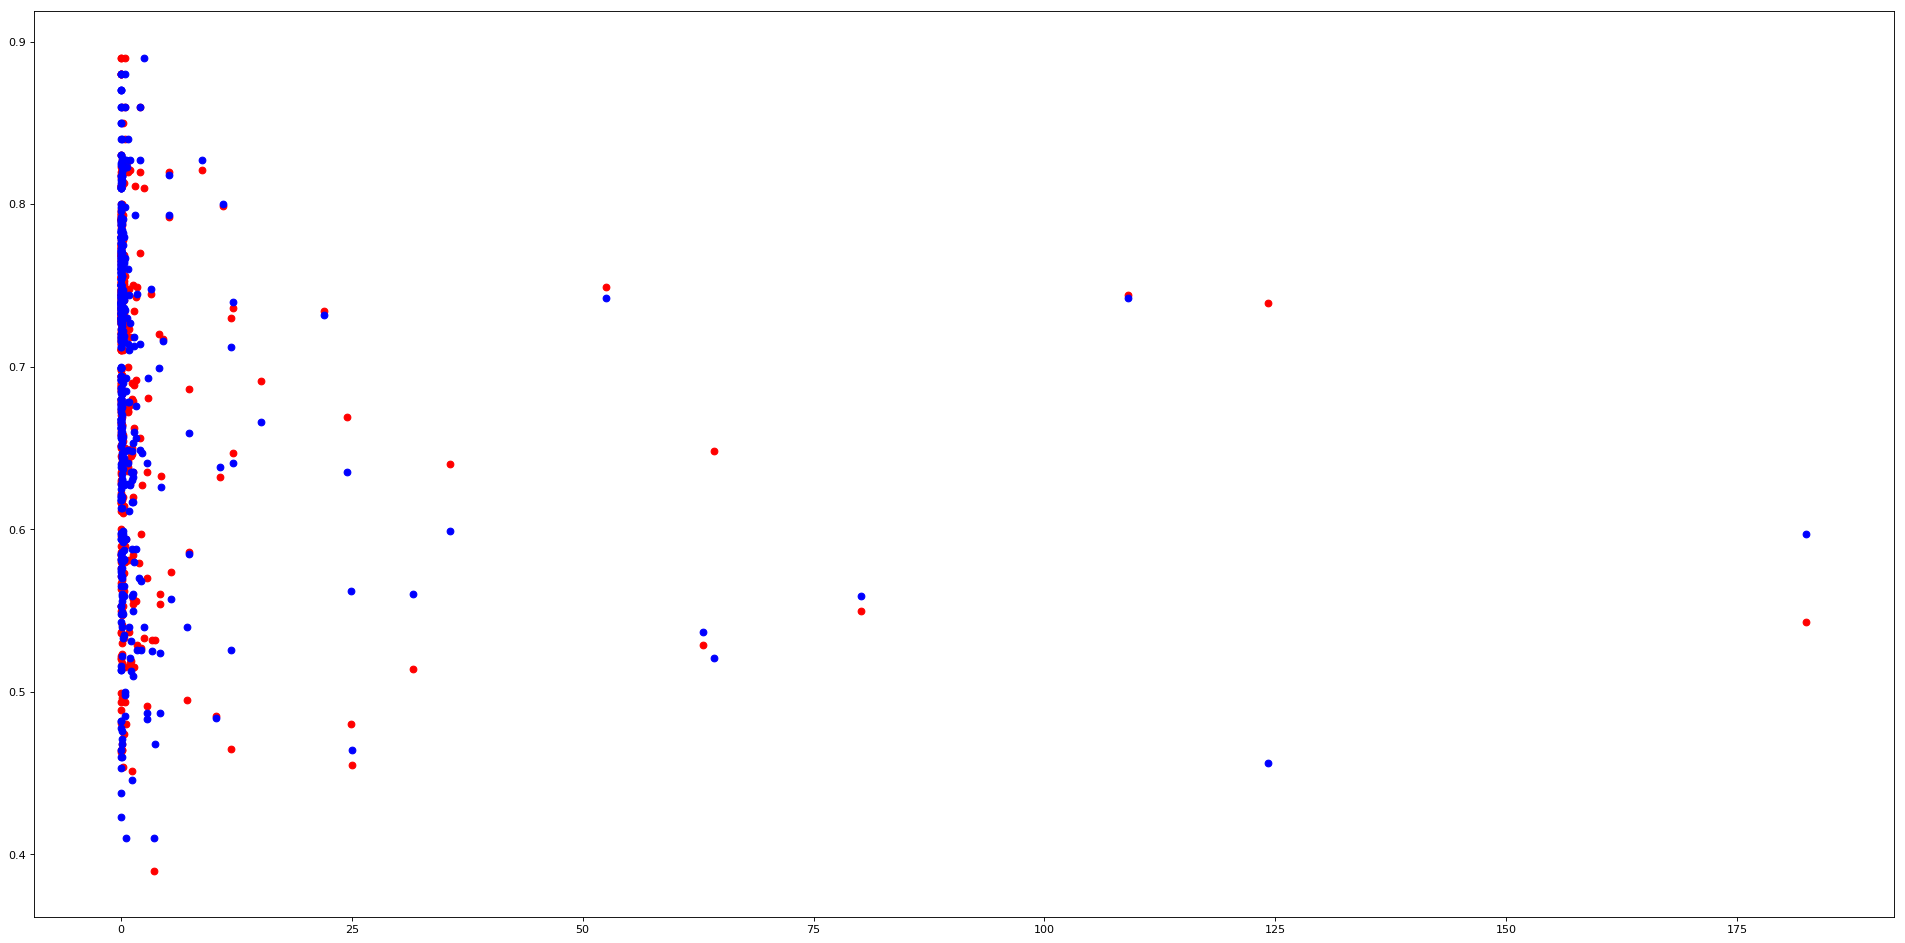

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 2}
Mean squared error: 0.0035417791609368347
Score (Variance): 0.6328642749529259
--------------------------------------------------------------------------------------------------------



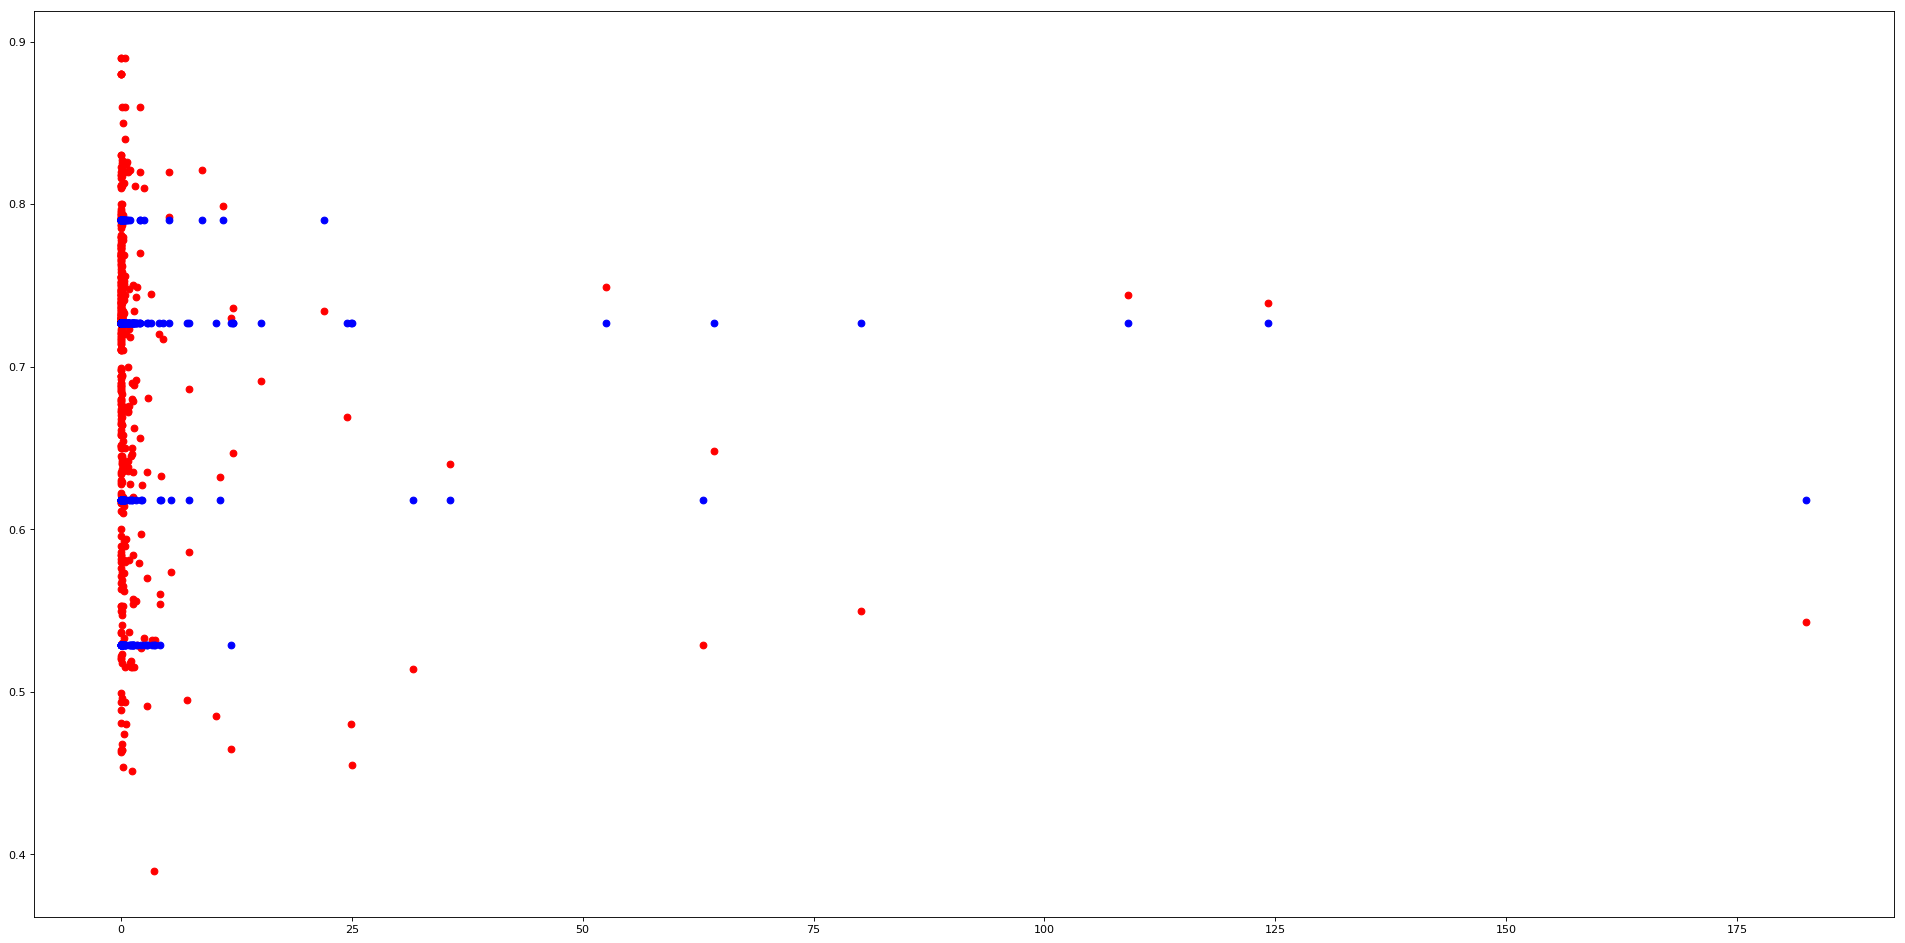

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 5}
Mean squared error: 0.0020555755362264773
Score (Variance): 0.7869220014604419
--------------------------------------------------------------------------------------------------------



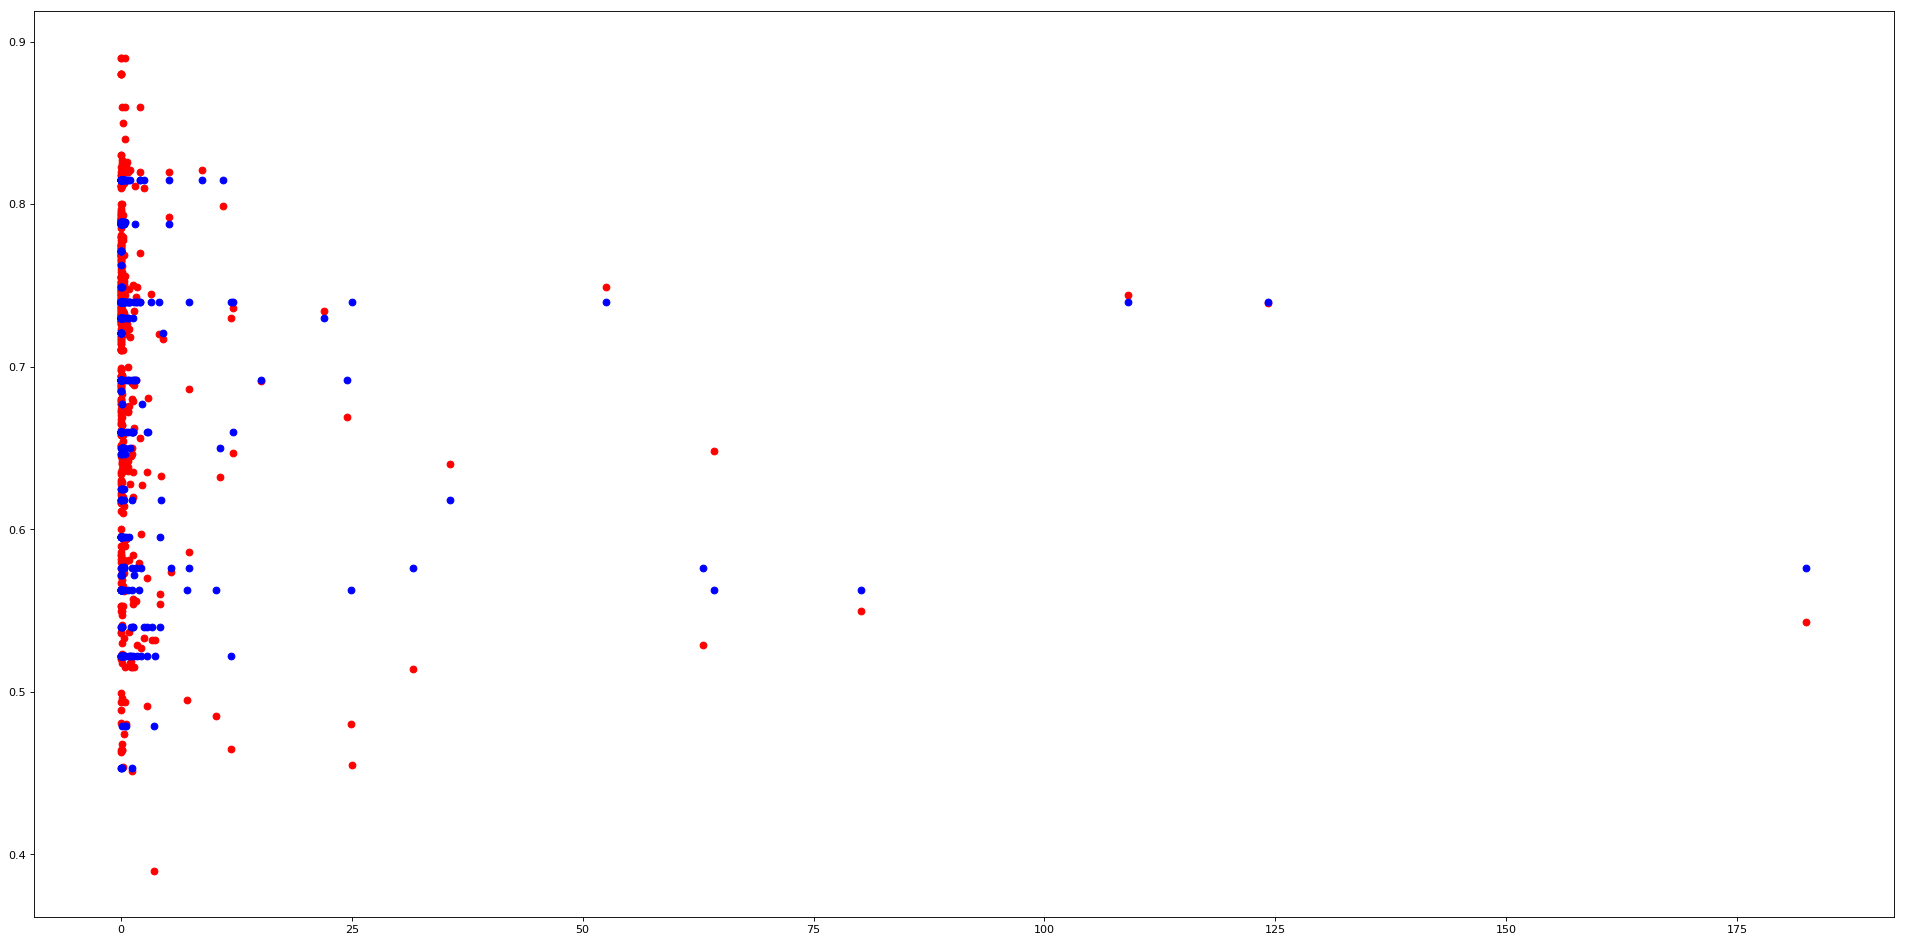

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 7}
Mean squared error: 0.0017221383173583193
Score (Variance): 0.8214856231726609
--------------------------------------------------------------------------------------------------------



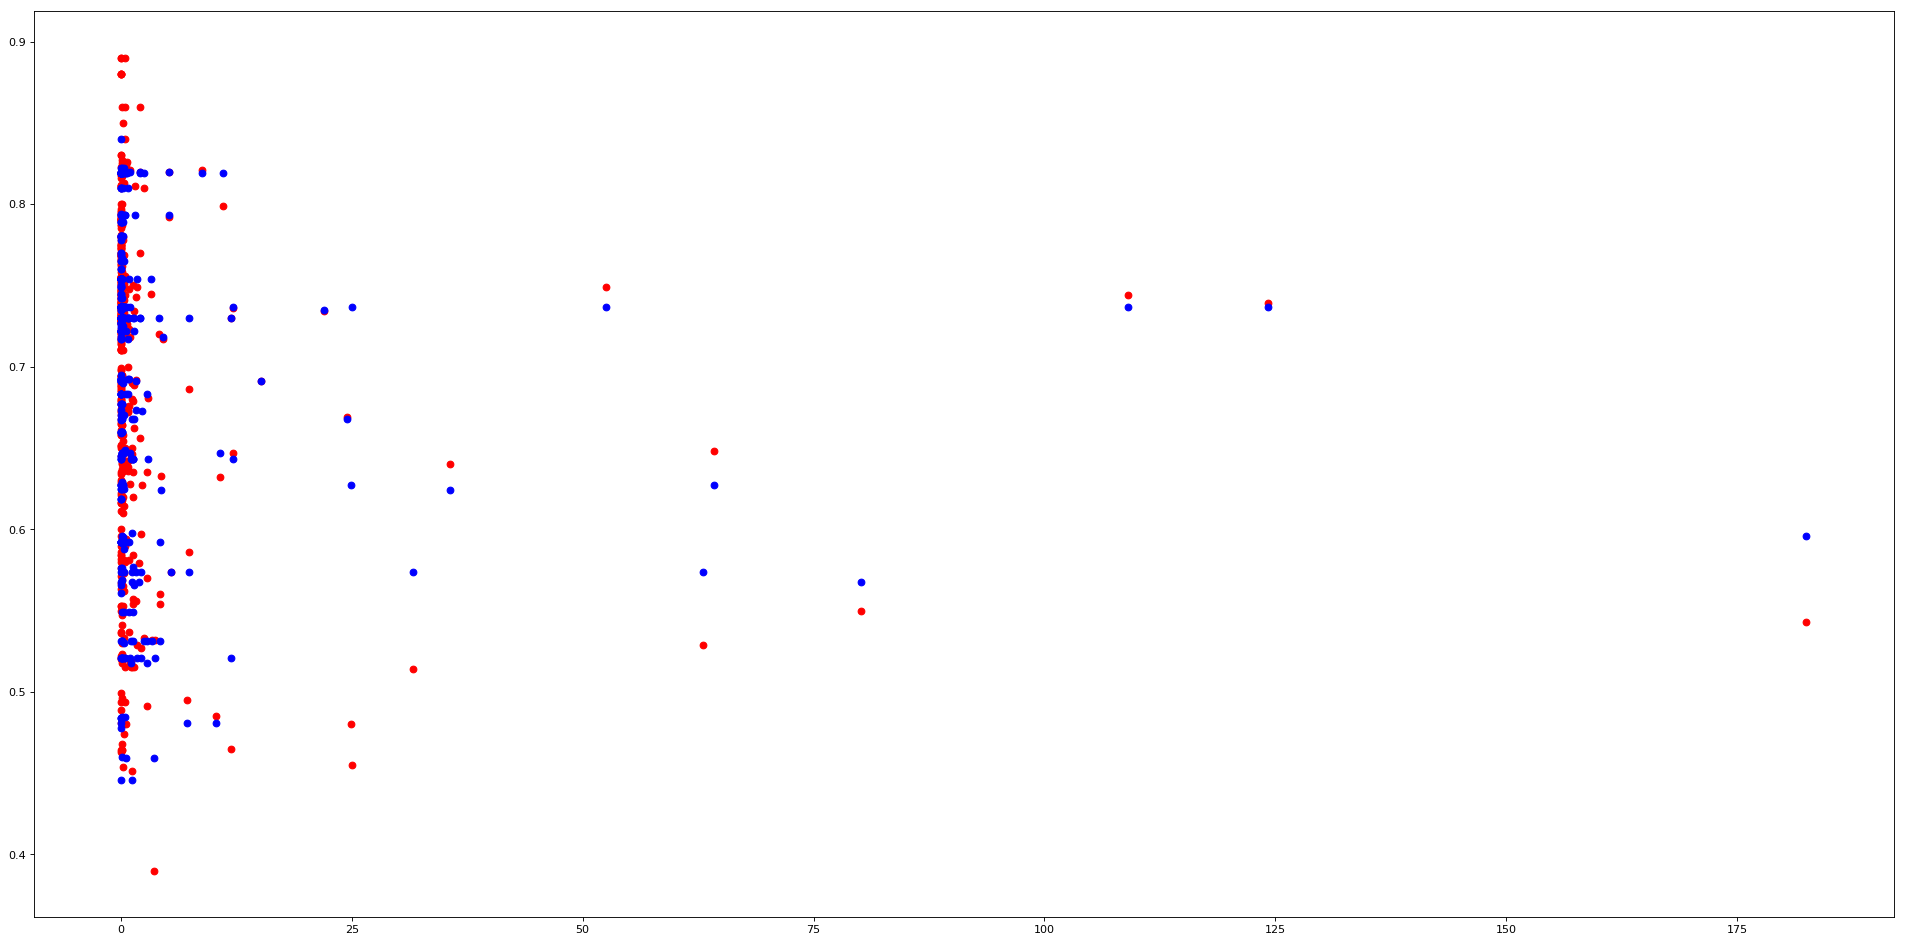

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 10}
Mean squared error: 0.001511753520630298
Score (Variance): 0.8432938080921275
--------------------------------------------------------------------------------------------------------



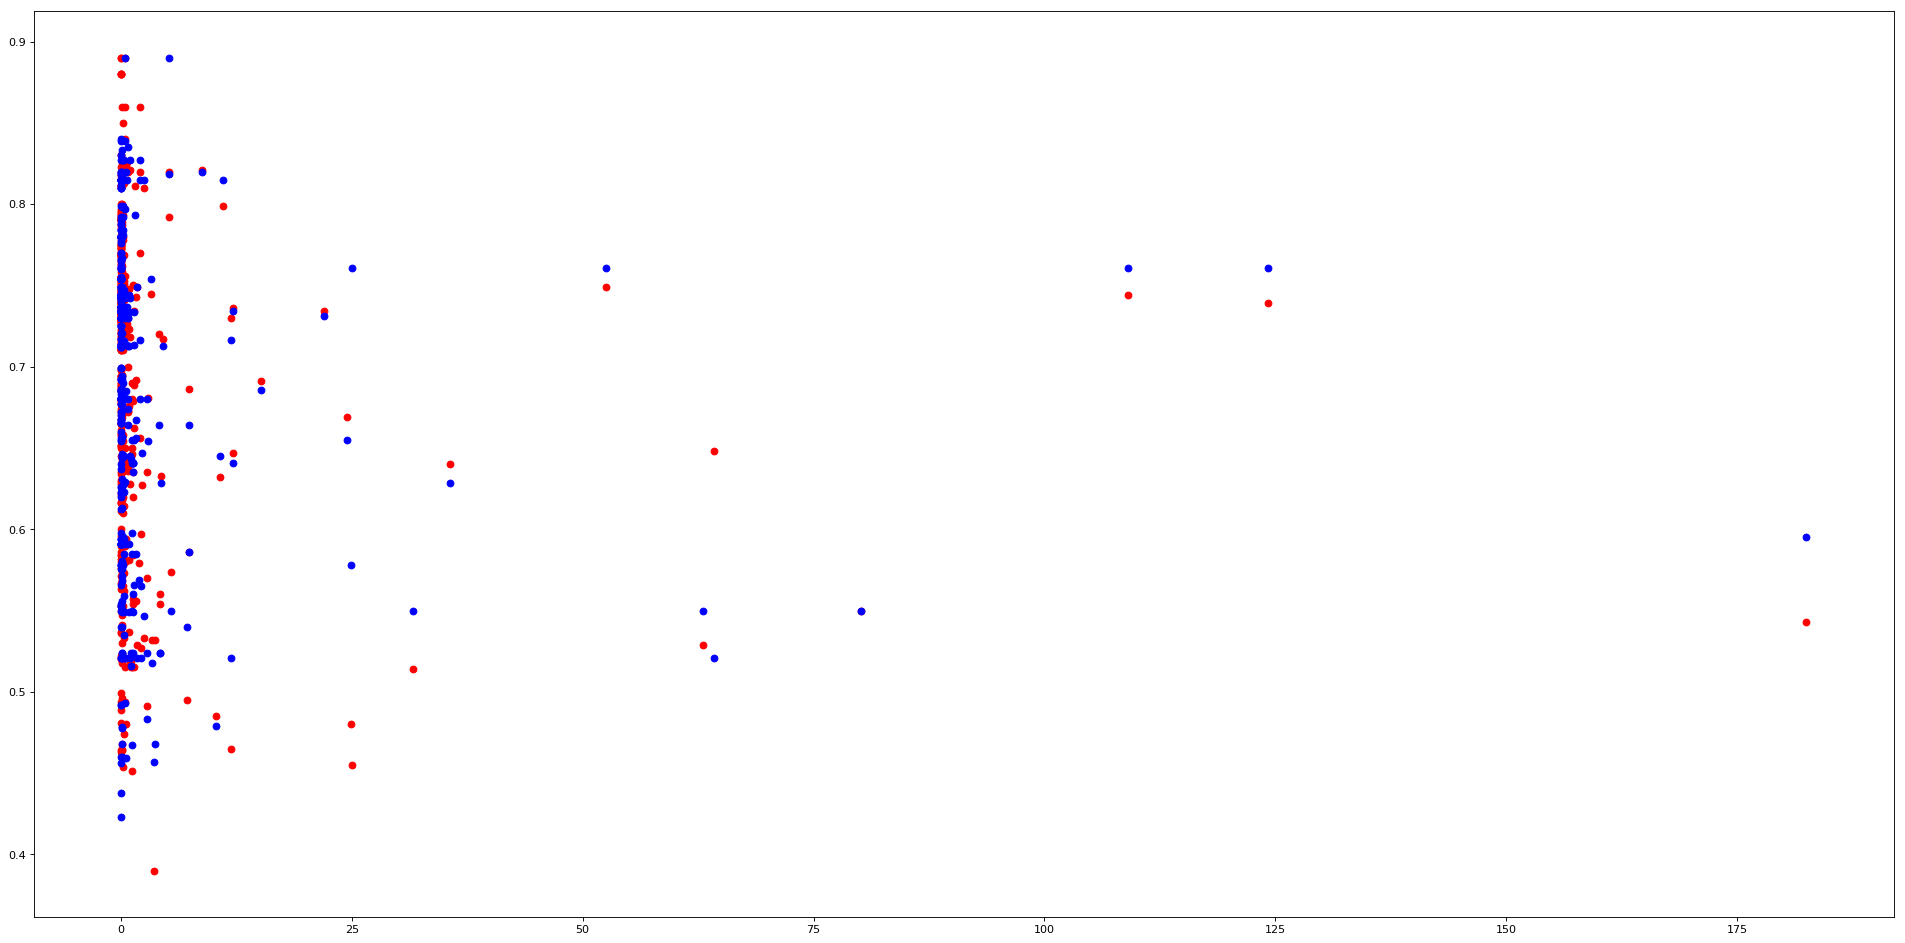

In [115]:
decision_tree_regressor_models = [
    (DecisionTreeRegressor, {}),
    (DecisionTreeRegressor, {"max_depth" : 2}),
    (DecisionTreeRegressor, {"max_depth" : 5}),
    (DecisionTreeRegressor, {"max_depth" : 7}),
    (DecisionTreeRegressor, {"max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse"}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "mae"}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 10}),
]


for i, (Model, kwargs) in enumerate(decision_tree_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Score (Variance):", model.score(X_test, y_test))
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_expected_and_trained_data(X_test, y_test, y_predicted)

# Decision Trees - Regression - Polynomial Features

DecisionTreeRegressor {}
Mean squared error: 0.01969601825985721
Score (Variance): -1.041660876015881
--------------------------------------------------------------------------------------------------------



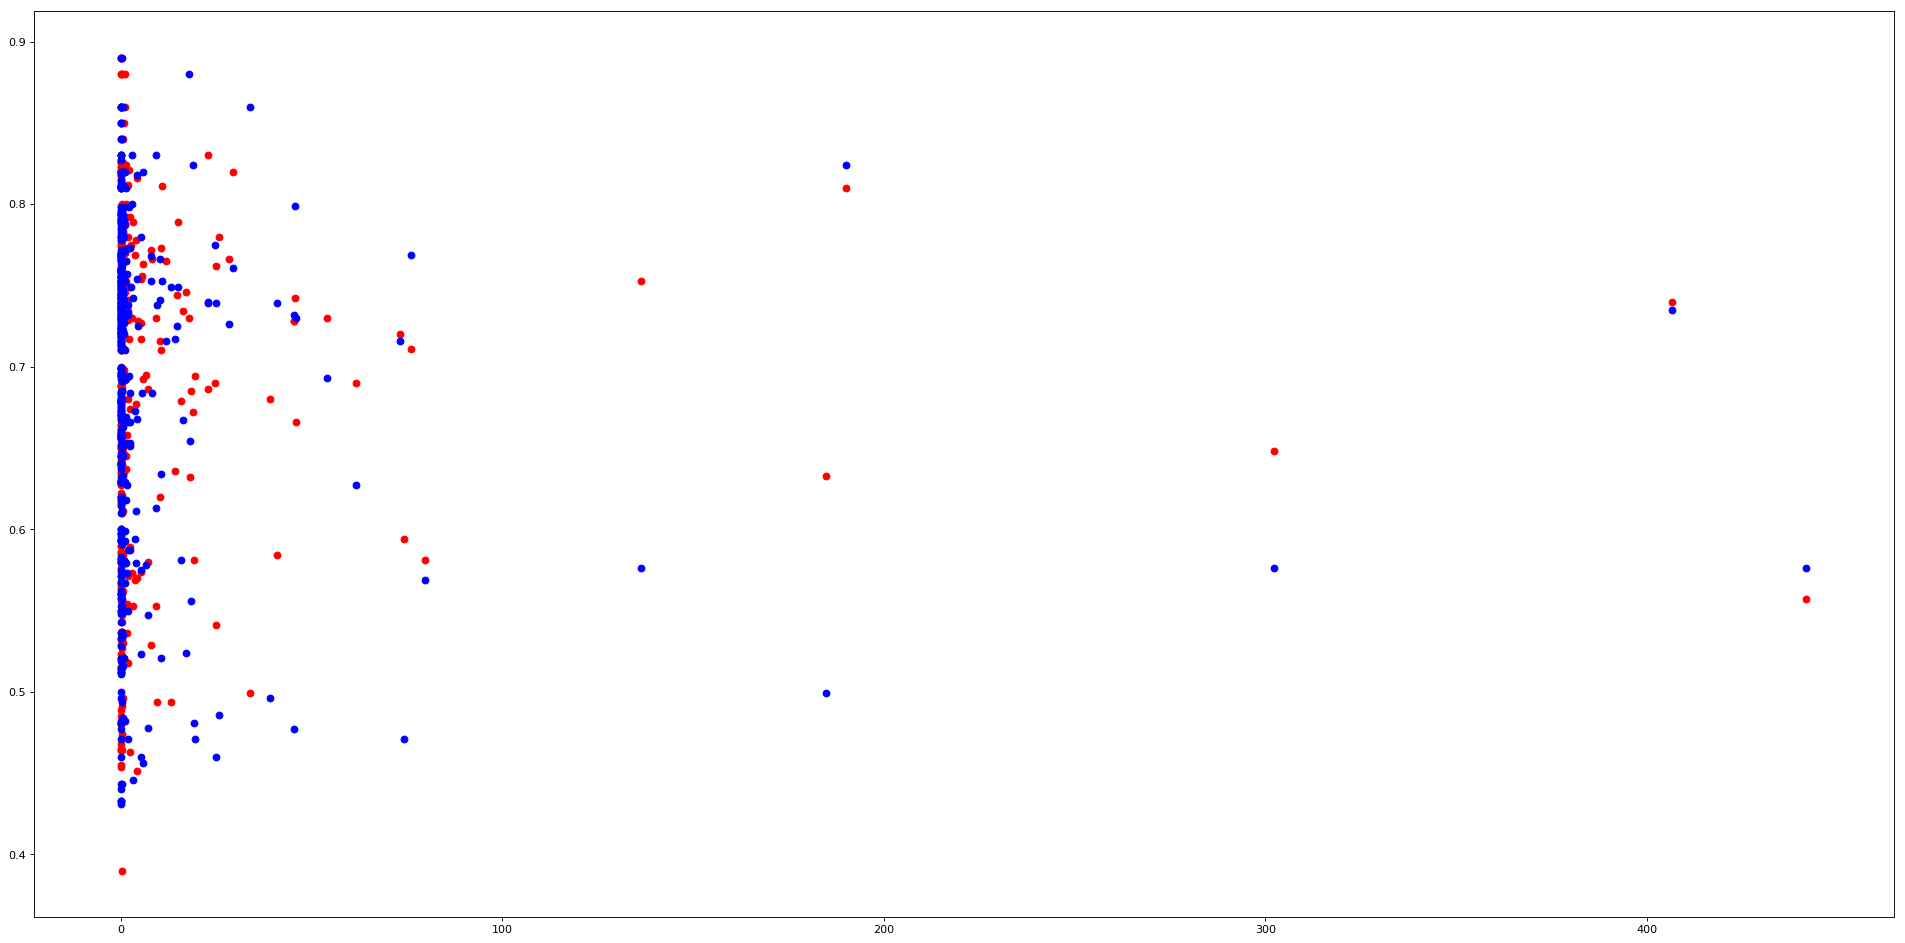

DecisionTreeRegressor {'max_depth': 2}
Mean squared error: 0.009742474410619158
Score (Variance): -0.009890861052197941
--------------------------------------------------------------------------------------------------------



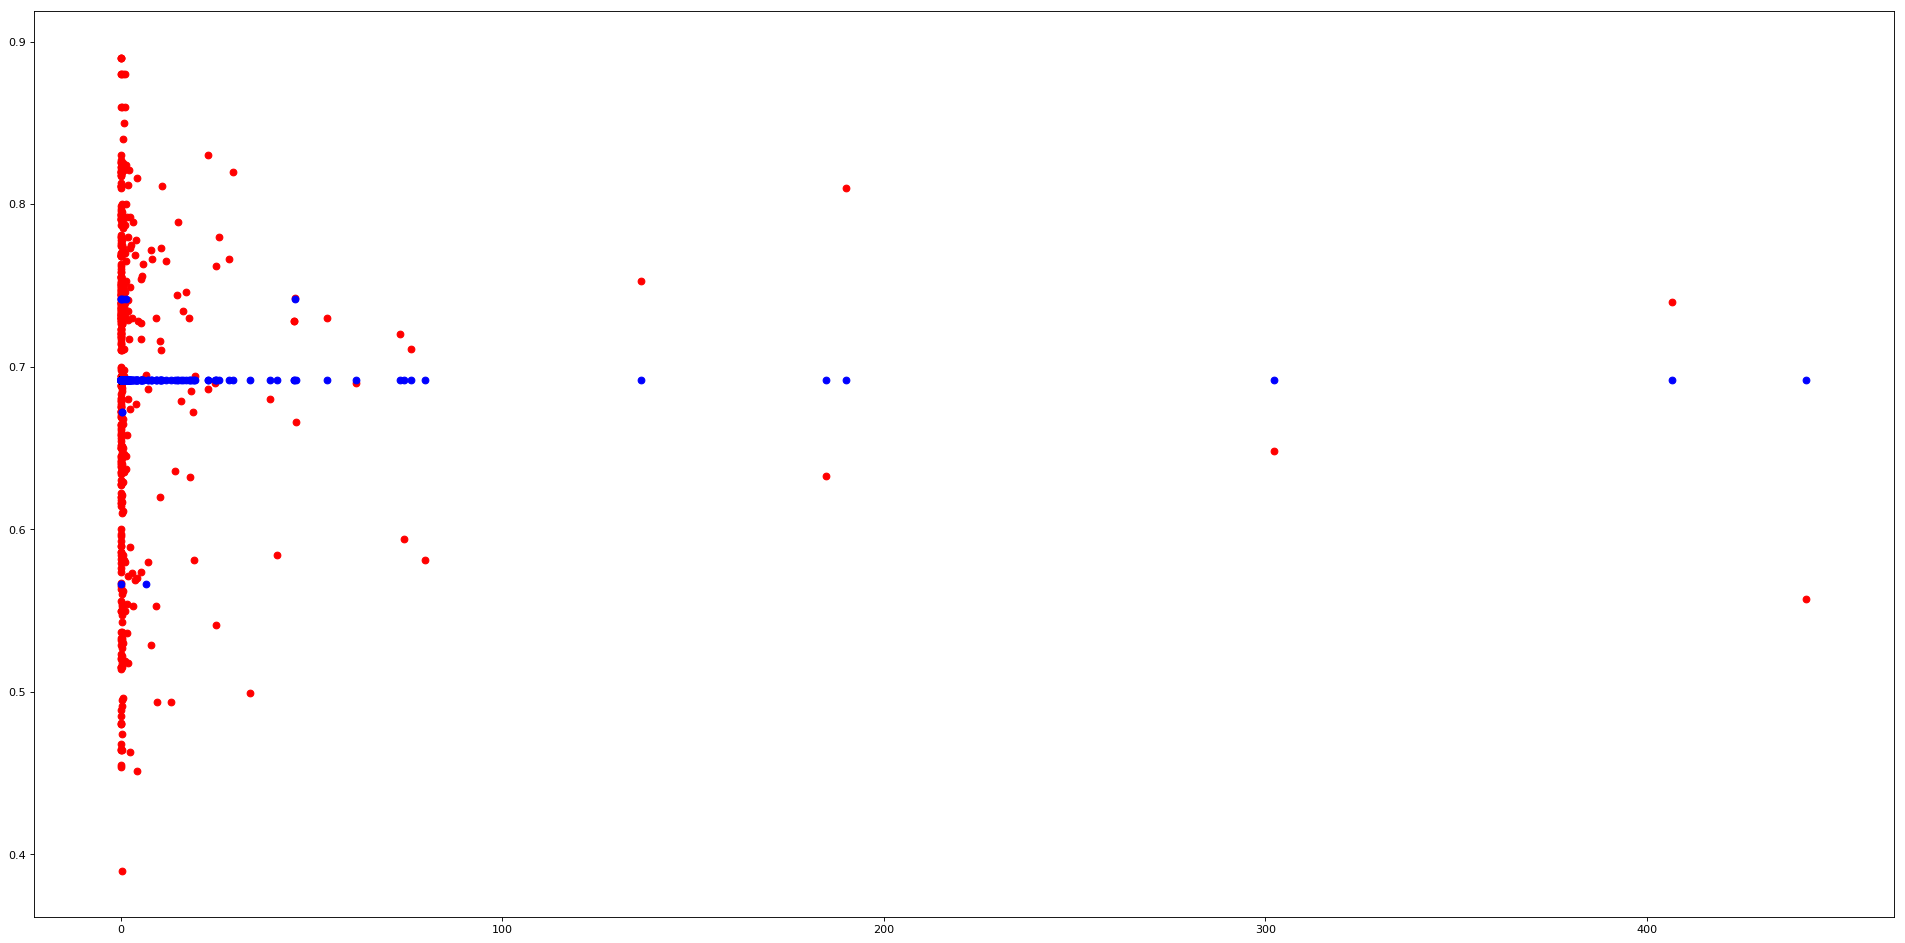

DecisionTreeRegressor {'max_depth': 5}
Mean squared error: 0.009974129873917732
Score (Variance): -0.03390393262291136
--------------------------------------------------------------------------------------------------------



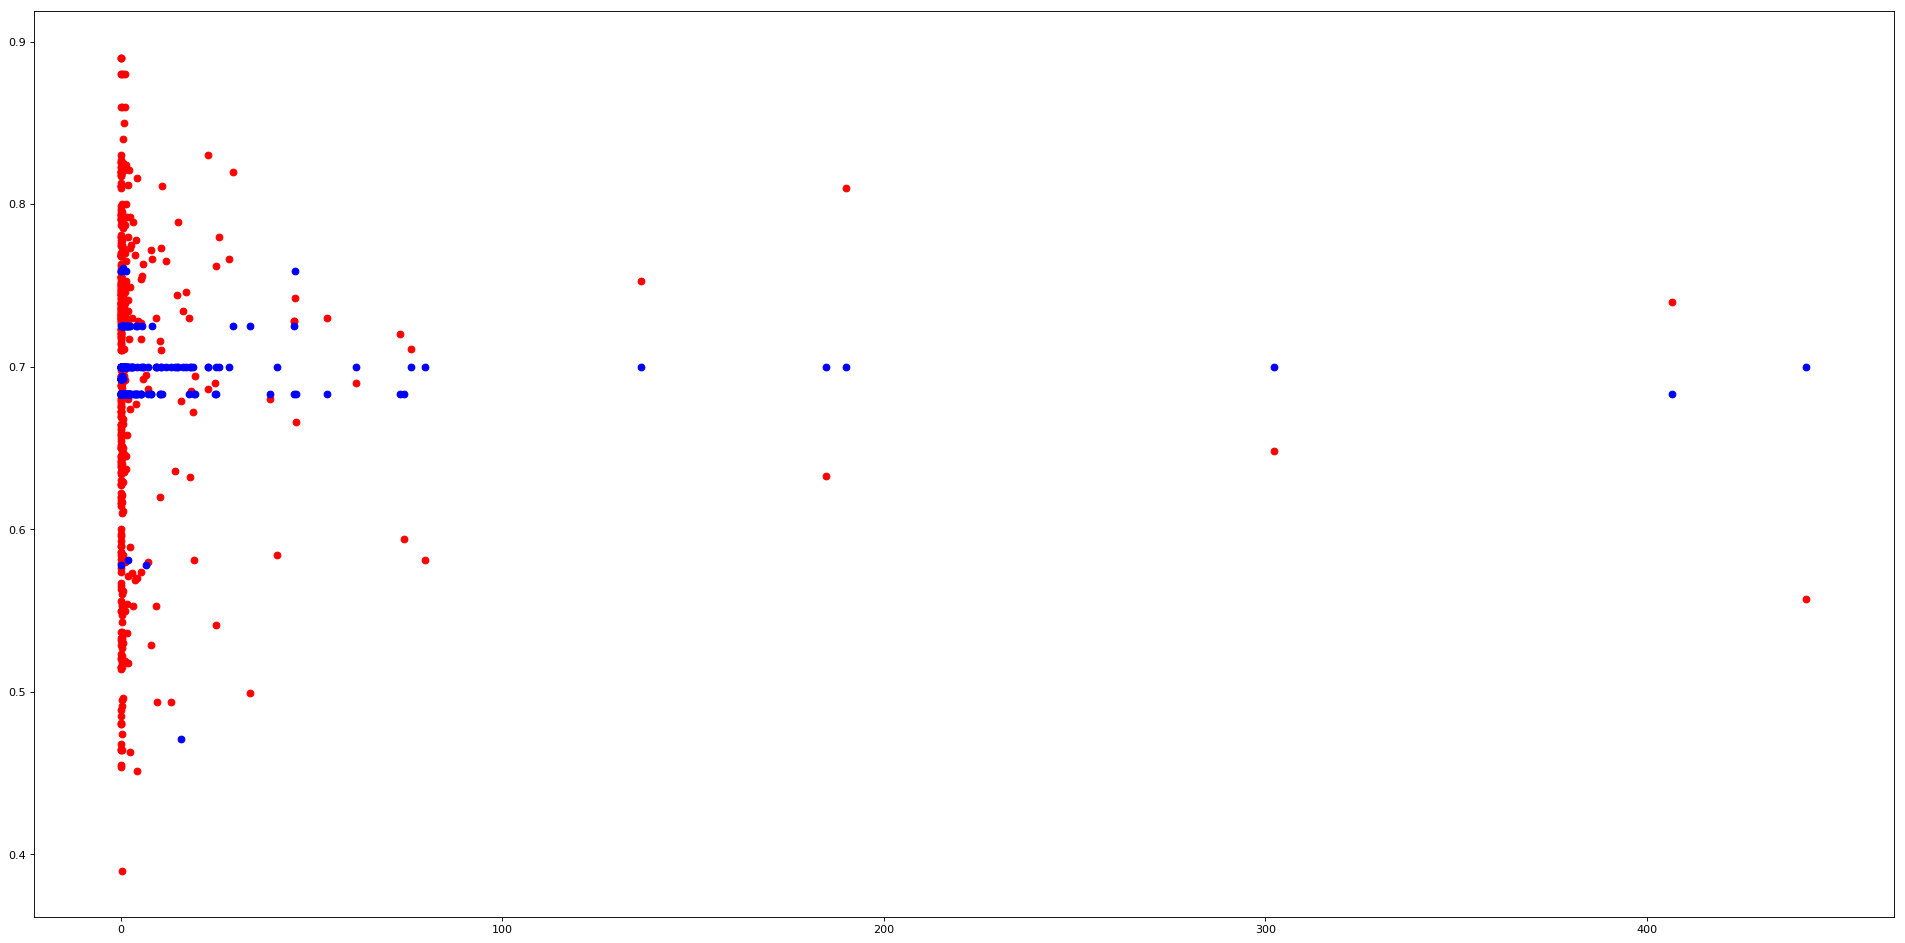

DecisionTreeRegressor {'max_depth': 7}
Mean squared error: 0.01049168226275552
Score (Variance): -0.08755266759247027
--------------------------------------------------------------------------------------------------------



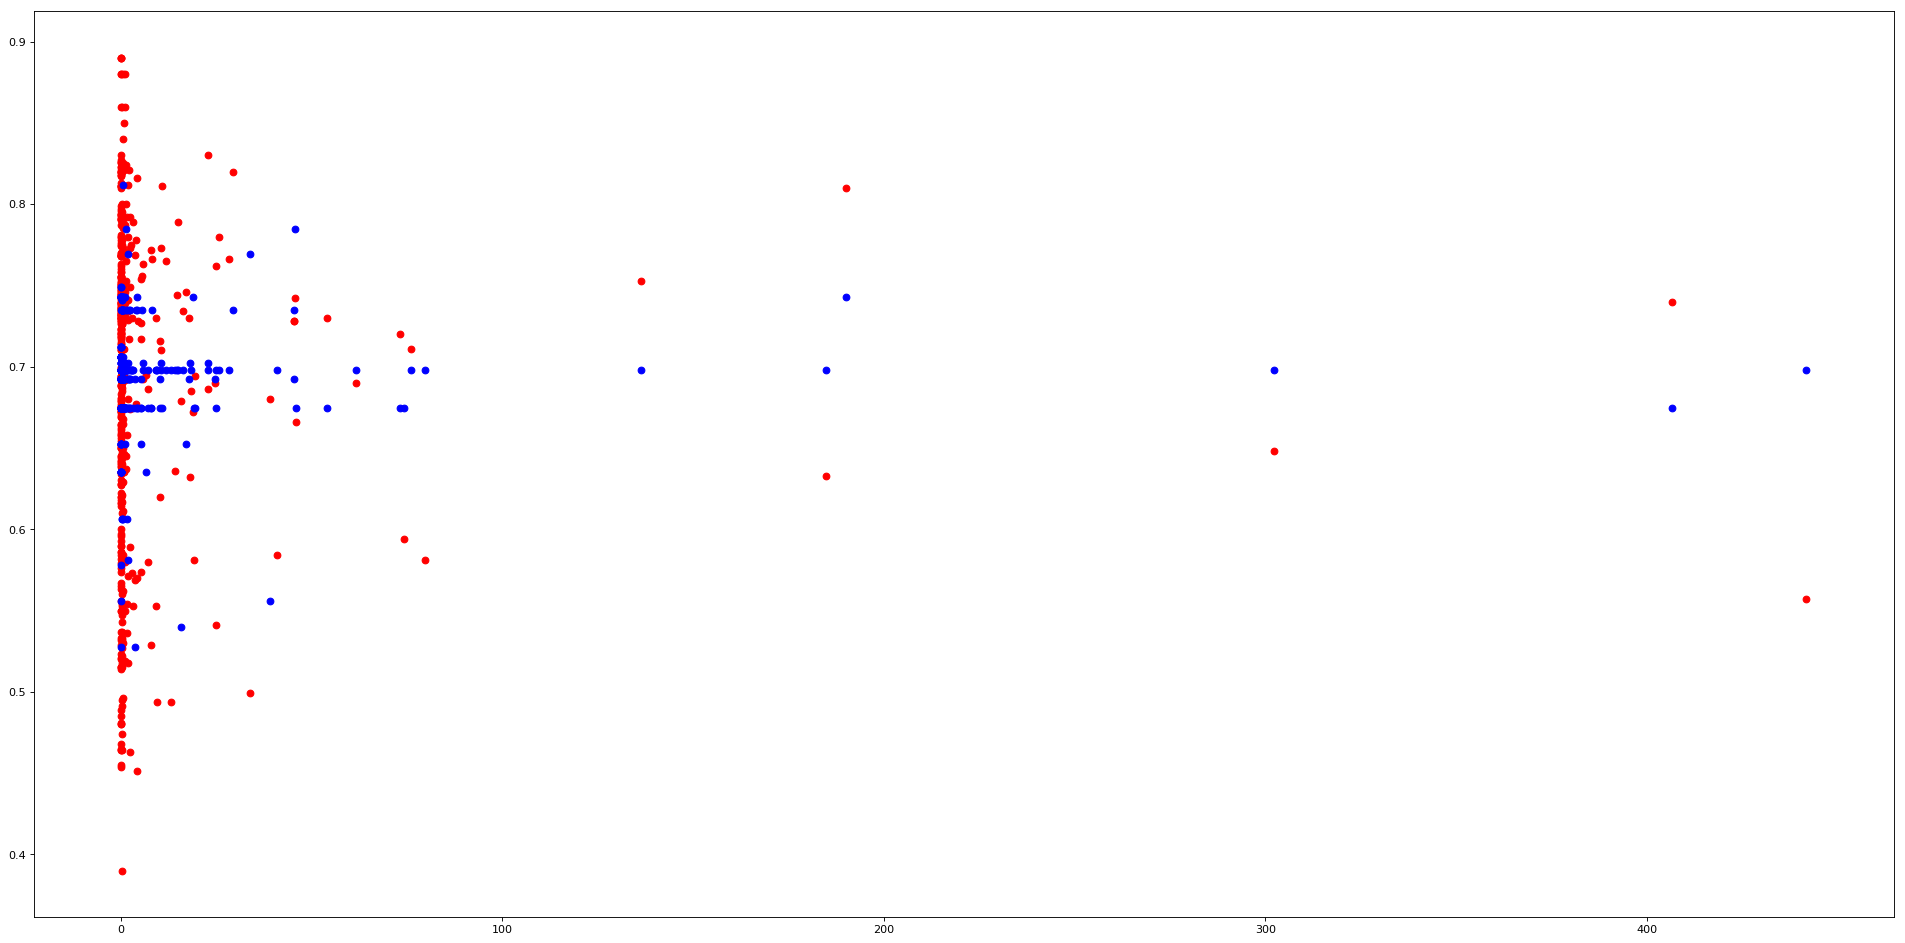

DecisionTreeRegressor {'max_depth': 10}
Mean squared error: 0.01228673589249927
Score (Variance): -0.27362534064982547
--------------------------------------------------------------------------------------------------------



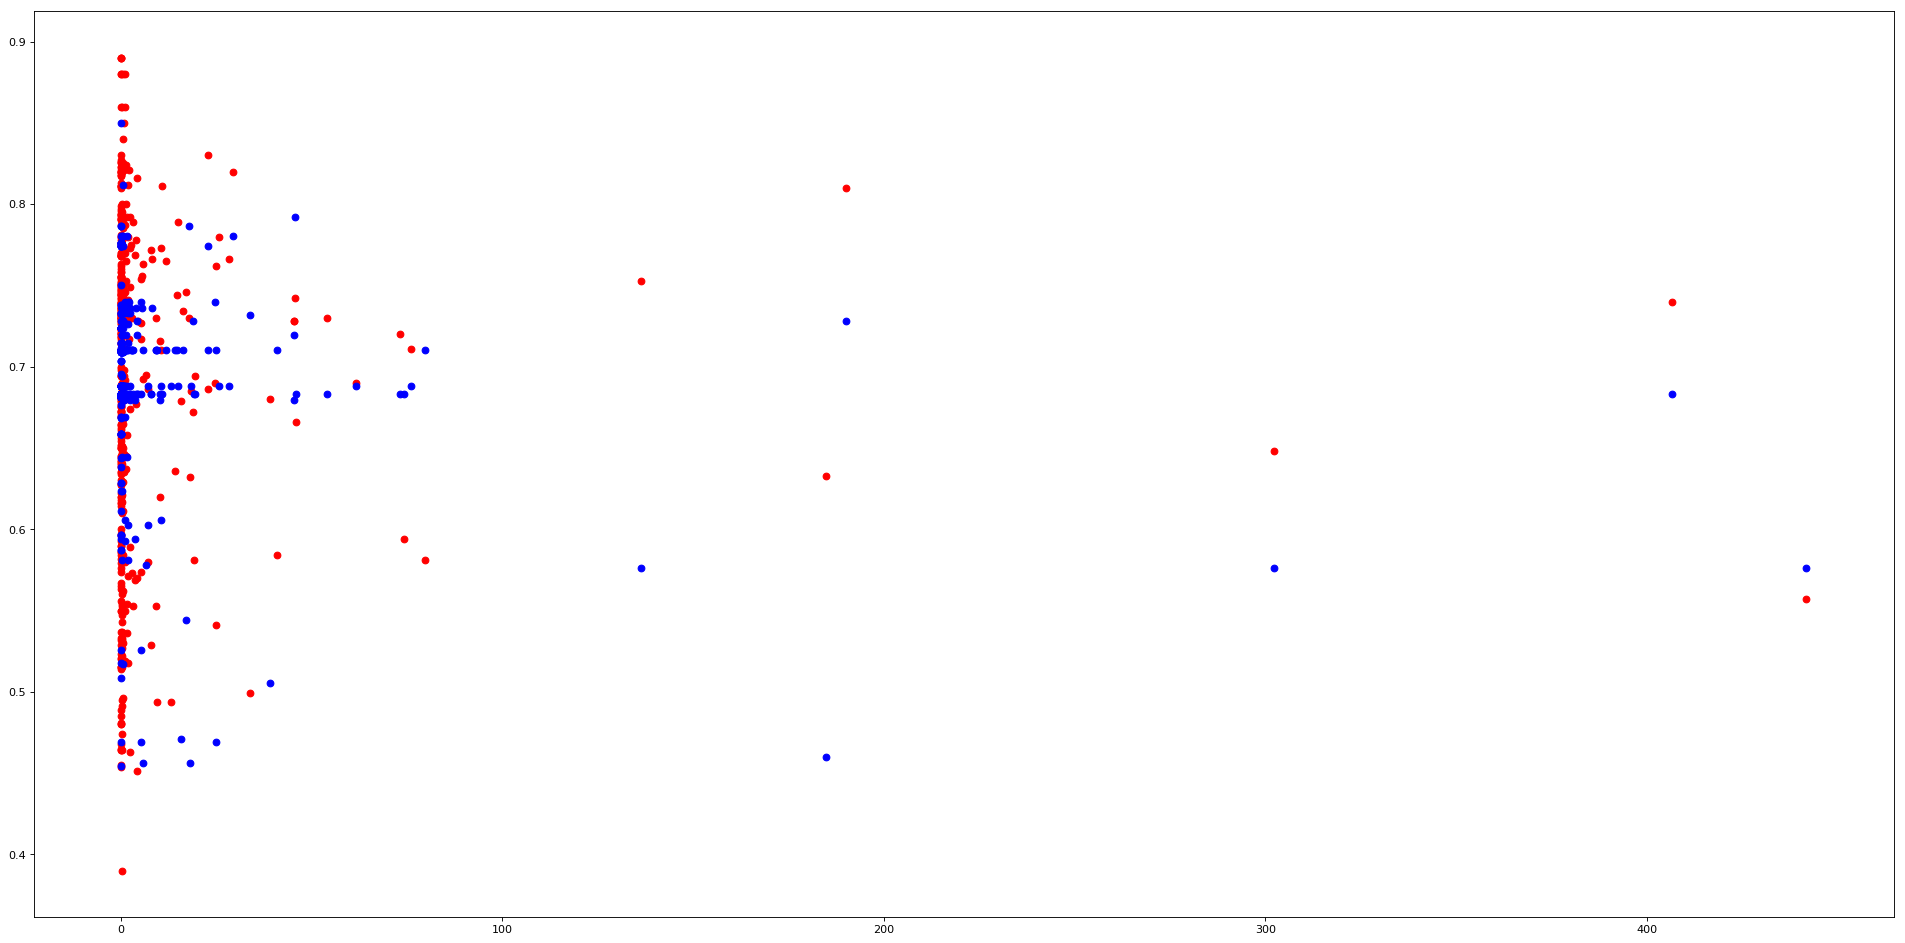

DecisionTreeRegressor {'criterion': 'friedman_mse'}
Mean squared error: 0.020159344790469453
Score (Variance): -1.0896886366470313
--------------------------------------------------------------------------------------------------------



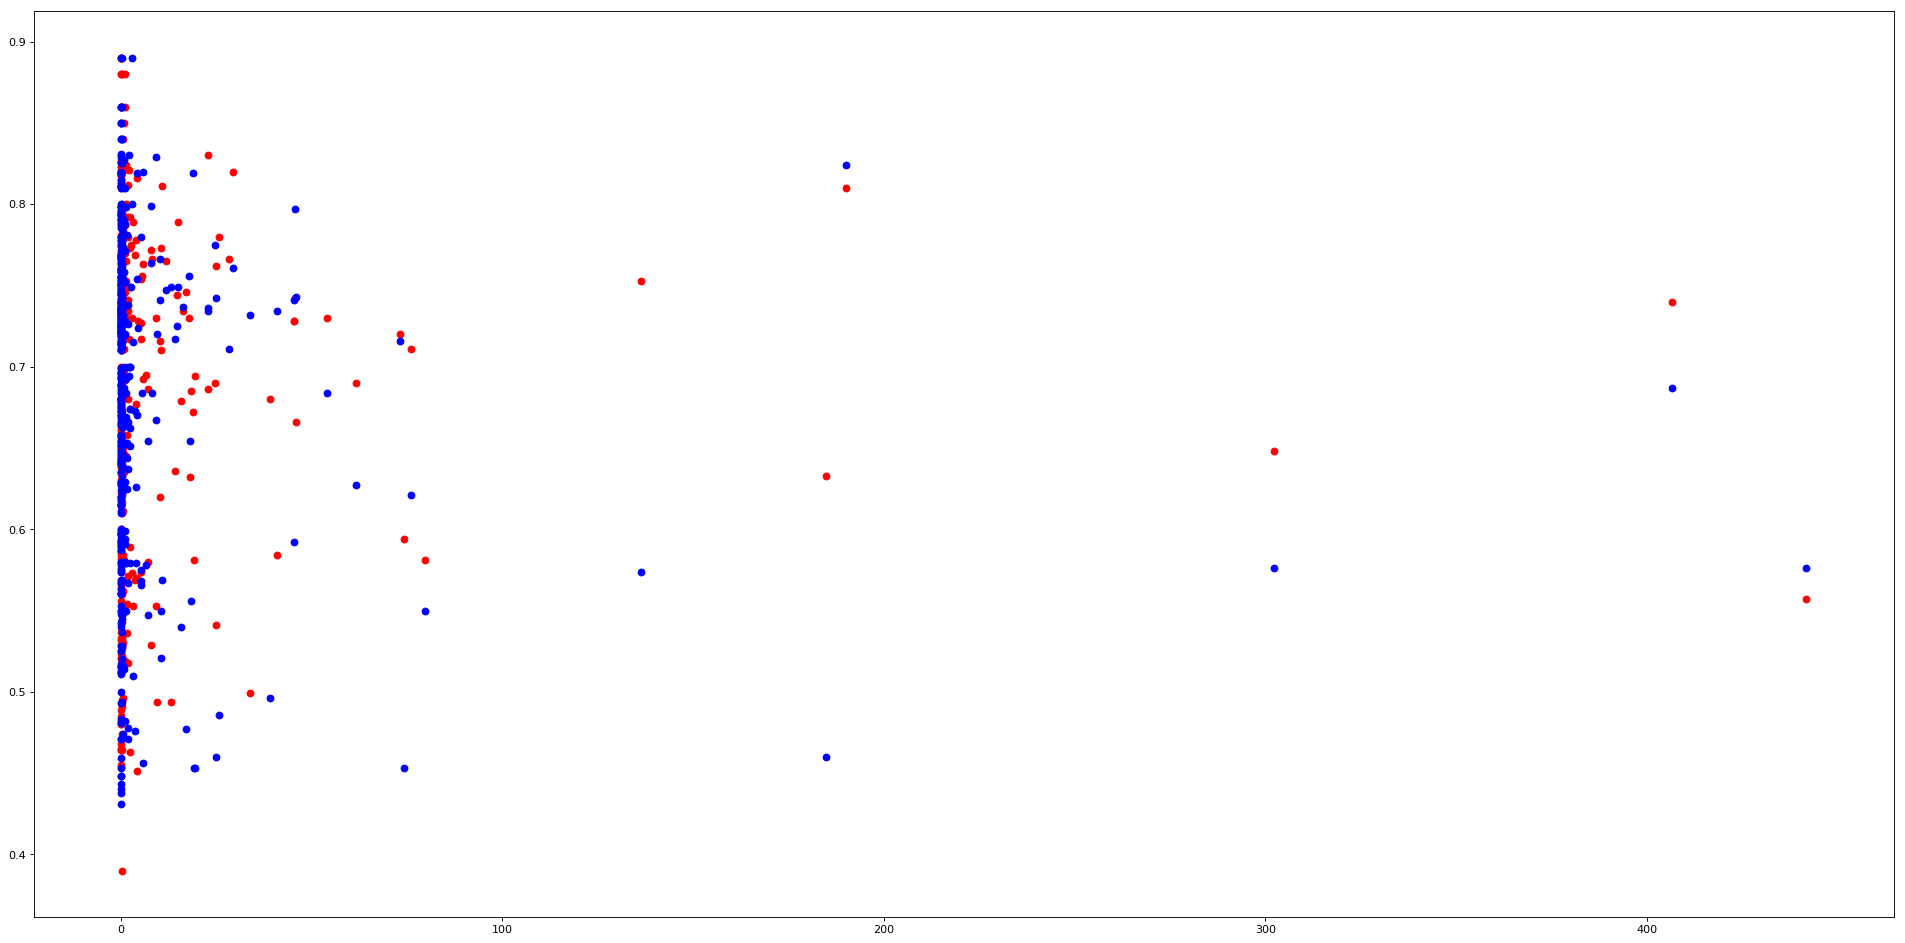

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 2}
Mean squared error: 0.009742474410619158
Score (Variance): -0.009890861052197941
--------------------------------------------------------------------------------------------------------



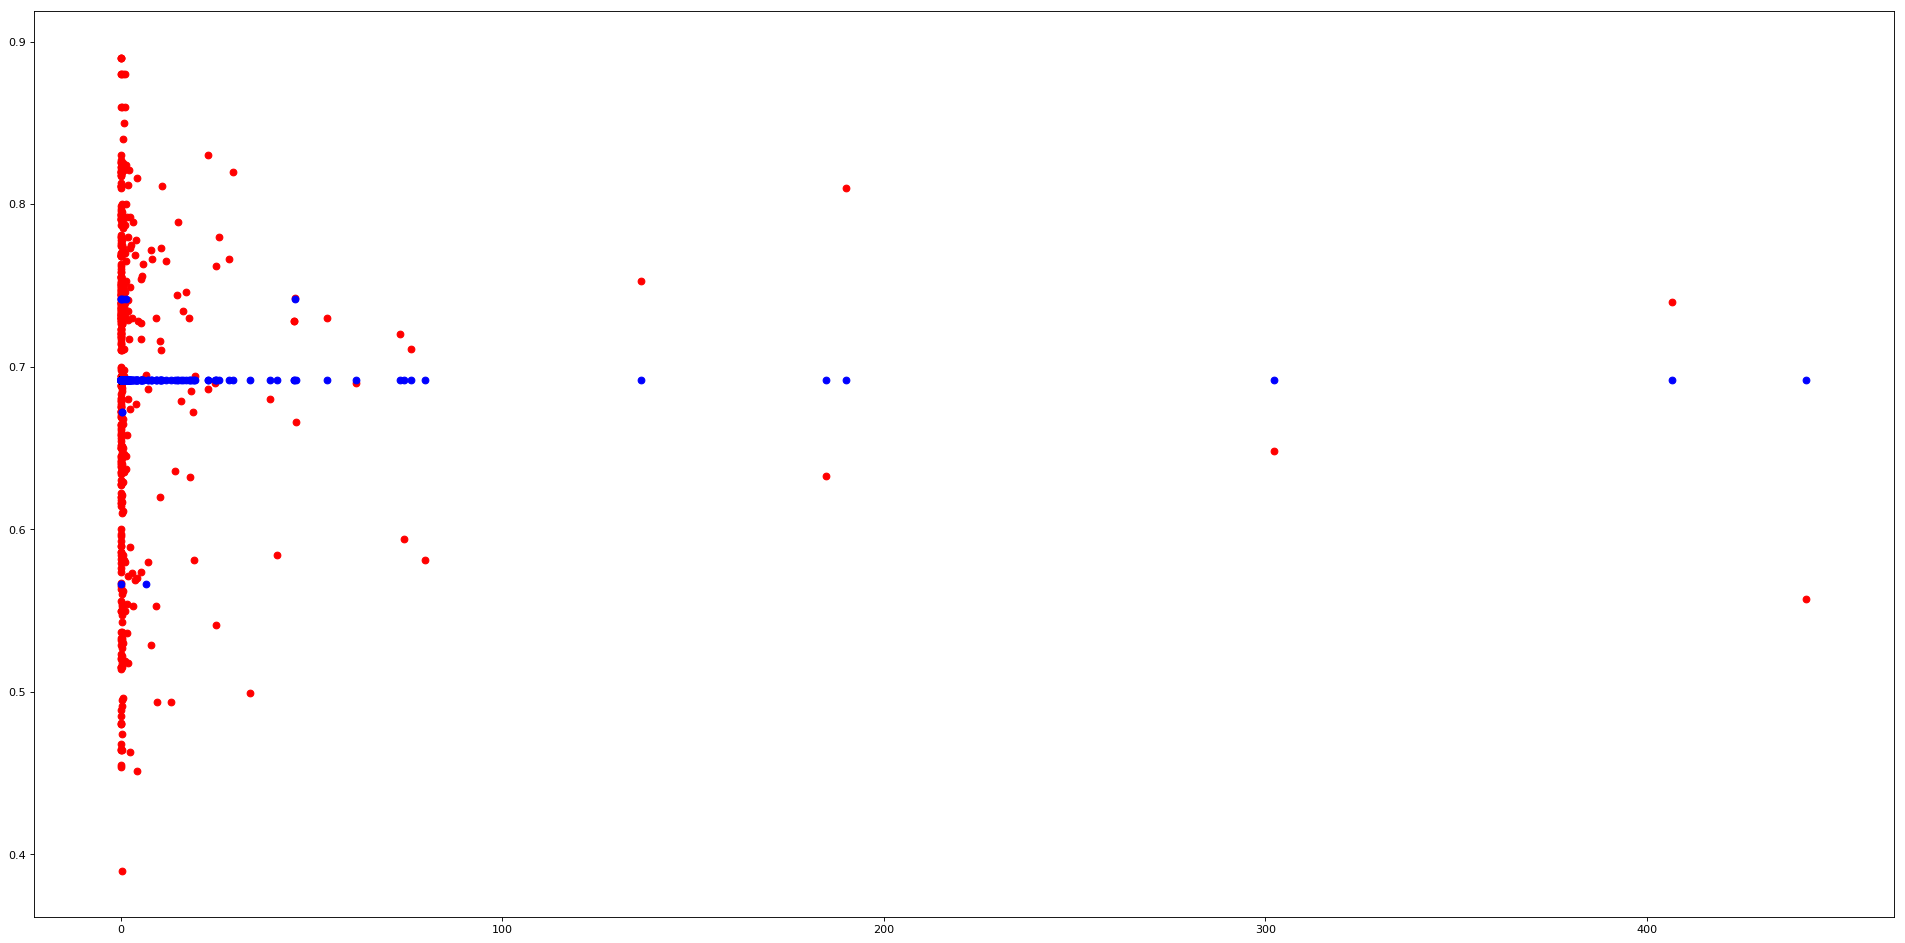

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 5}
Mean squared error: 0.010021819499768068
Score (Variance): -0.038847370530303627
--------------------------------------------------------------------------------------------------------



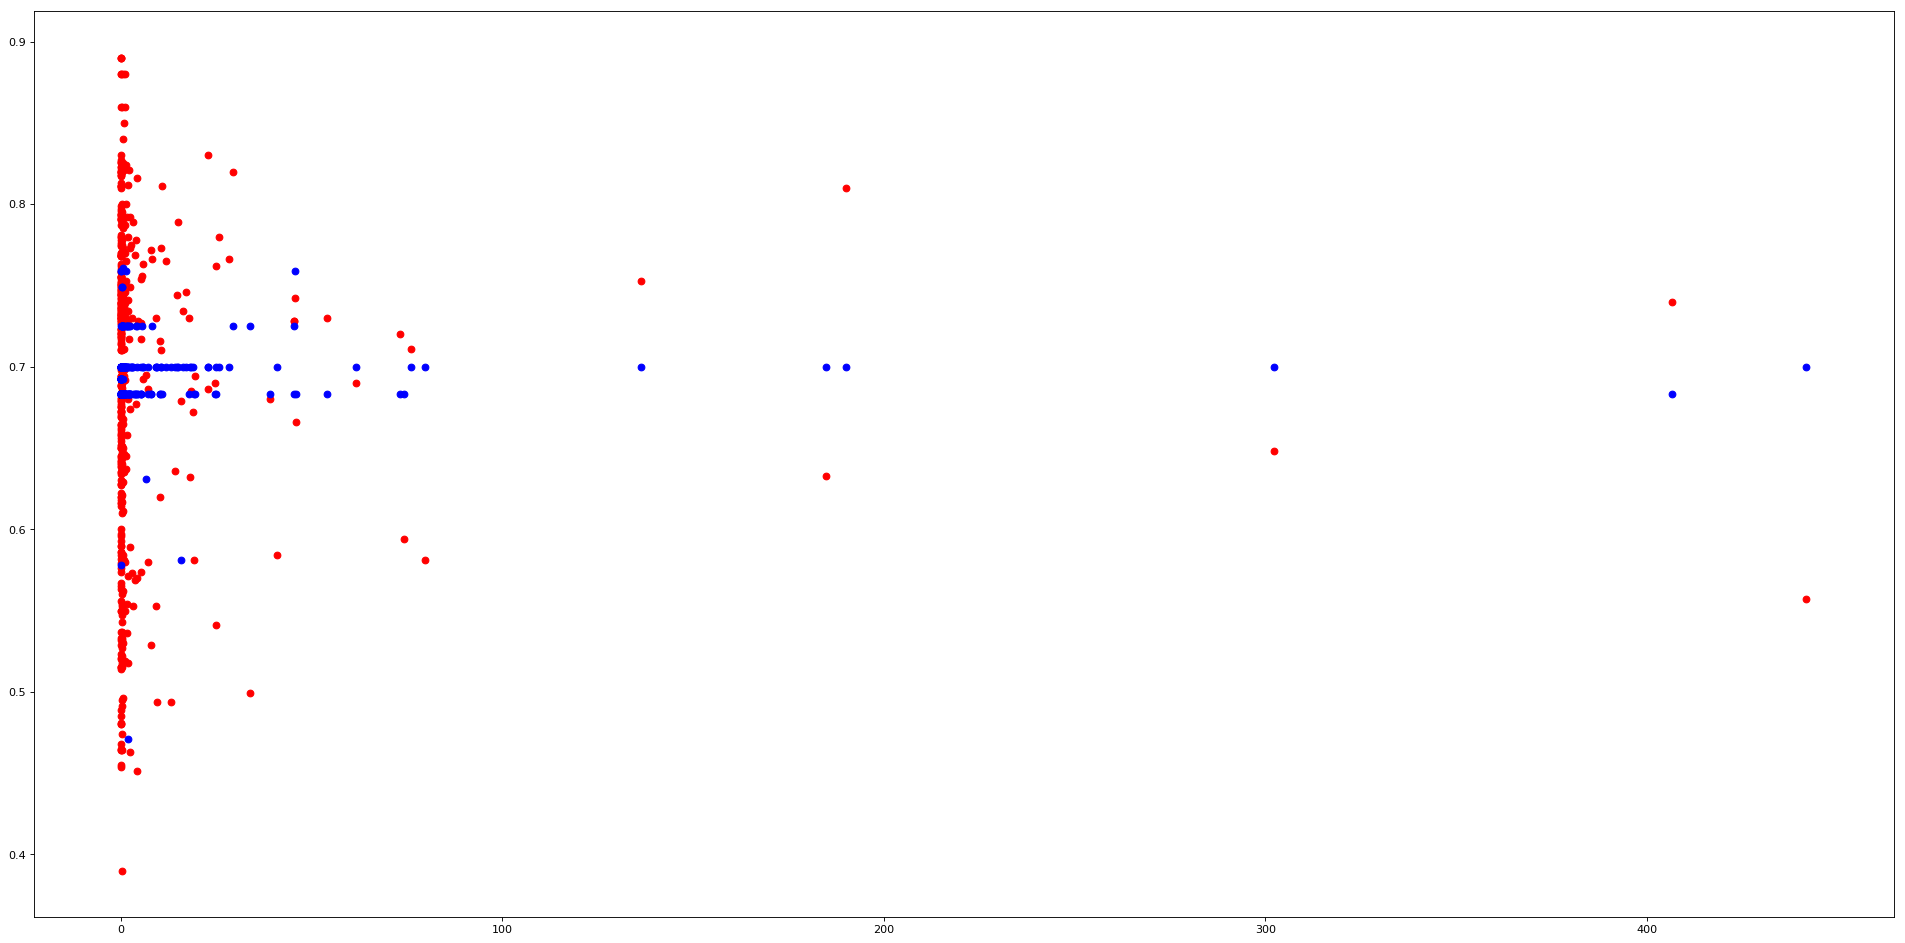

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 7}
Mean squared error: 0.010608514462302
Score (Variance): -0.09966332507287512
--------------------------------------------------------------------------------------------------------



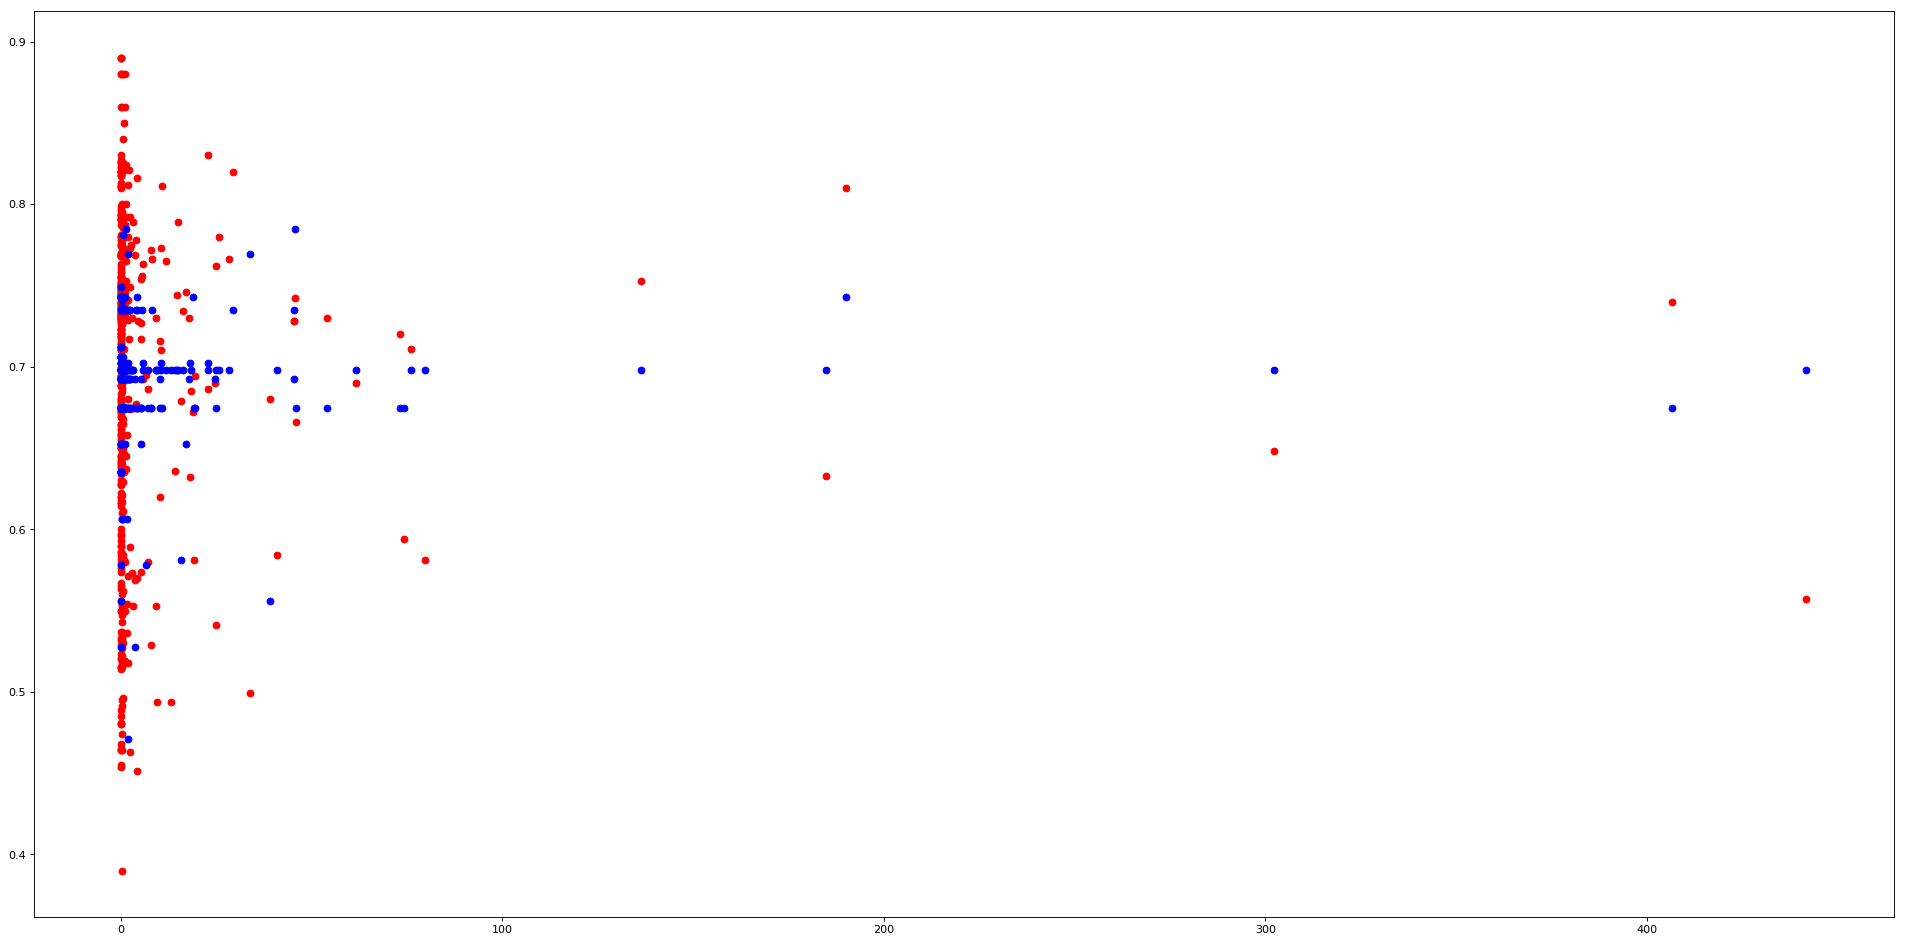

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 10}
Mean squared error: 0.012142640277104964
Score (Variance): -0.2586885967620729
--------------------------------------------------------------------------------------------------------



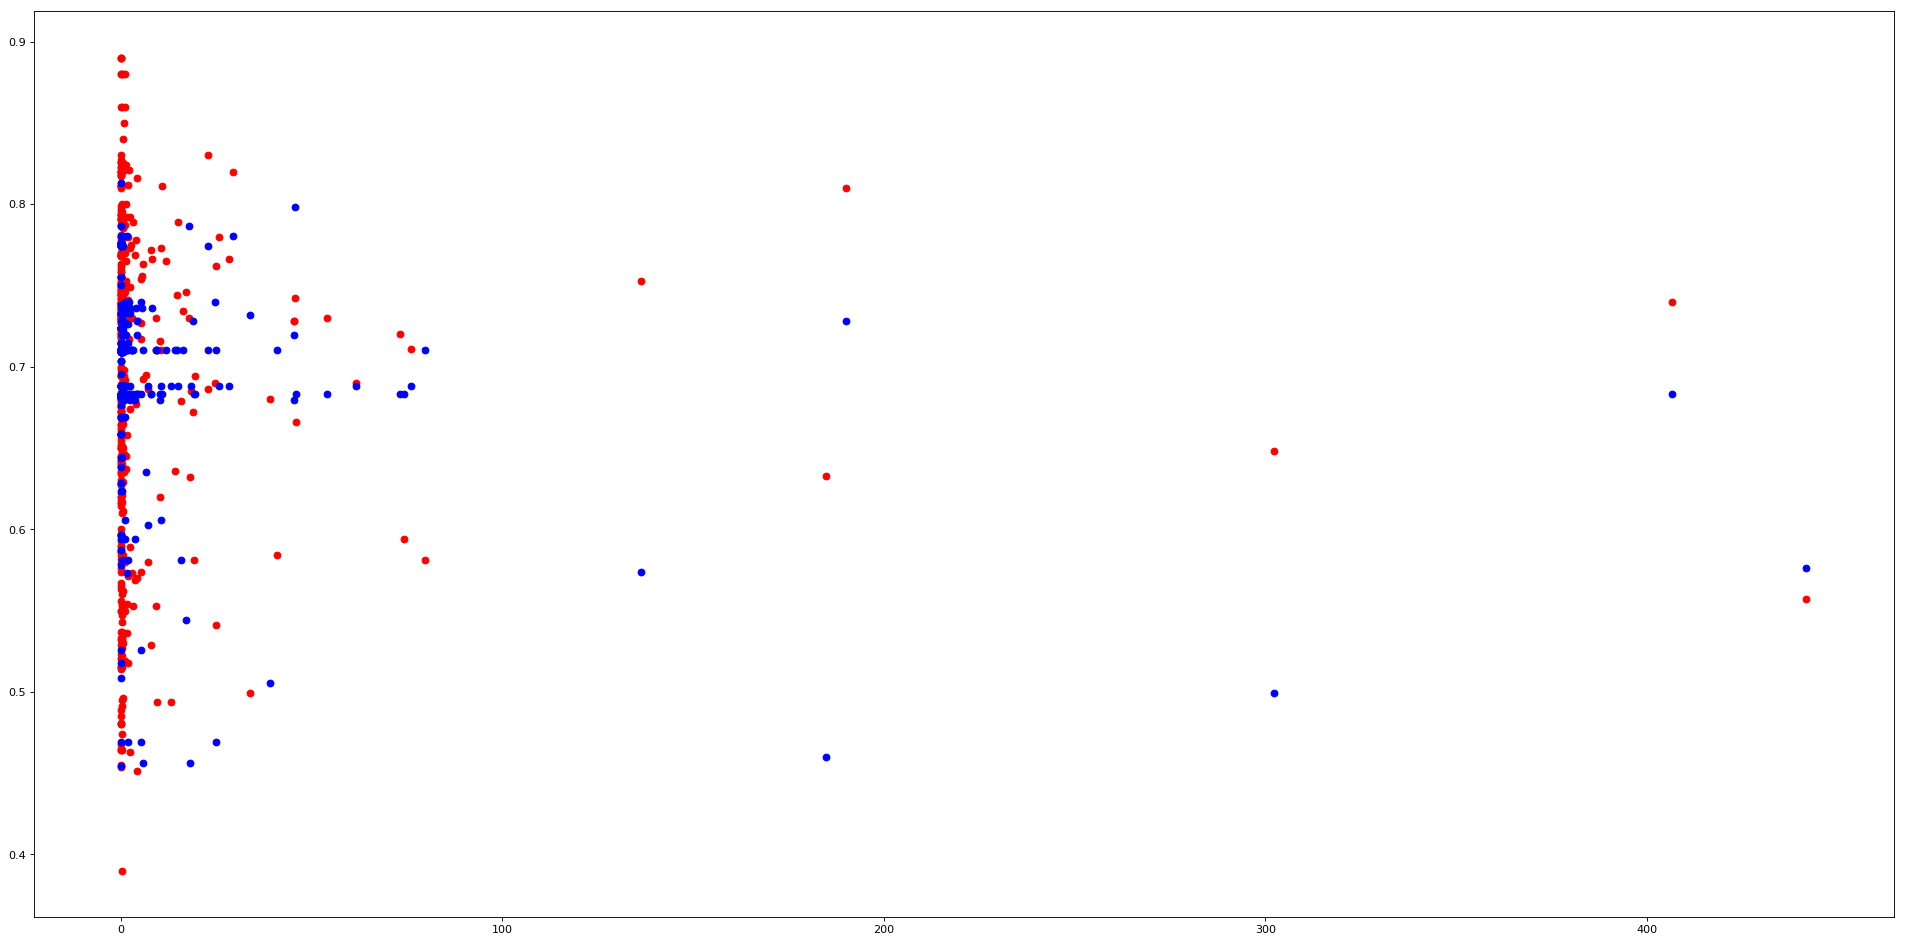

DecisionTreeRegressor {'criterion': 'mae'}
Mean squared error: 0.017250232023594797
Score (Variance): -0.7881341985019603
--------------------------------------------------------------------------------------------------------



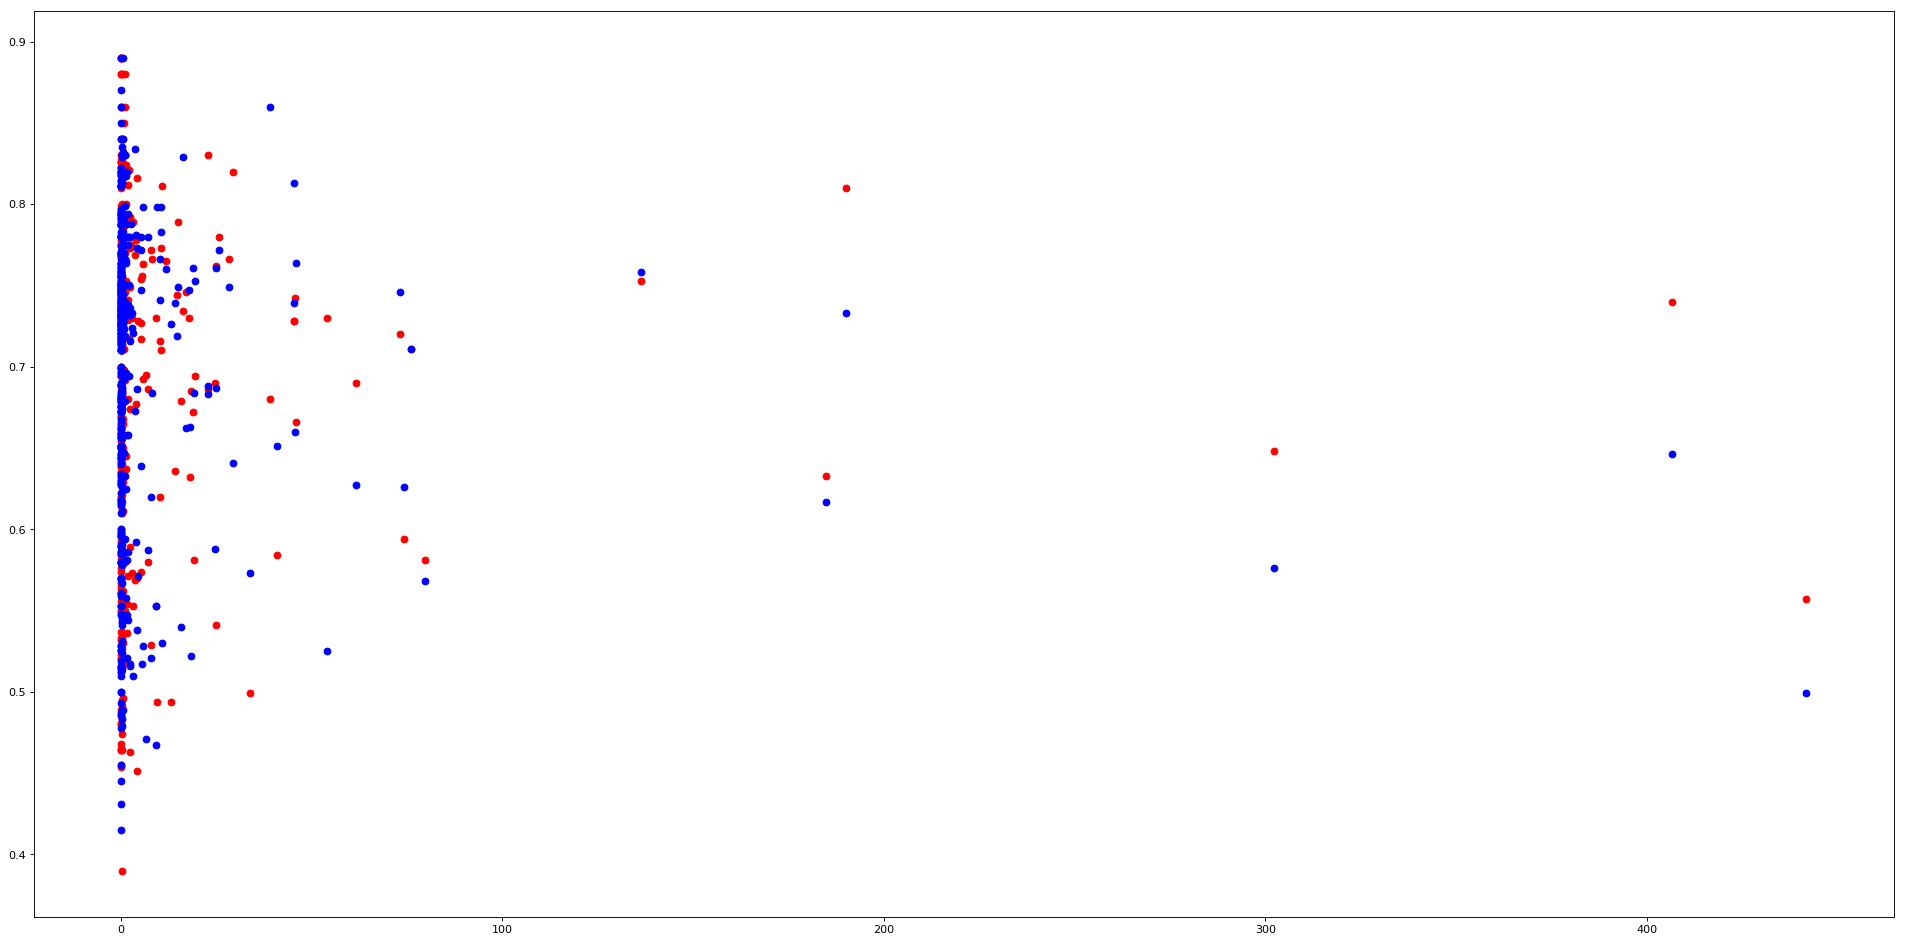

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 2}
Mean squared error: 0.010663007036604404
Score (Variance): -0.10531194681554257
--------------------------------------------------------------------------------------------------------



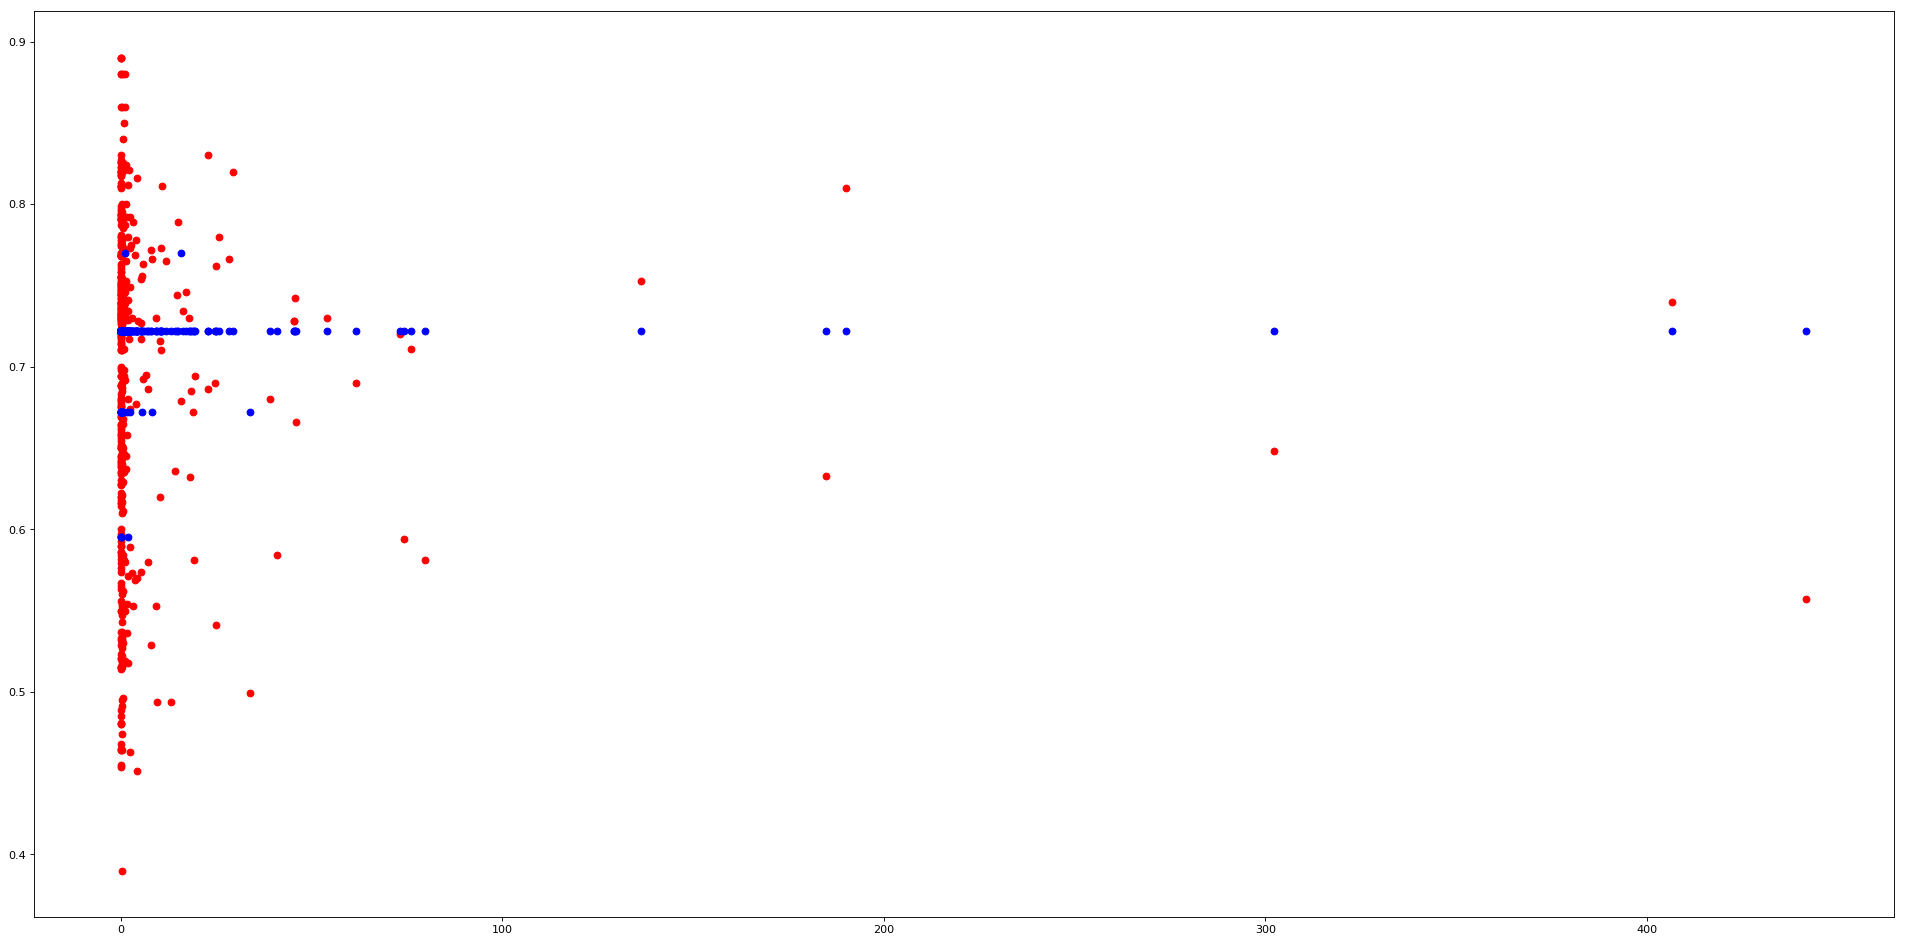

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 5}
Mean squared error: 0.010726614752550535
Score (Variance): -0.11190543100846839
--------------------------------------------------------------------------------------------------------



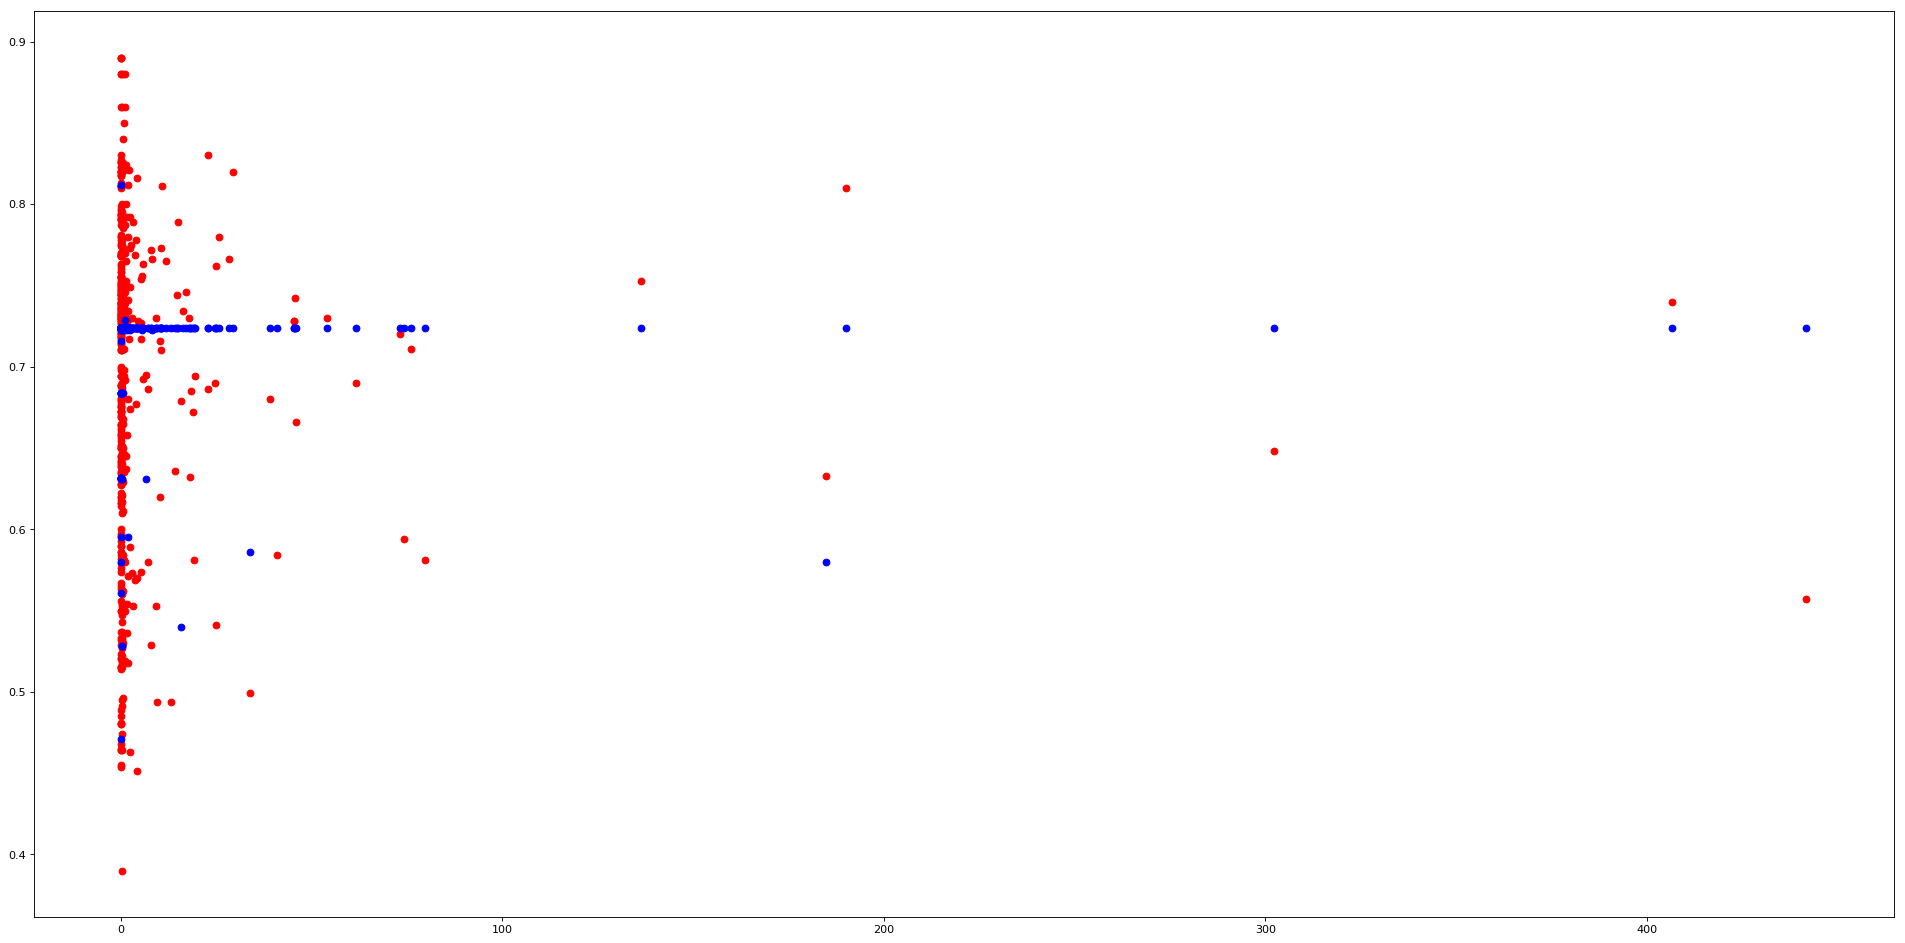

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 7}
Mean squared error: 0.01169369187328954
Score (Variance): -0.21215125203956786
--------------------------------------------------------------------------------------------------------



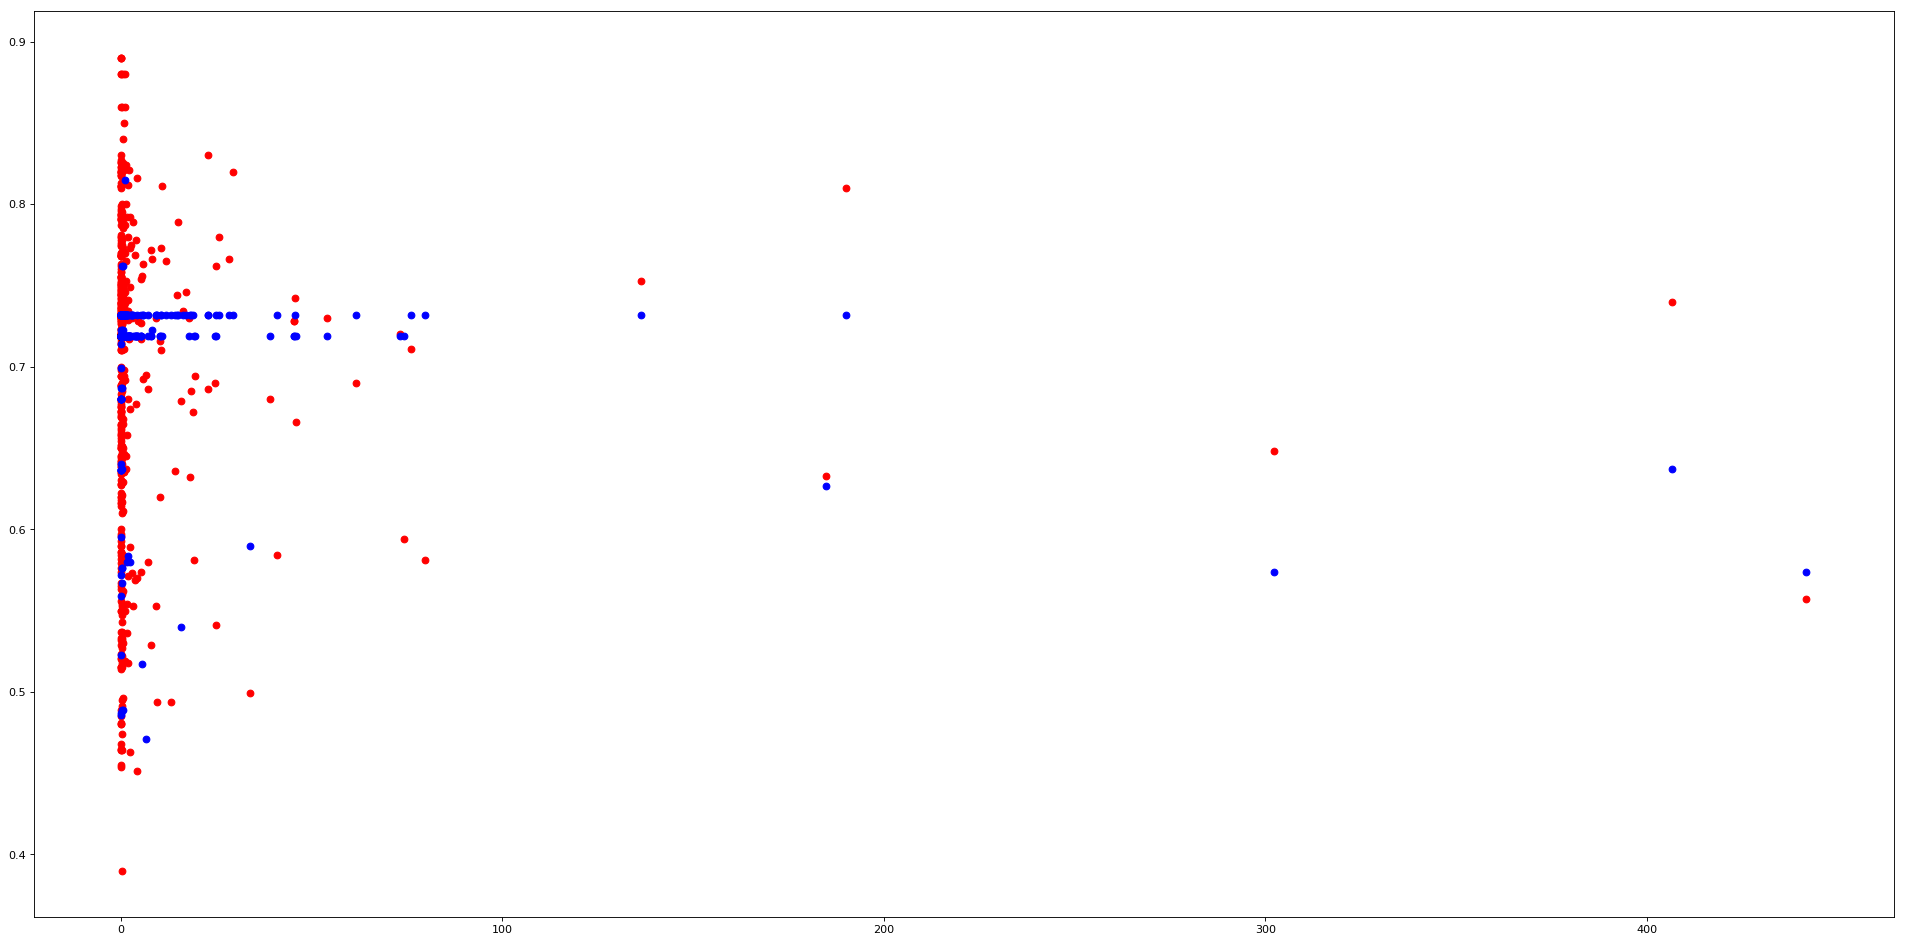

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 10}
Mean squared error: 0.012480880834279479
Score (Variance): -0.293750125602777
--------------------------------------------------------------------------------------------------------



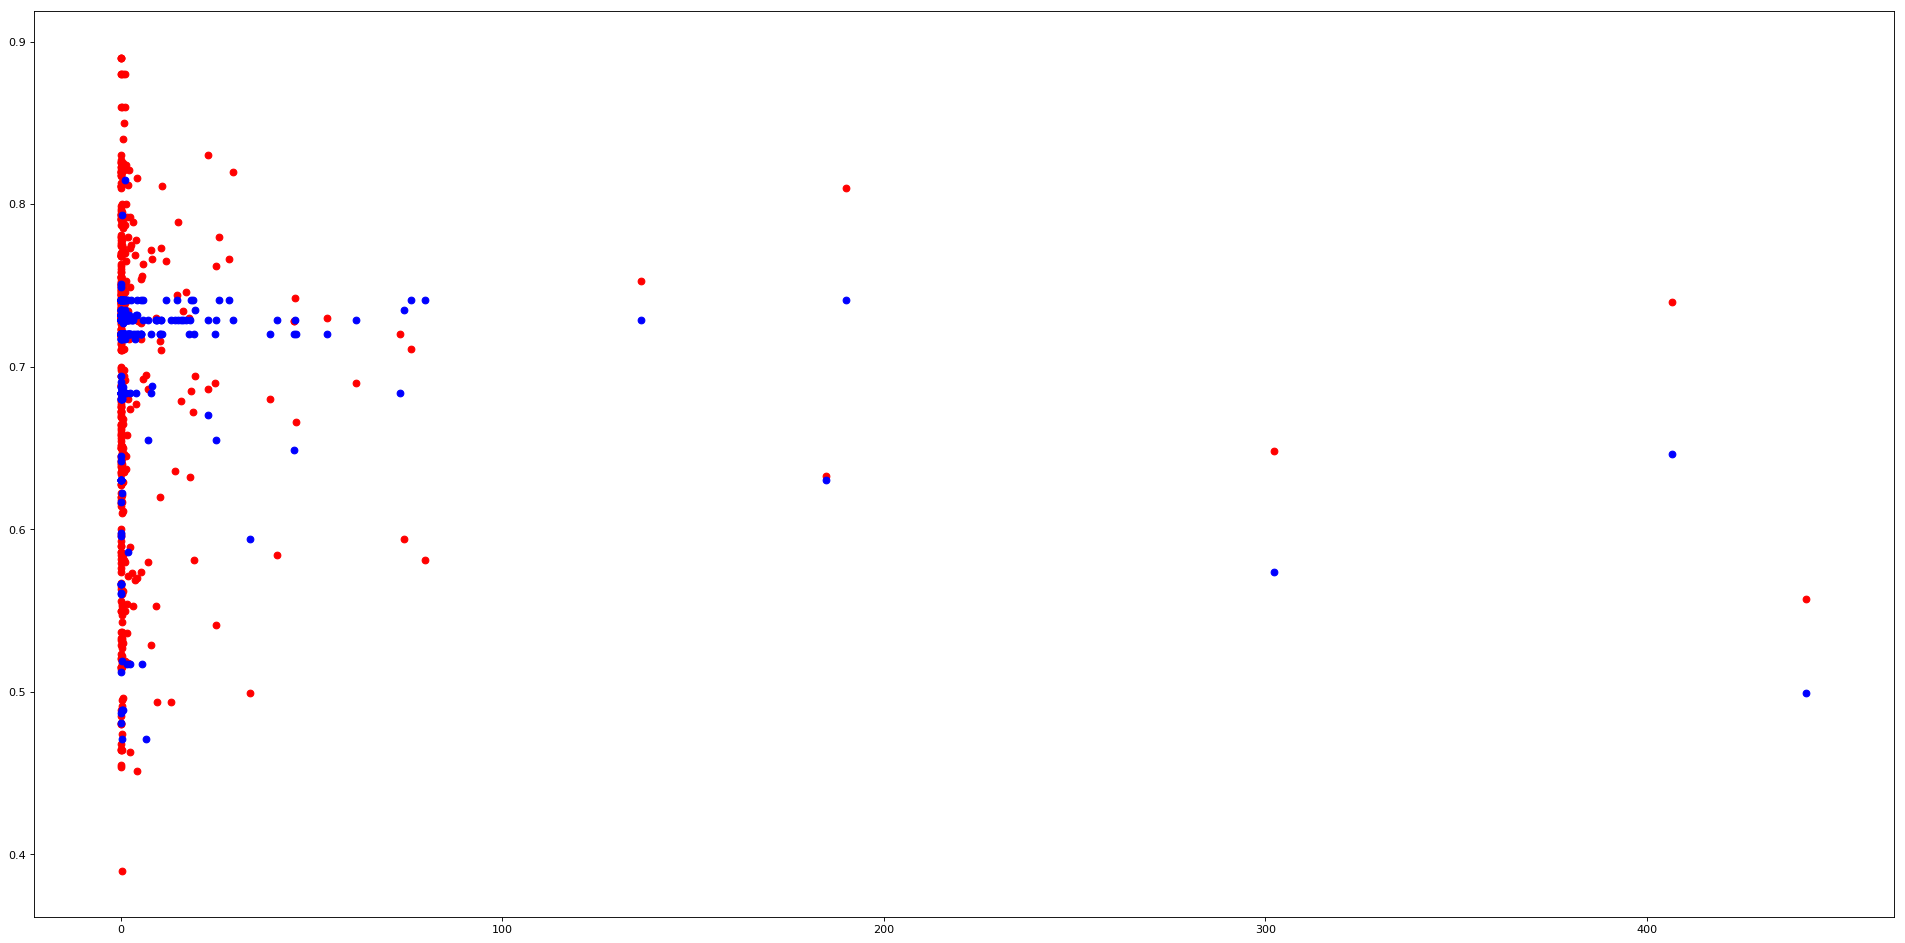

In [116]:
decision_tree_regressor_models = [
    (DecisionTreeRegressor, {}),
    (DecisionTreeRegressor, {"max_depth" : 2}),
    (DecisionTreeRegressor, {"max_depth" : 5}),
    (DecisionTreeRegressor, {"max_depth" : 7}),
    (DecisionTreeRegressor, {"max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse"}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "mae"}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 10}),
]


for i, (Model, kwargs) in enumerate(decision_tree_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train_poly, y_train)
  y_predicted = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Score (Variance):", model.score(X_test_poly, y_test))
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_expected_and_trained_data(X_test_poly, y_test, y_predicted)

# Random Forest - Regression

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {}
Mean squared error: 0.0007293517370223337
Score (Variance): 0.9243964497449894
--------------------------------------------------------------------------------------------------------



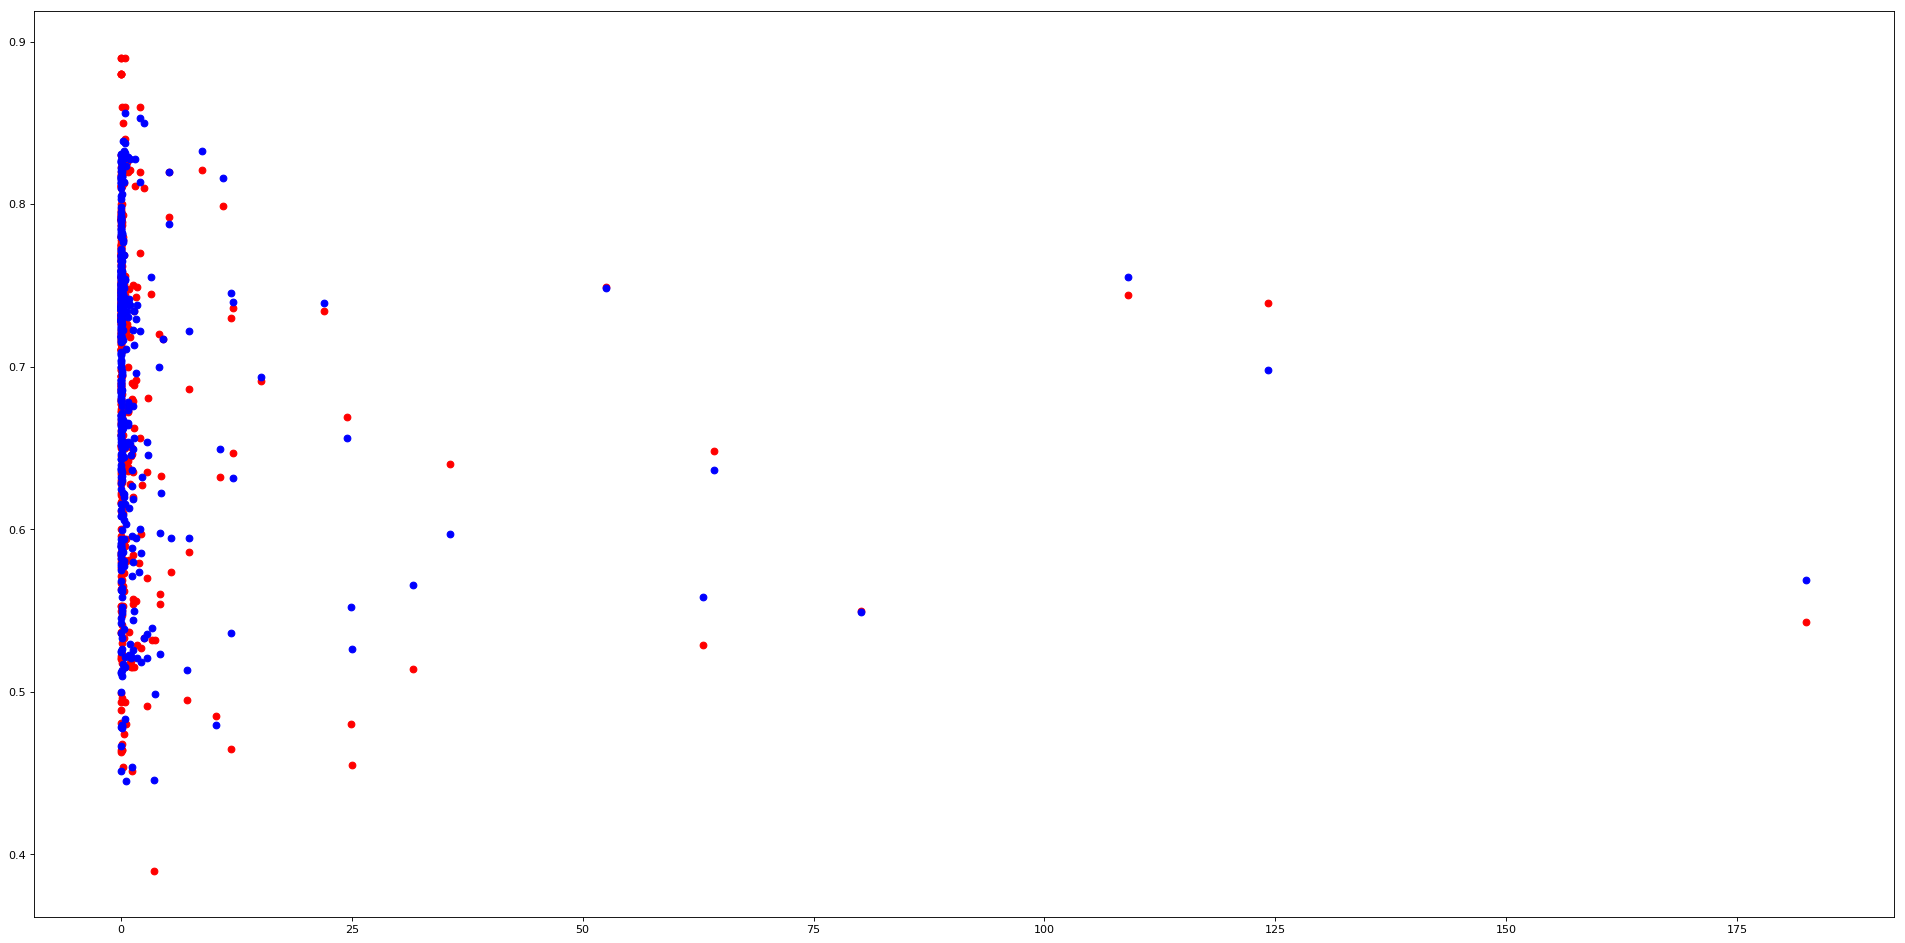

RandomForestRegressor {'n_estimators': 5}
Mean squared error: 0.0007941155868036039
Score (Variance): 0.9176831223843989
--------------------------------------------------------------------------------------------------------



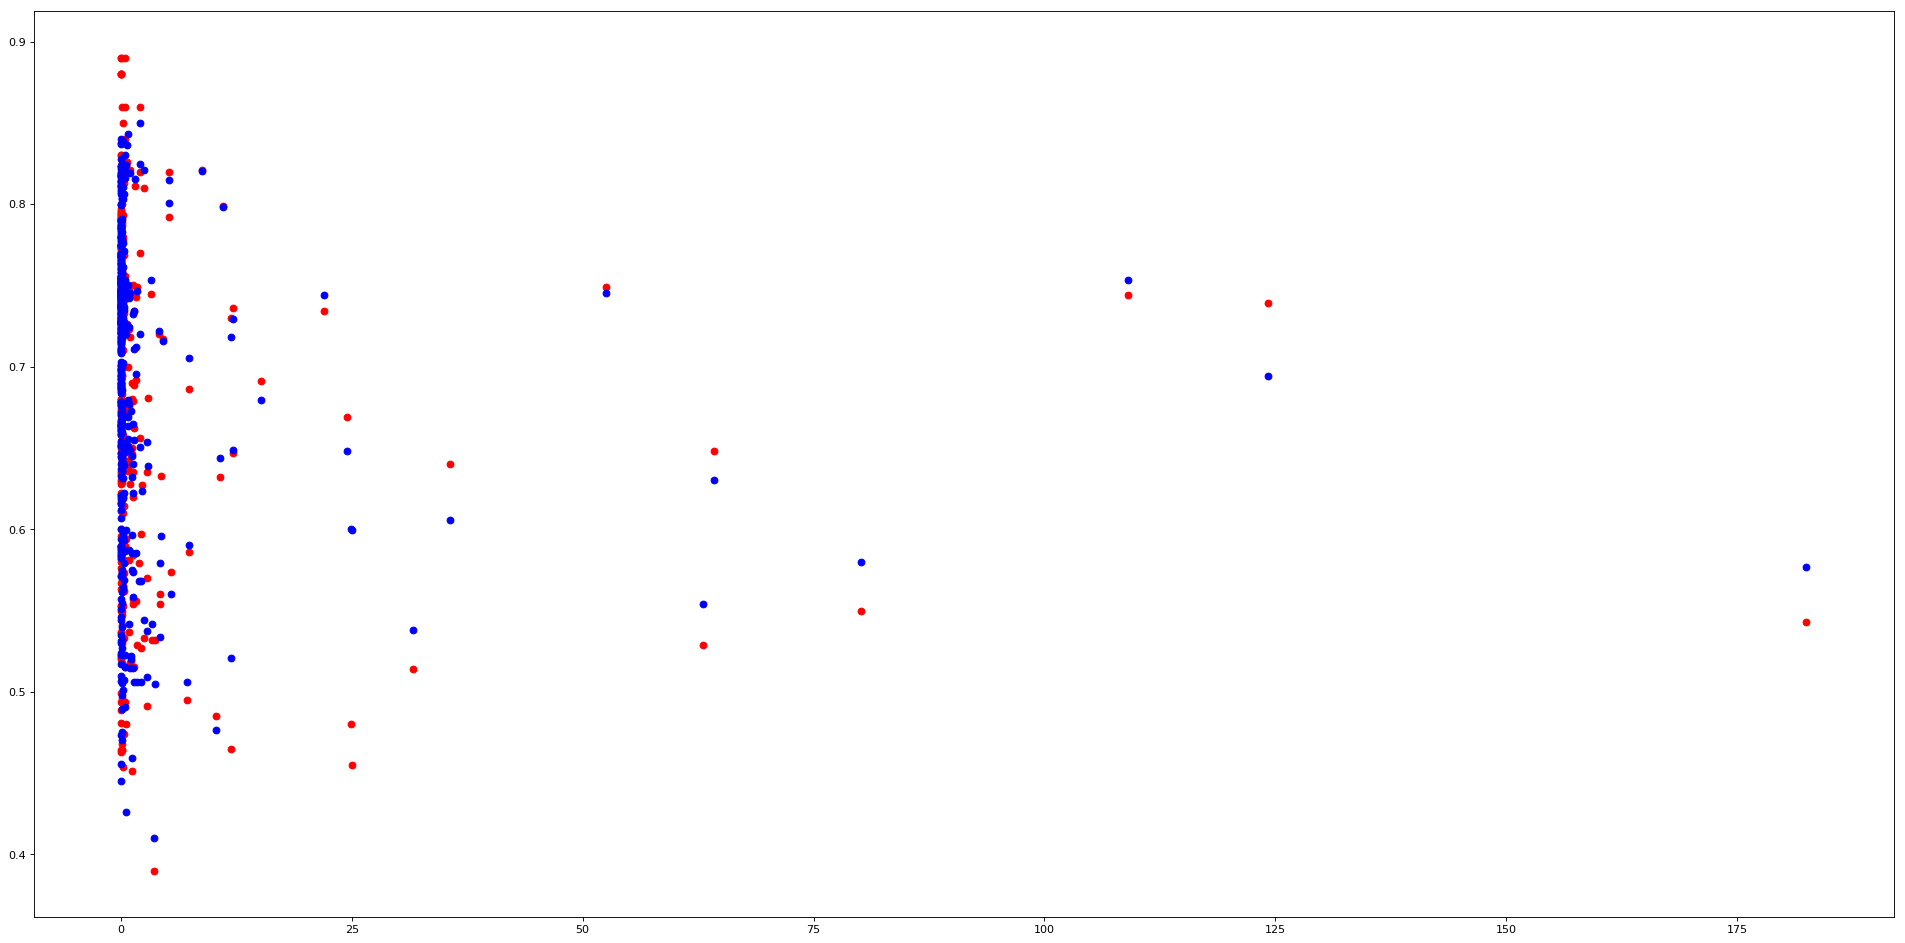

RandomForestRegressor {'n_estimators': 20}
Mean squared error: 0.0006682133176382756
Score (Variance): 0.9307339702138999
--------------------------------------------------------------------------------------------------------



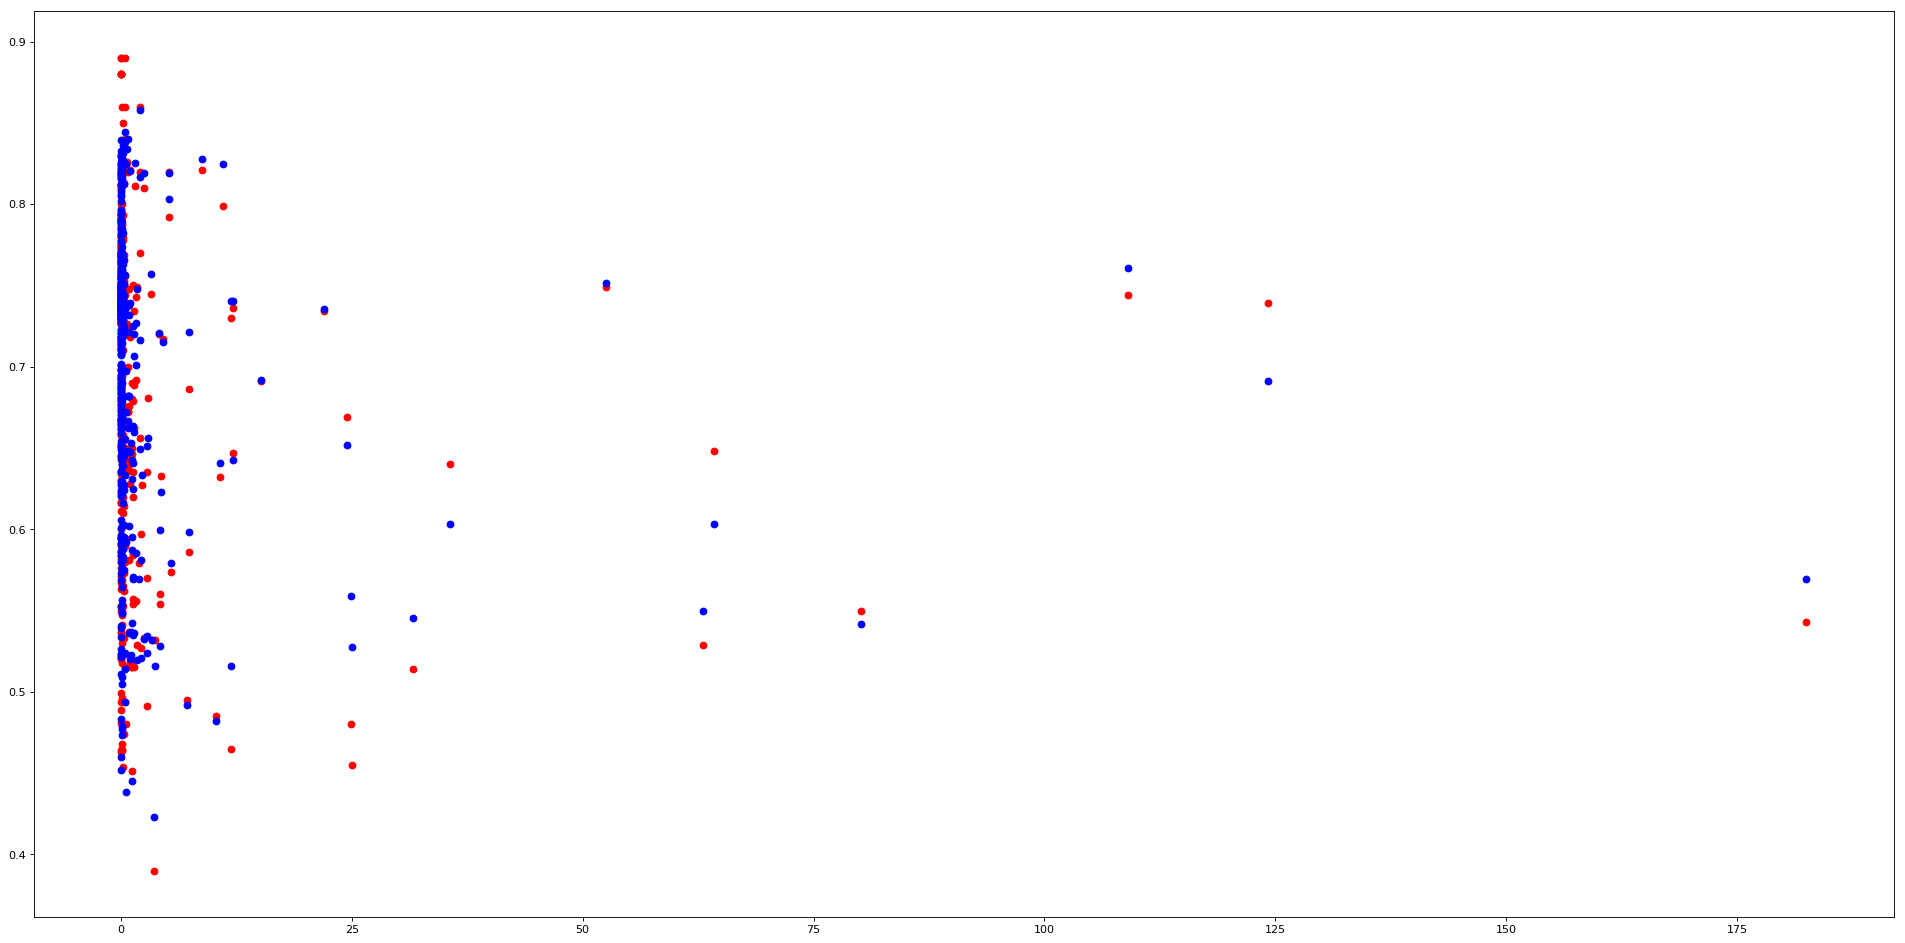

RandomForestRegressor {'n_estimators': 50}
Mean squared error: 0.0006326310825390977
Score (Variance): 0.9344223734396044
--------------------------------------------------------------------------------------------------------



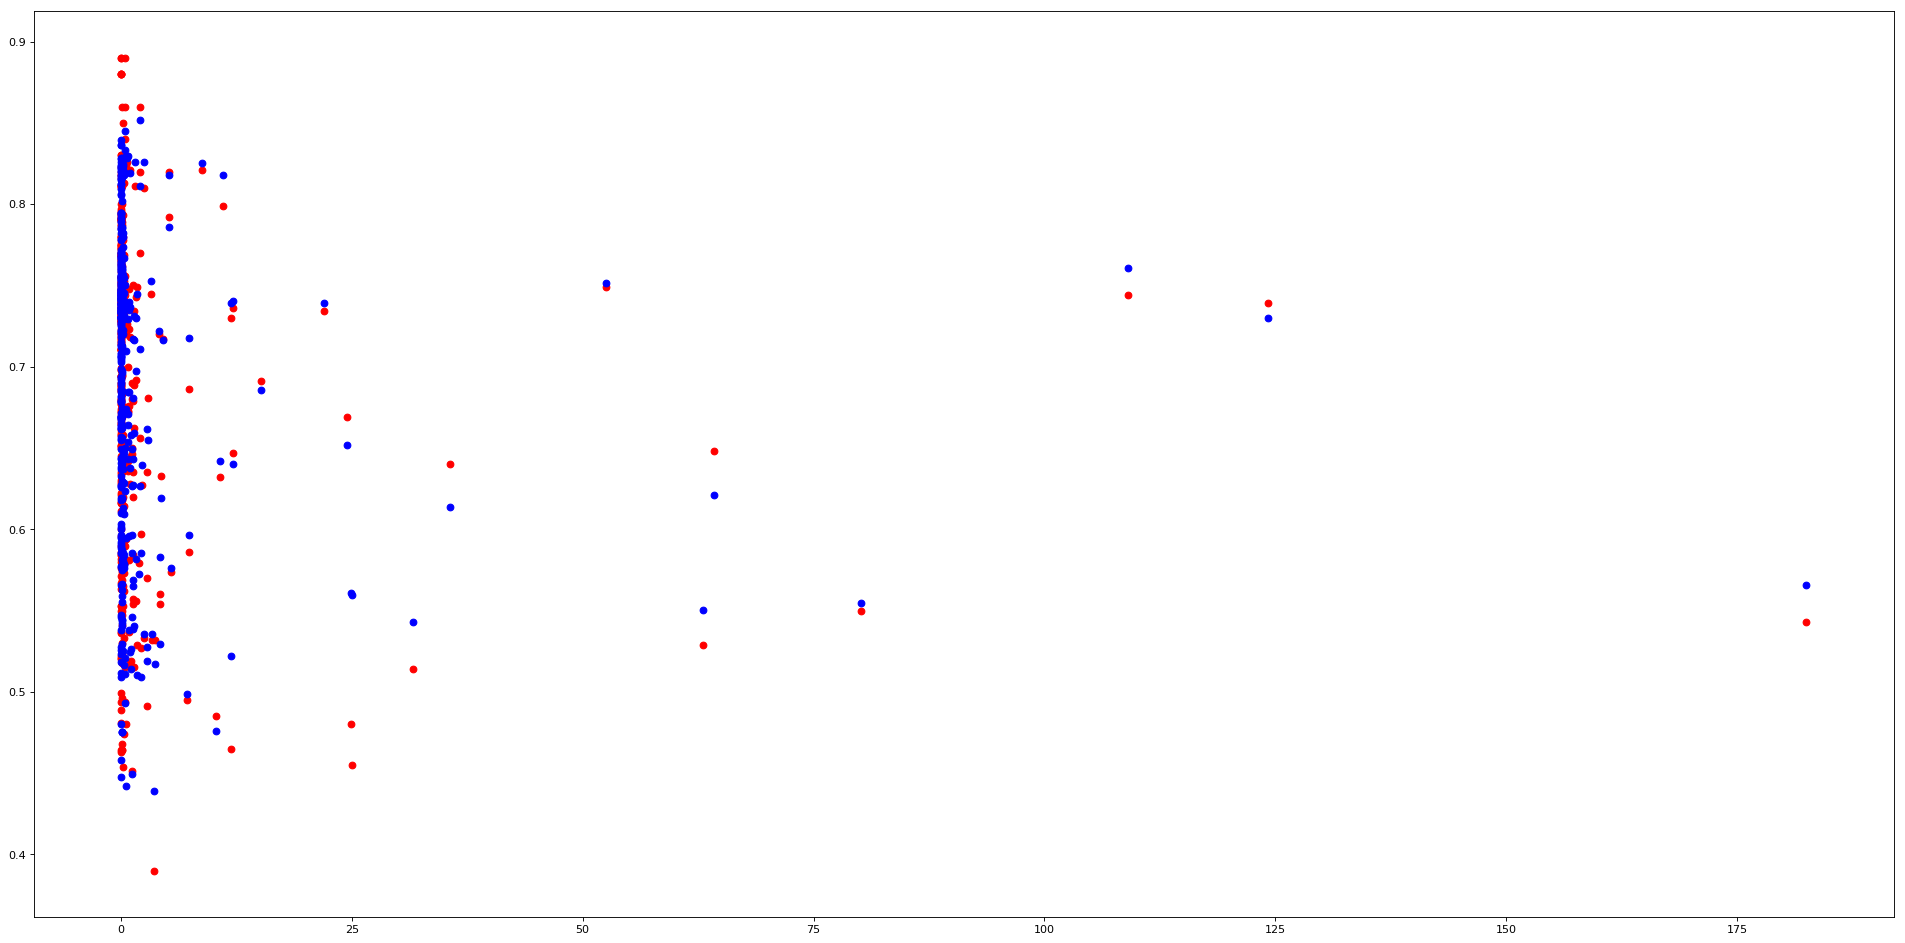

RandomForestRegressor {'n_estimators': 100}
Mean squared error: 0.0006242742869399467
Score (Variance): 0.9352886268314599
--------------------------------------------------------------------------------------------------------



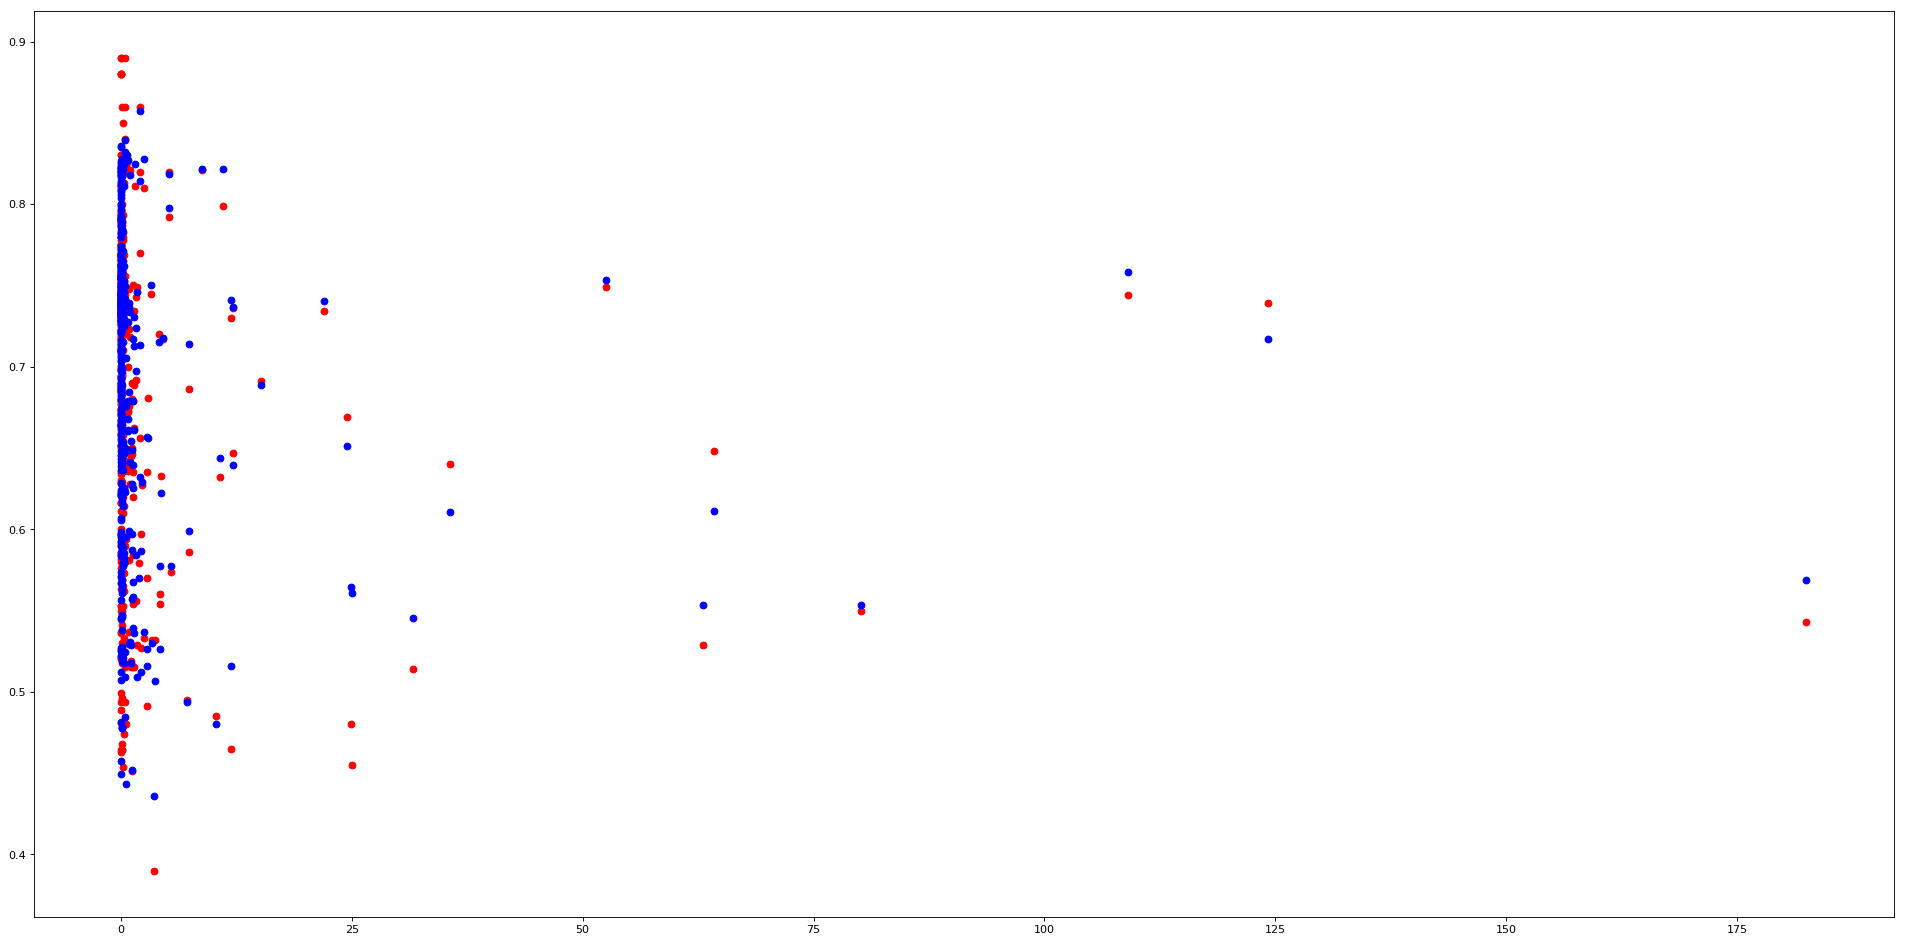

RandomForestRegressor {'n_estimators': 150}
Mean squared error: 0.0006531100133072688
Score (Variance): 0.9322995569809485
--------------------------------------------------------------------------------------------------------



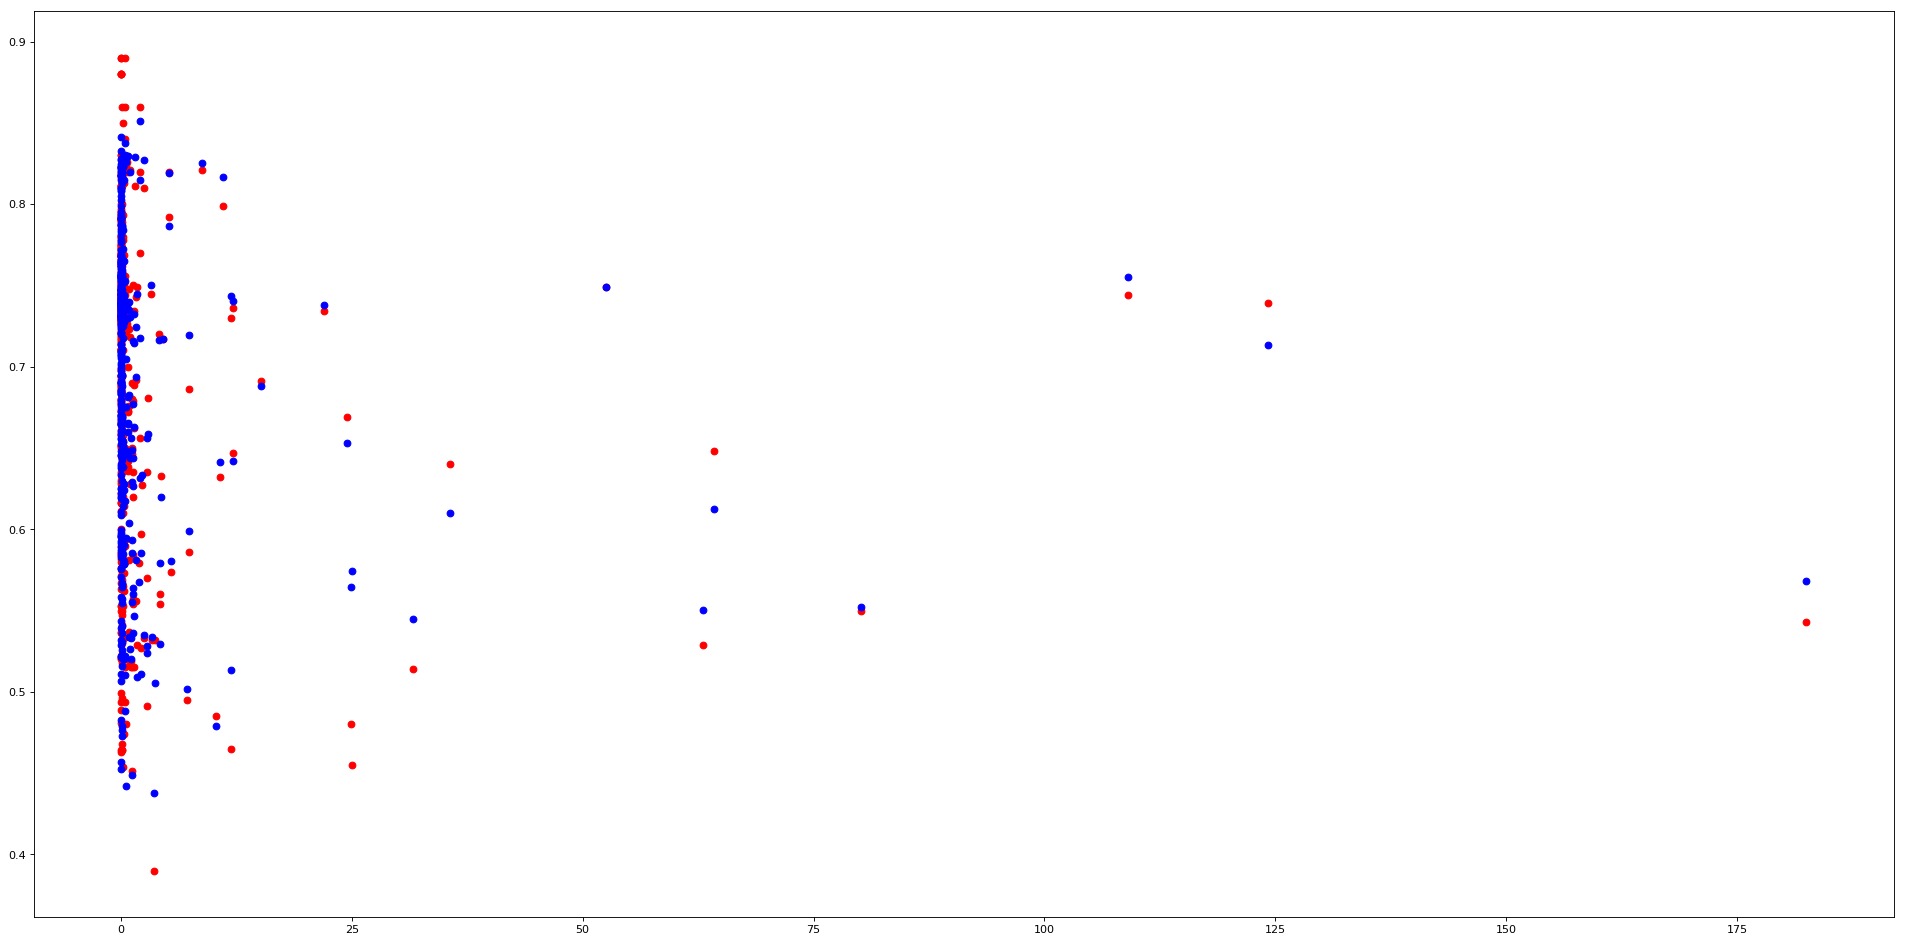

RandomForestRegressor {'n_estimators': 200}
Mean squared error: 0.0006282851294787529
Score (Variance): 0.9348728686724602
--------------------------------------------------------------------------------------------------------



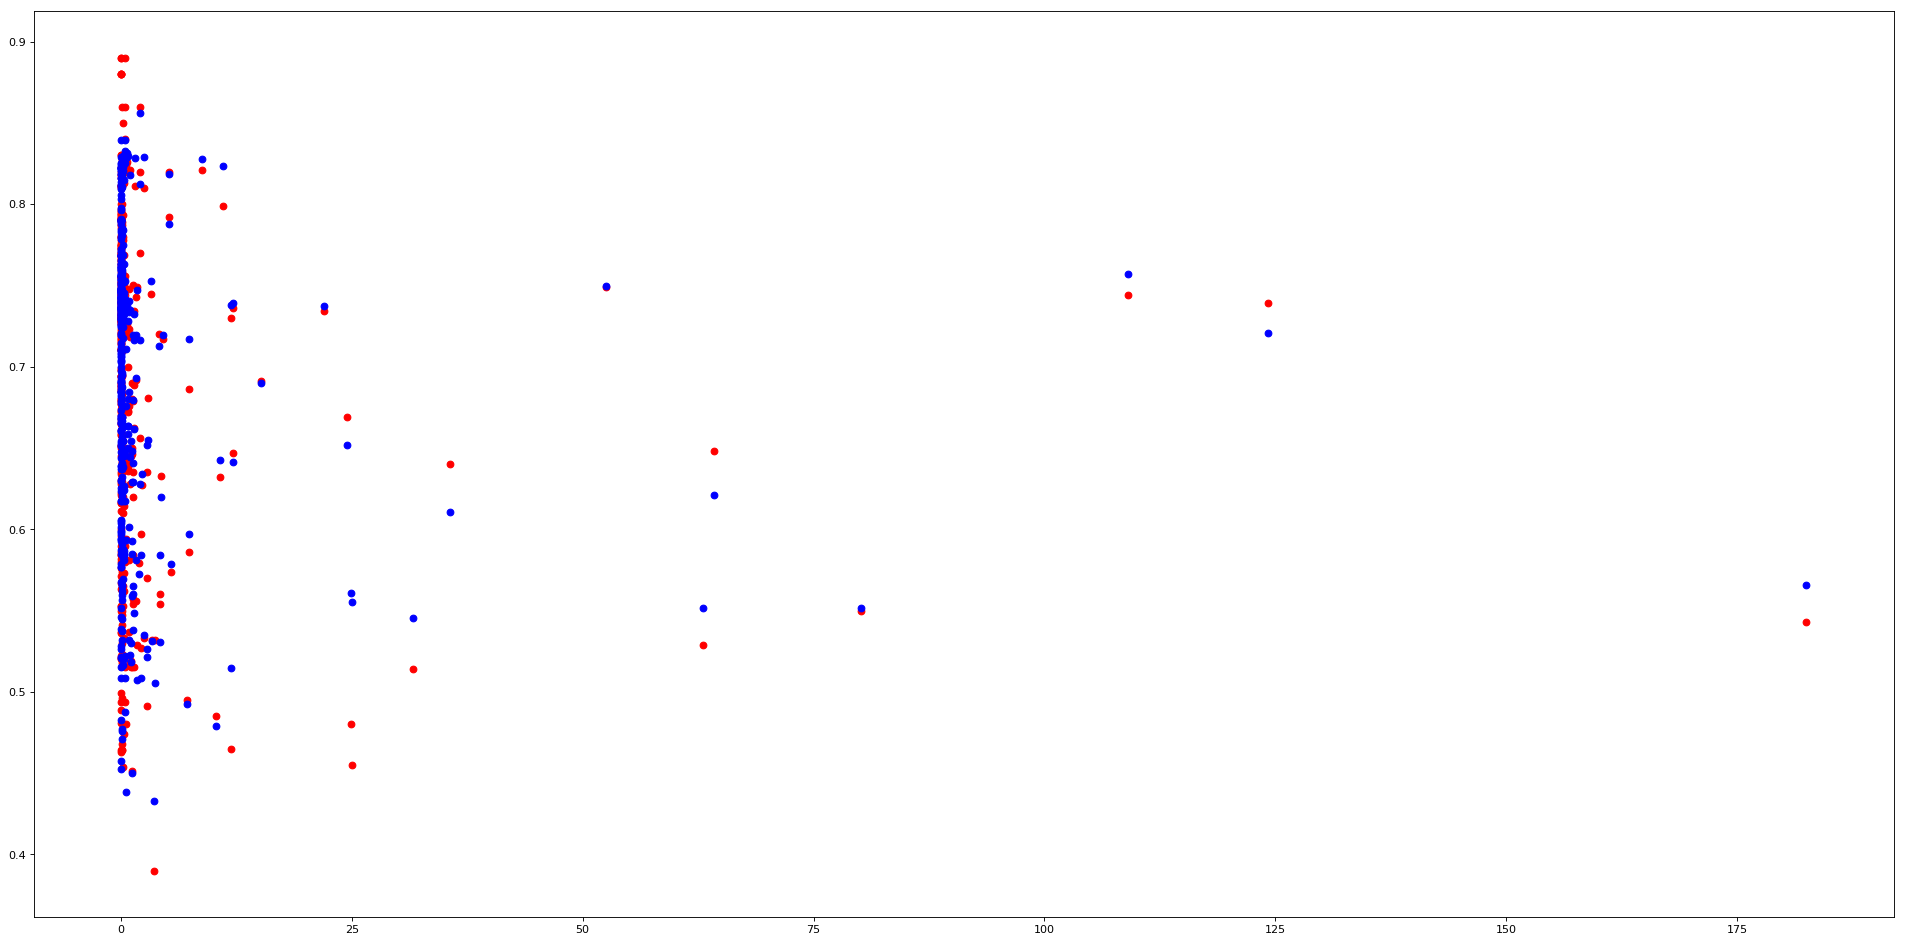

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {'criterion': 'mae'}
Mean squared error: 0.0007384393760621636
Score (Variance): 0.9234544381750269
--------------------------------------------------------------------------------------------------------



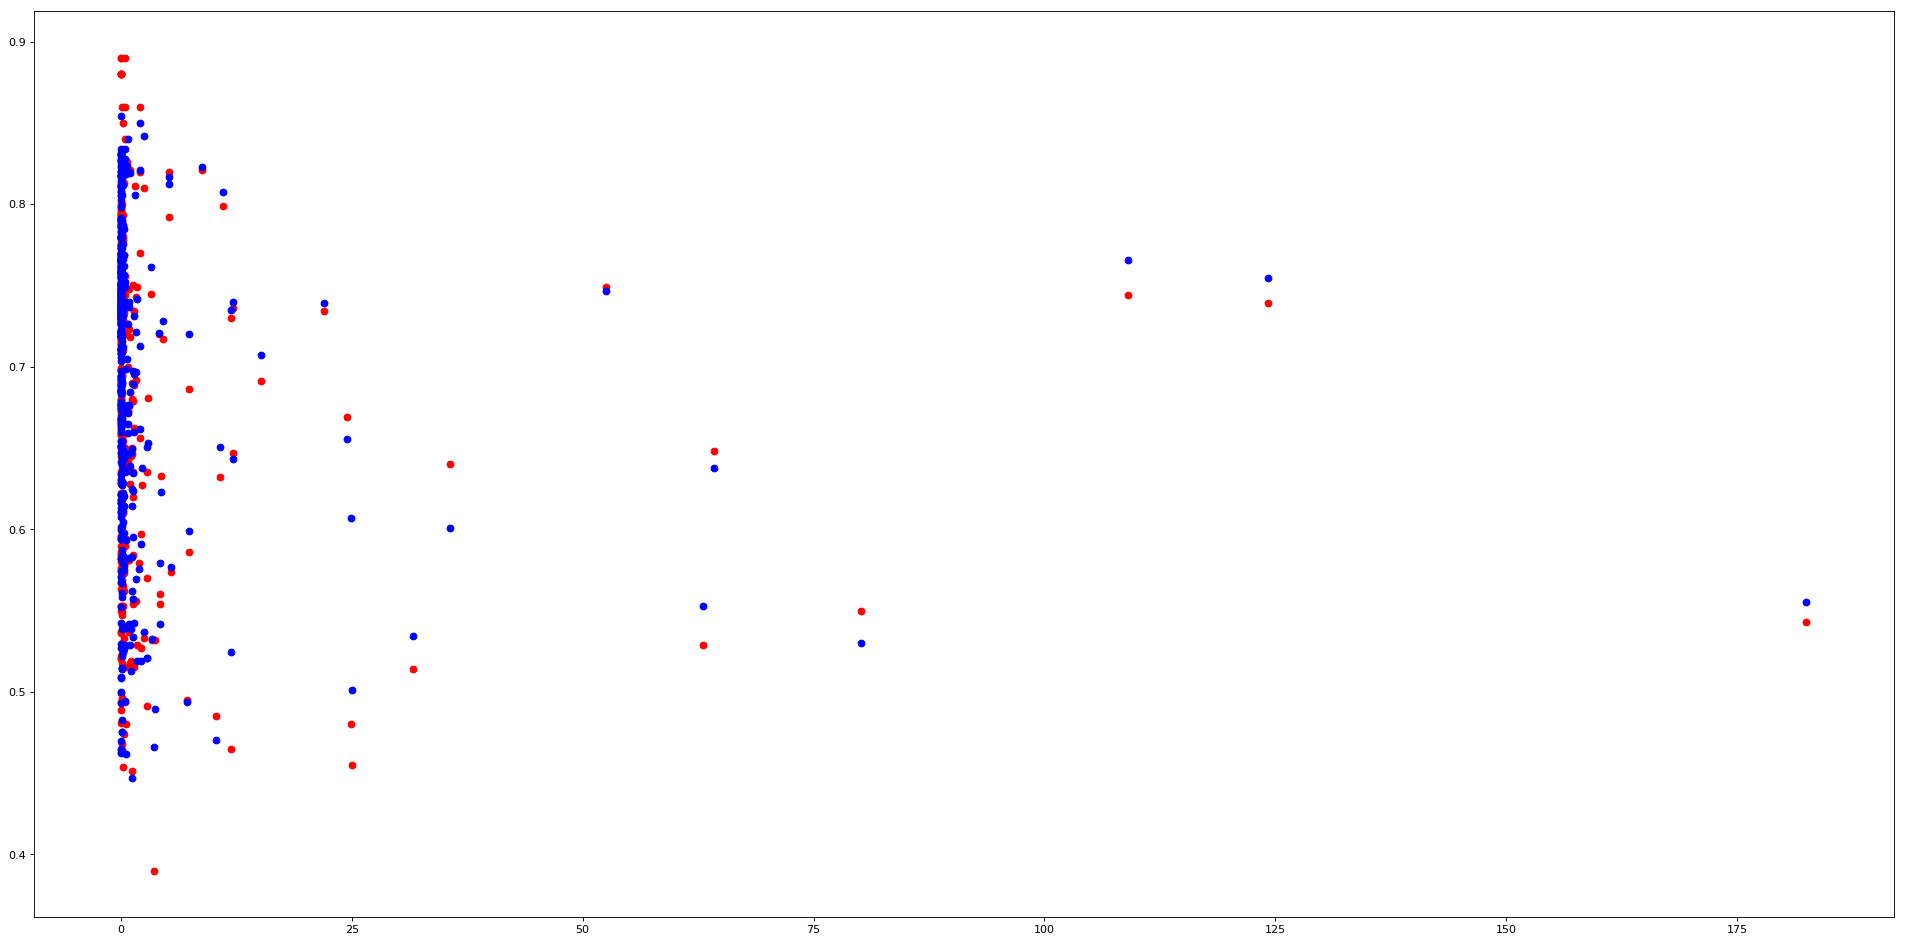

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 5}
Mean squared error: 0.00098931464505792
Score (Variance): 0.897449069236447
--------------------------------------------------------------------------------------------------------



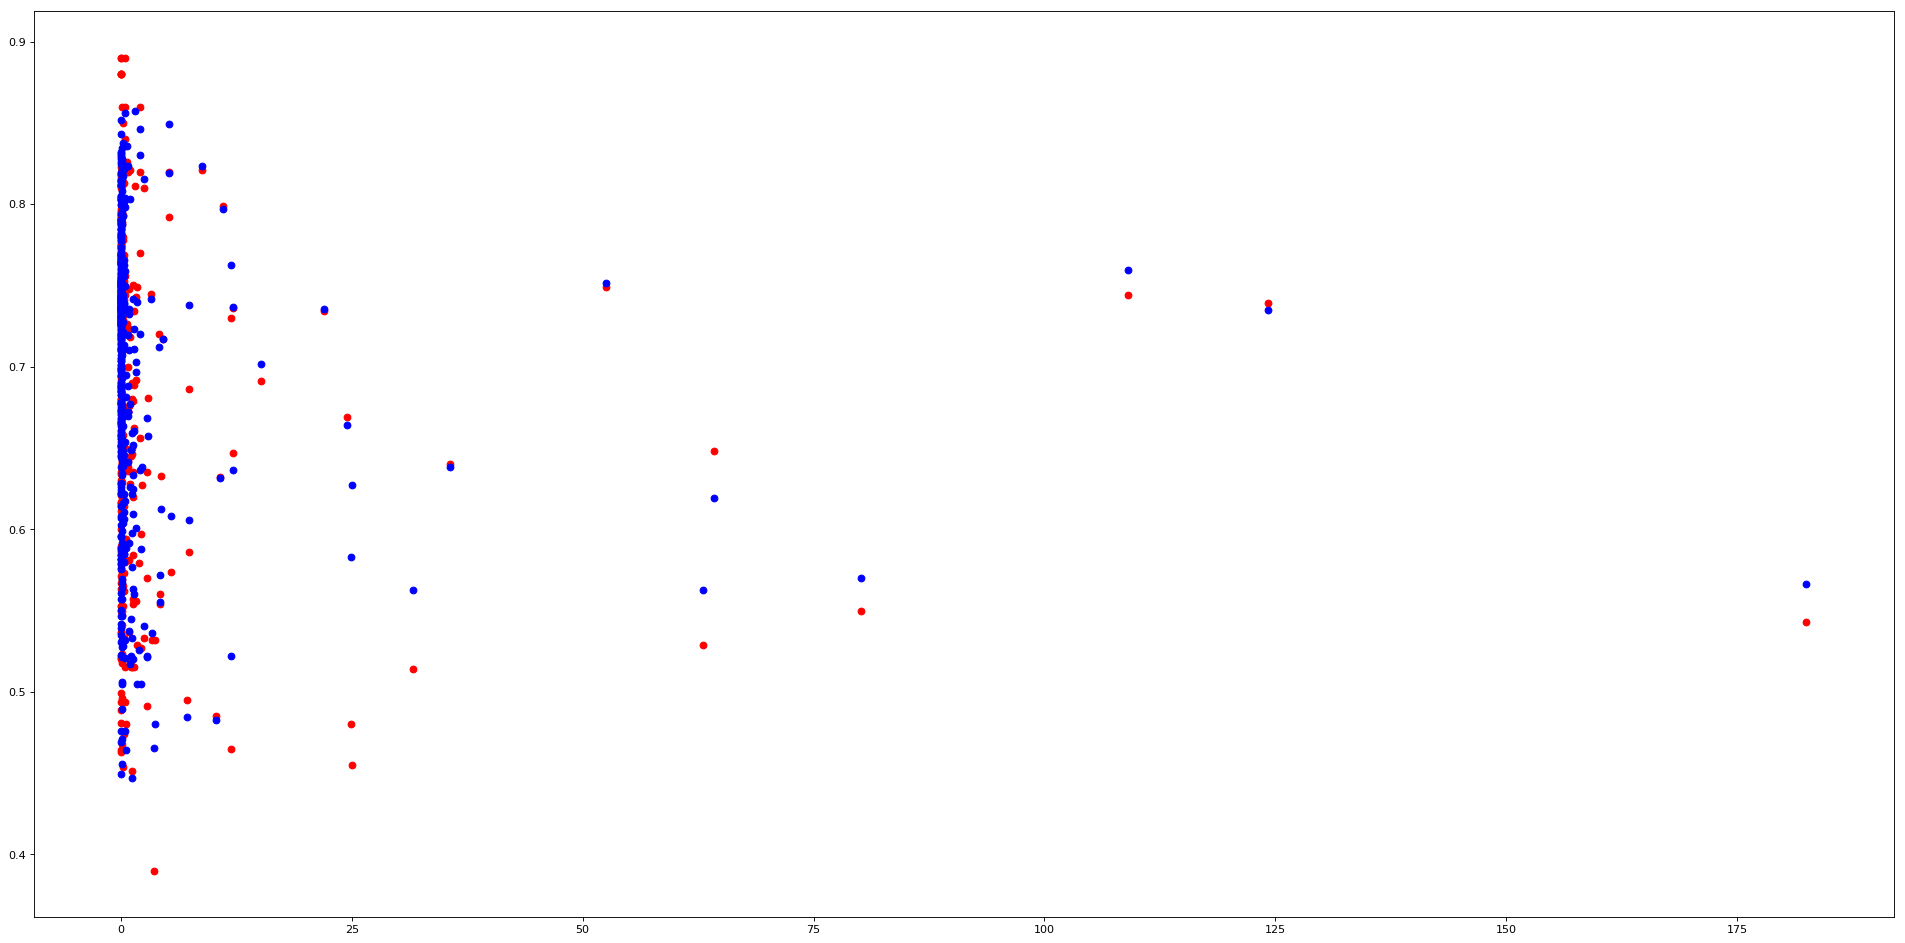

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 20}
Mean squared error: 0.0007421953891516937
Score (Variance): 0.9230650952695969
--------------------------------------------------------------------------------------------------------



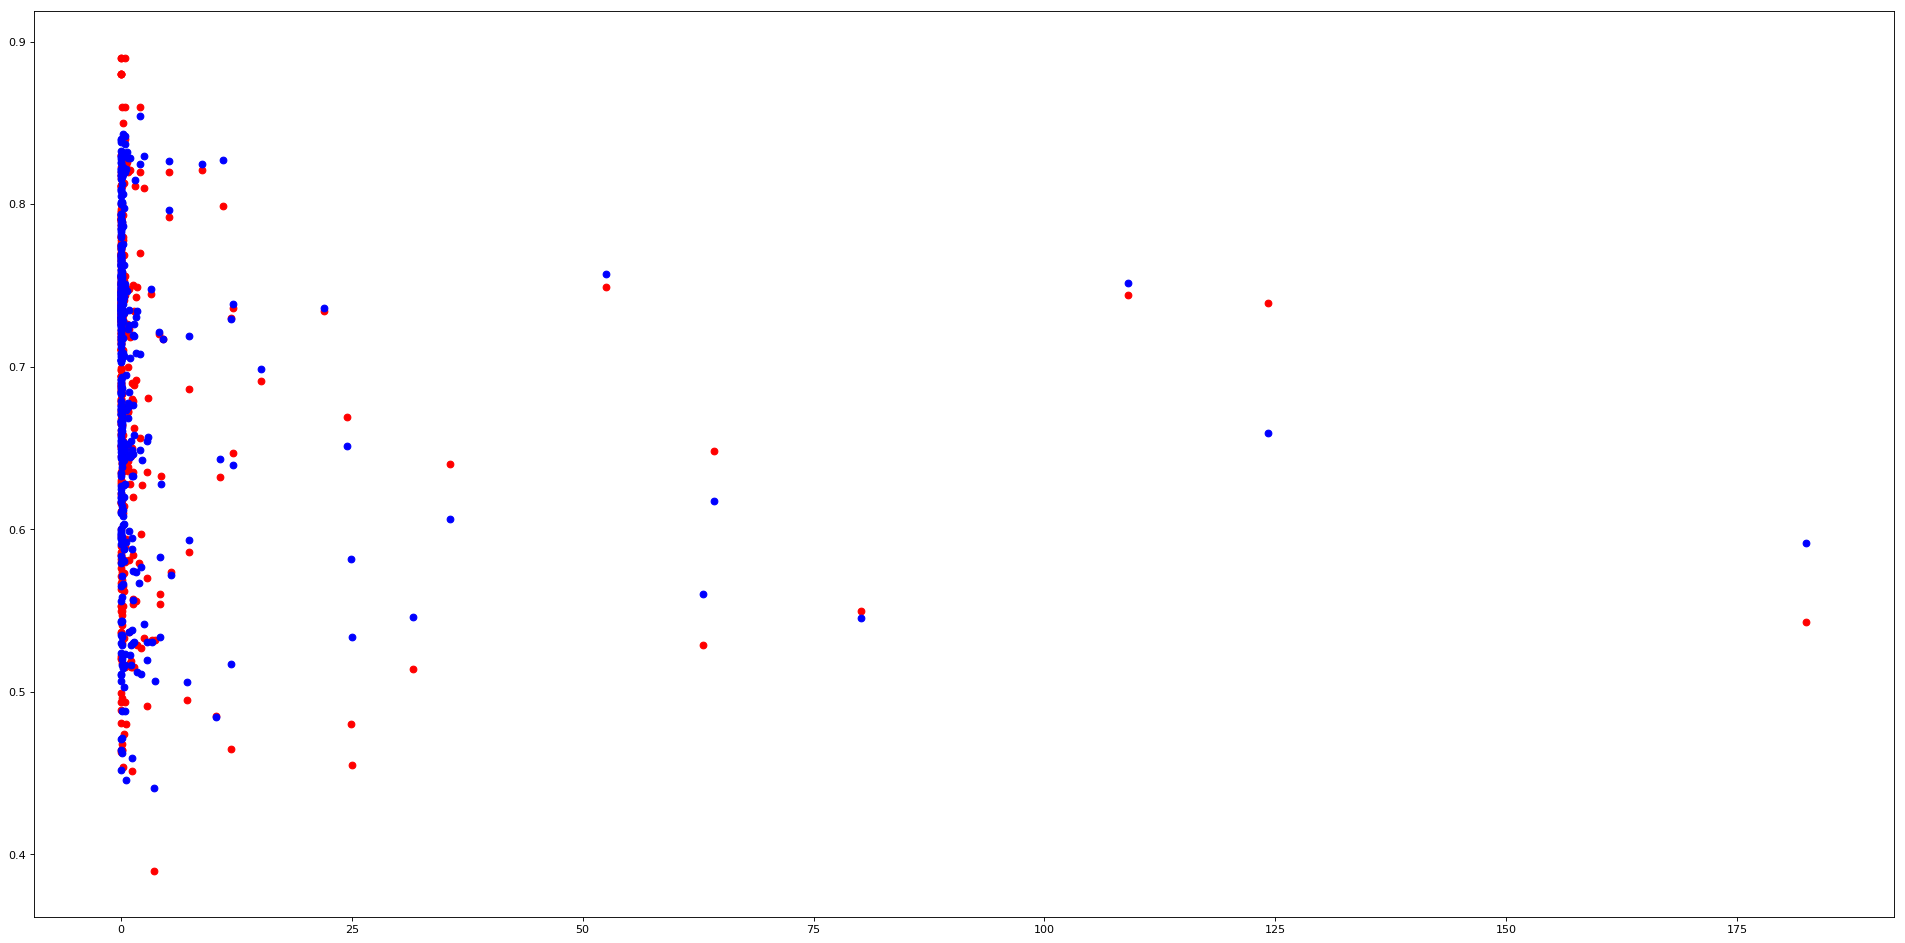

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 50}
Mean squared error: 0.0007151416655466724
Score (Variance): 0.9258694452811672
--------------------------------------------------------------------------------------------------------



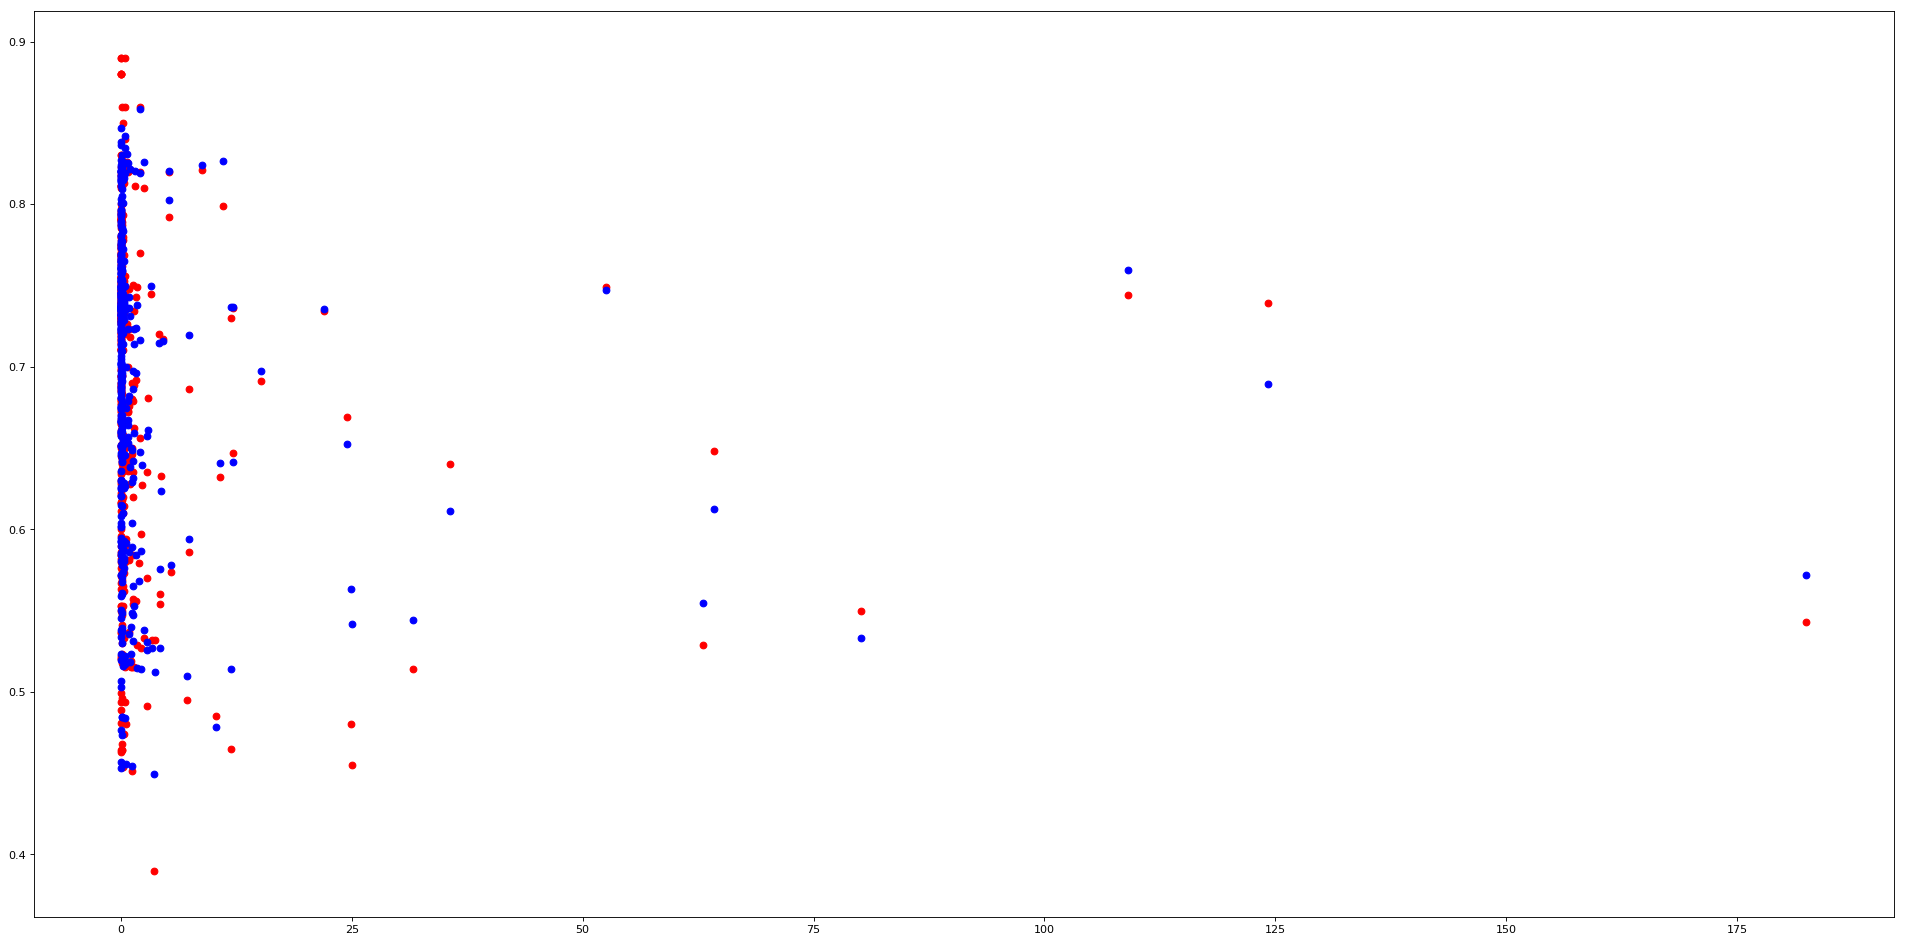

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 100}
Mean squared error: 0.0007097295921116147
Score (Variance): 0.9264304530160656
--------------------------------------------------------------------------------------------------------



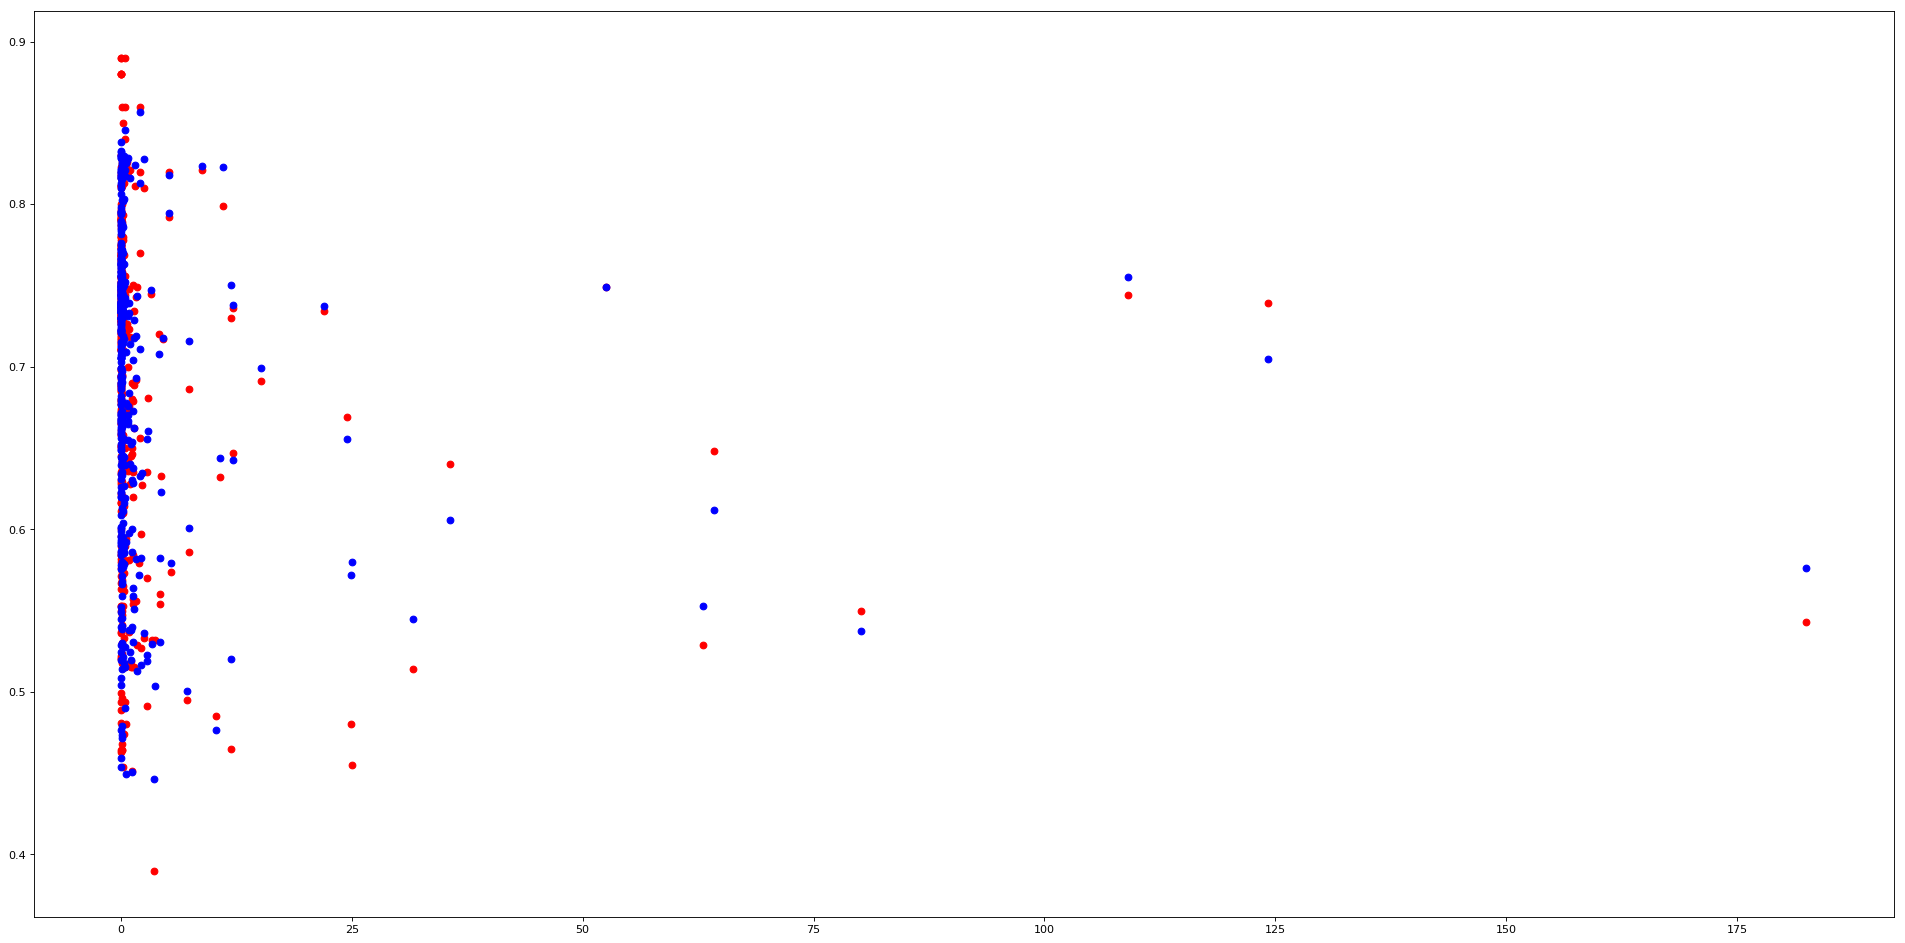

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 150}
Mean squared error: 0.0007006519686017851
Score (Variance): 0.927371426390618
--------------------------------------------------------------------------------------------------------



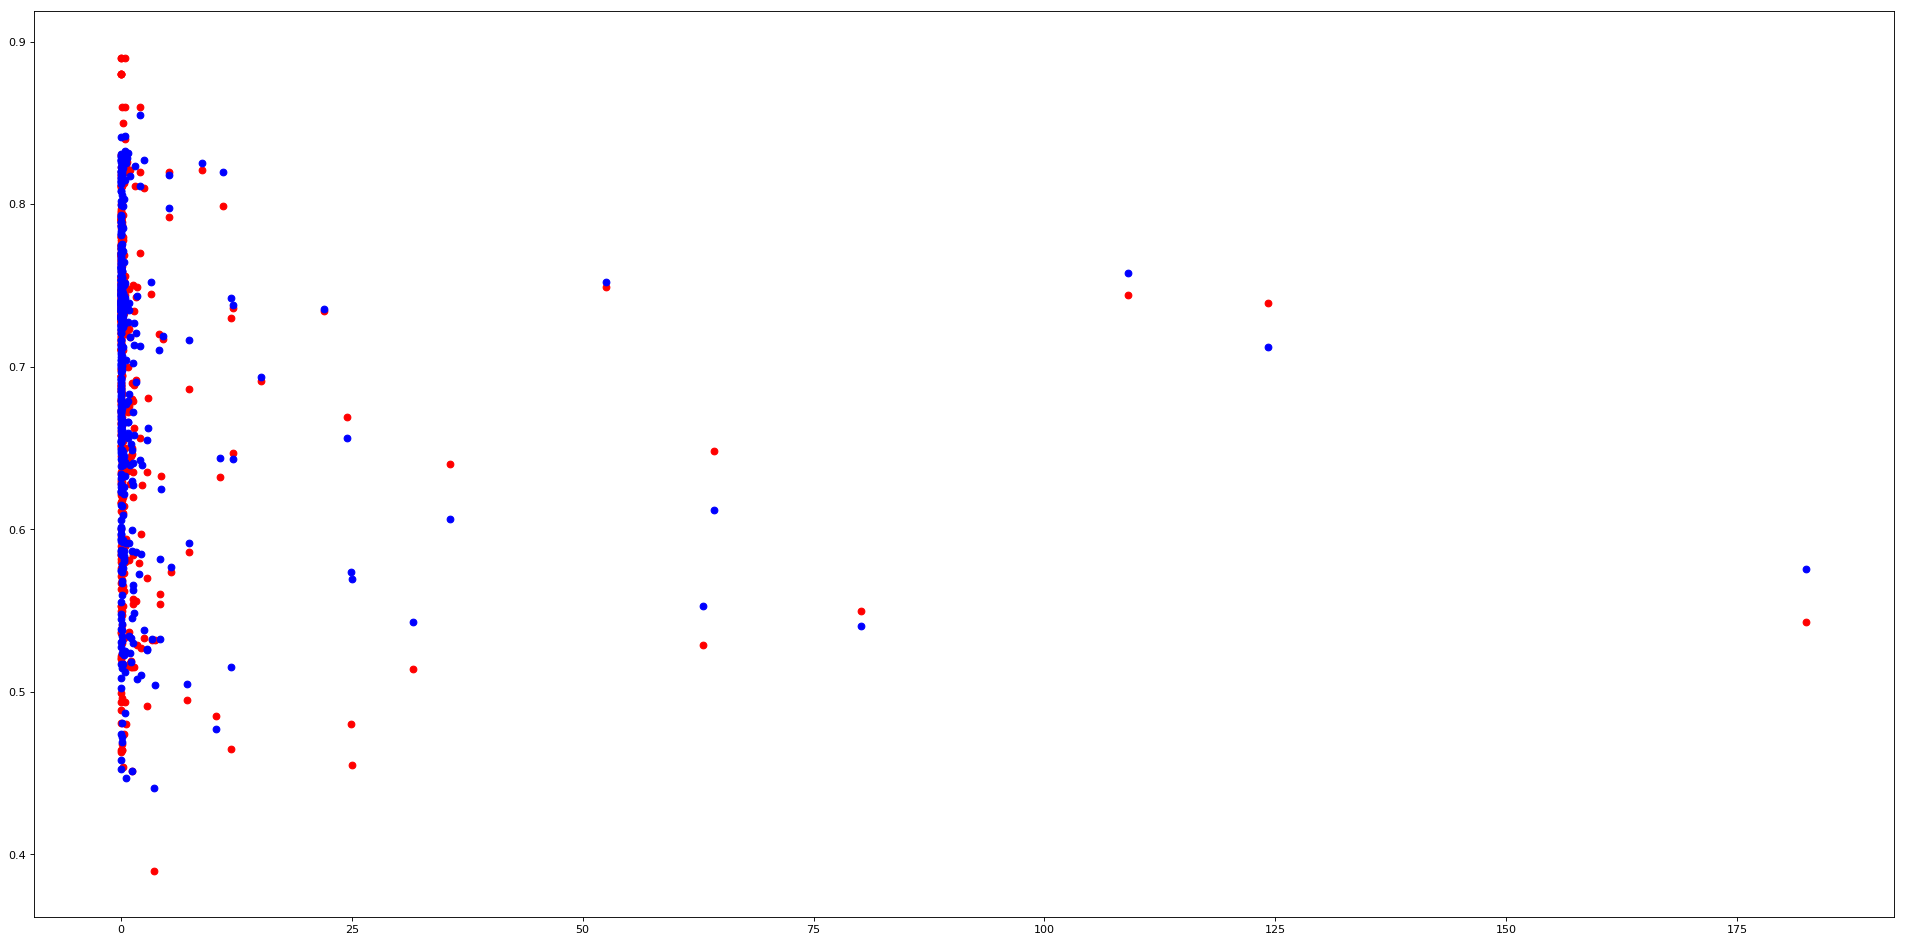

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 200}
Mean squared error: 0.0006942568251831469
Score (Variance): 0.9280343377436682
--------------------------------------------------------------------------------------------------------



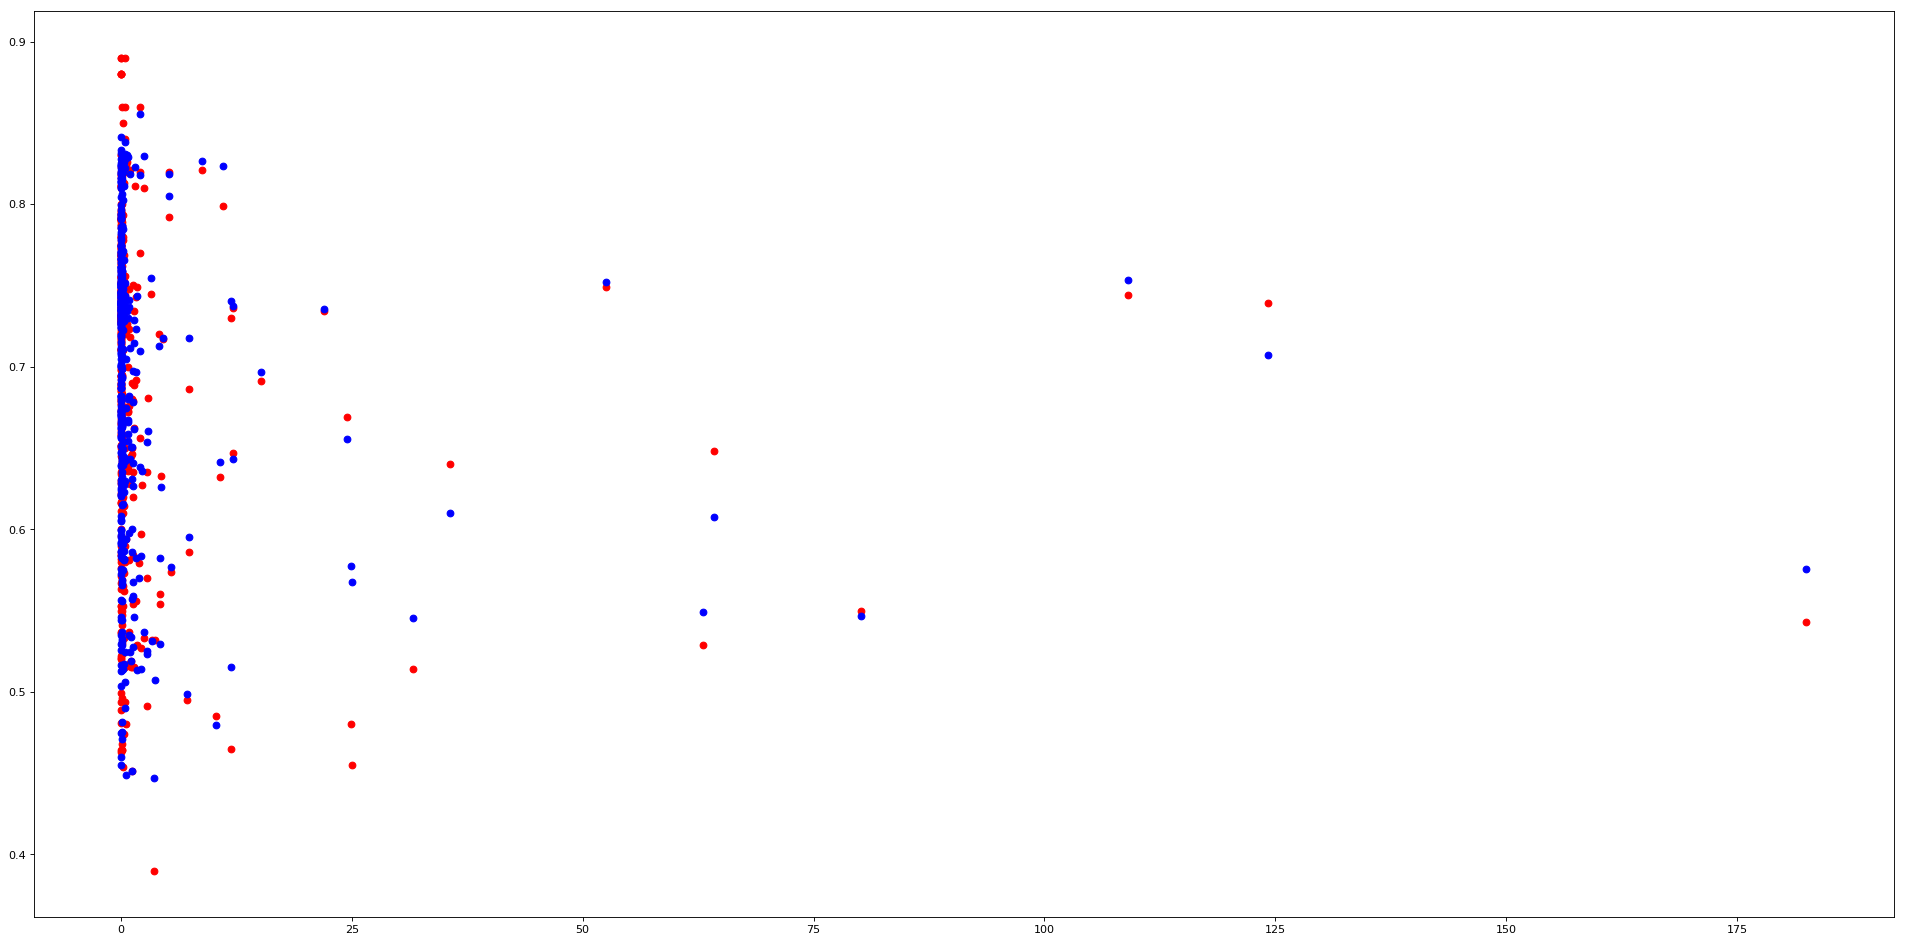

In [117]:
random_forest_regressor_models = [
    (RandomForestRegressor, {}),
    (RandomForestRegressor, {"n_estimators" : 5}),
    (RandomForestRegressor, {"n_estimators" : 20}),
    (RandomForestRegressor, {"n_estimators" : 50}),
    (RandomForestRegressor, {"n_estimators" : 100}),
    (RandomForestRegressor, {"n_estimators" : 150}),
    (RandomForestRegressor, {"n_estimators" : 200}),
    (RandomForestRegressor, {"criterion": "mae"}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 5}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 20}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 50}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 100}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 150}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 200}),

]

for i, (Model, kwargs) in enumerate(random_forest_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Score (Variance):", model.score(X_test, y_test))
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_expected_and_trained_data(X_test, y_test, y_predicted)

# Random Forest - Regression - Polynomial Features

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {}
Mean squared error: 0.011032731923301065
Score (Variance): -0.1436370958938442
--------------------------------------------------------------------------------------------------------



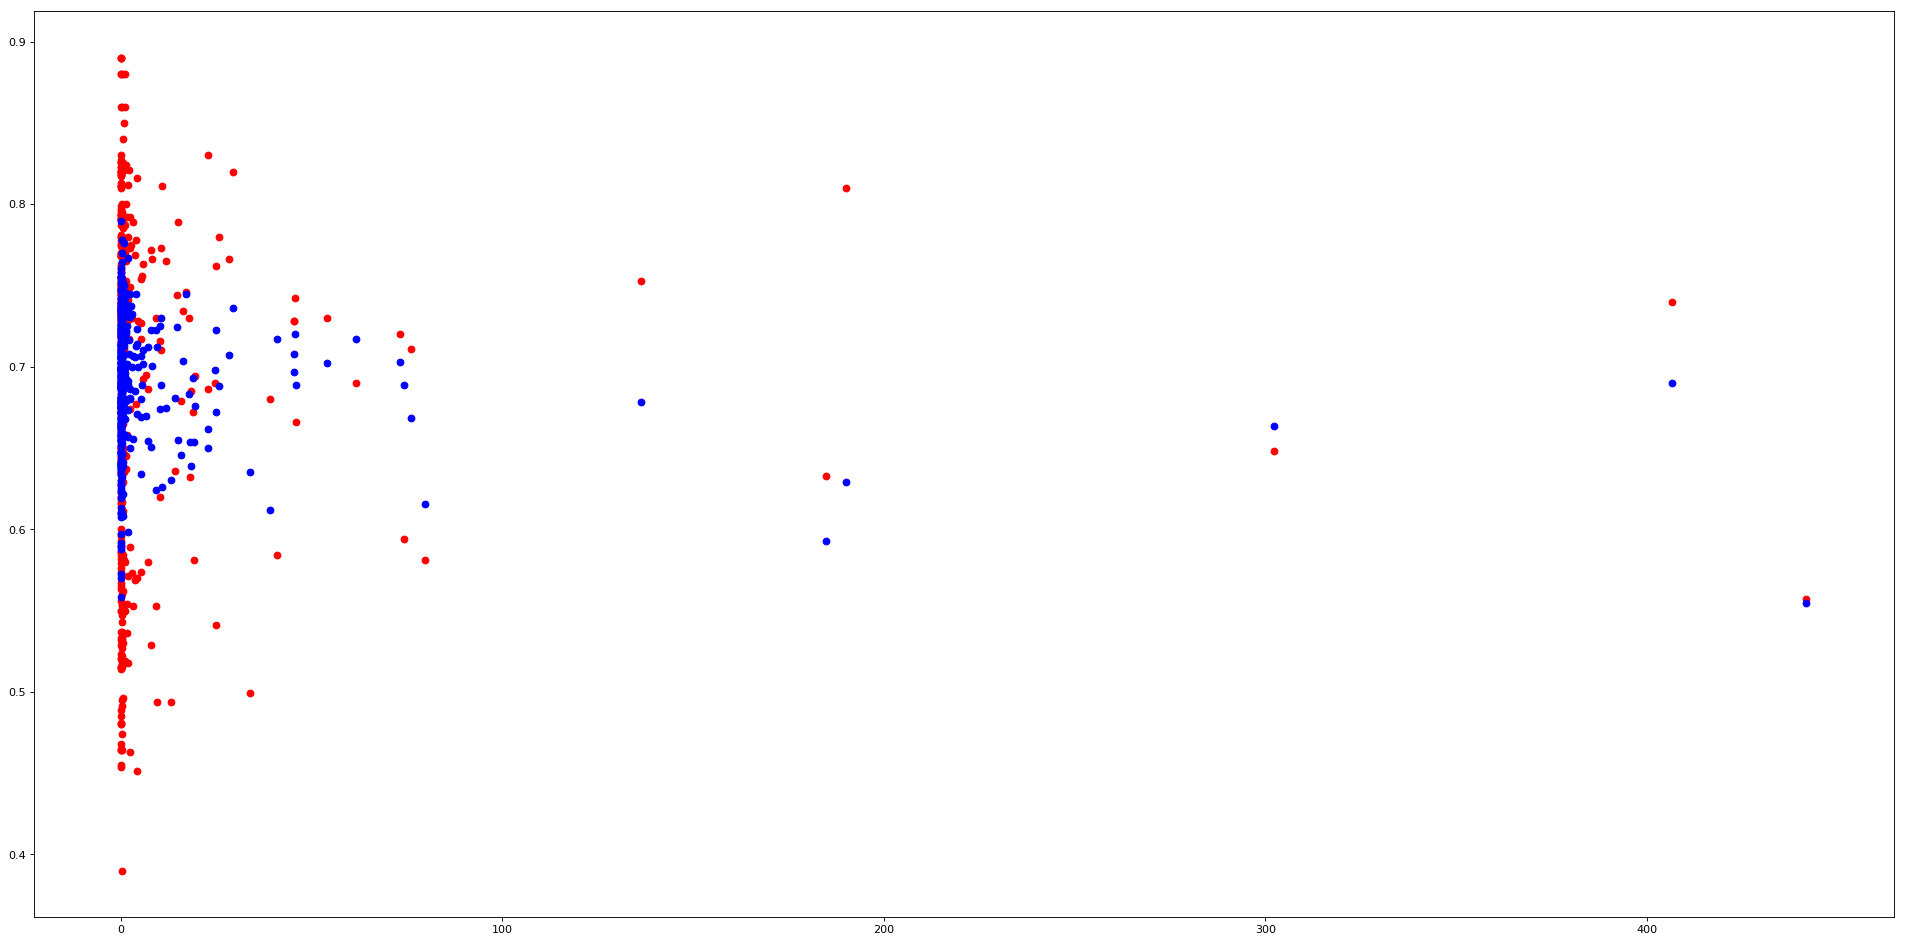

RandomForestRegressor {'n_estimators': 5}
Mean squared error: 0.012011802212023383
Score (Variance): -0.2451261114390817
--------------------------------------------------------------------------------------------------------



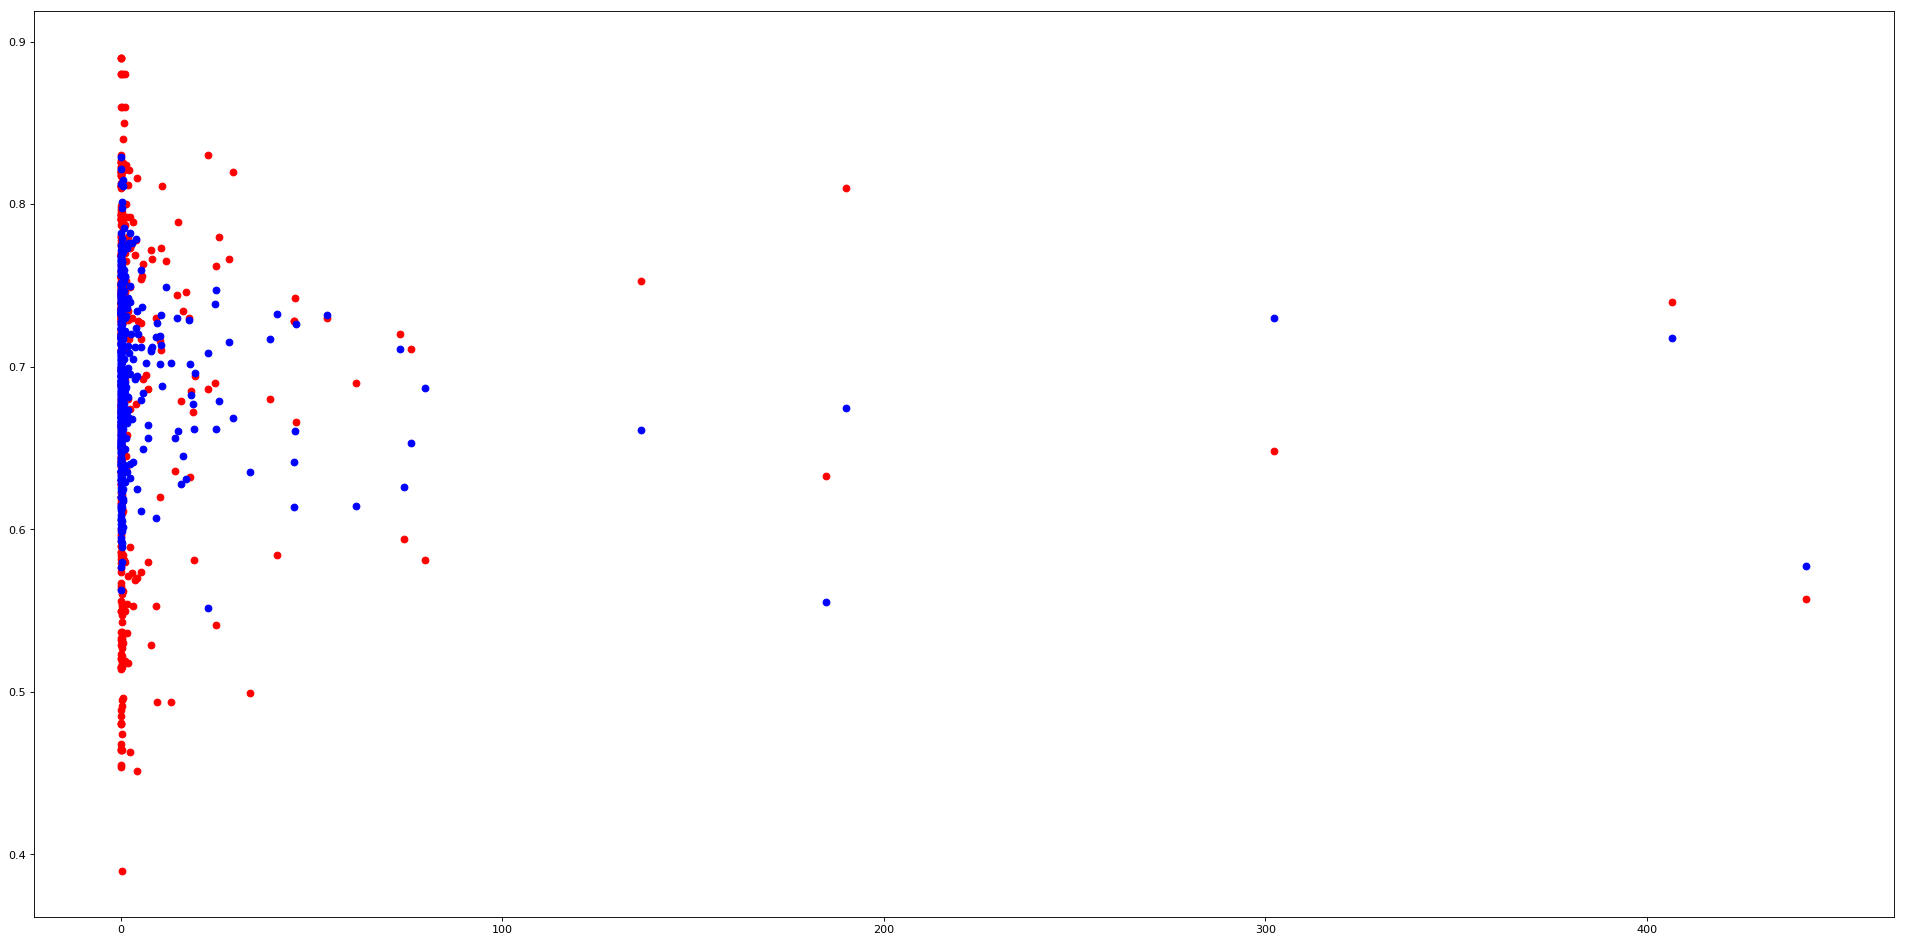

RandomForestRegressor {'n_estimators': 20}
Mean squared error: 0.010865819004540759
Score (Variance): -0.12633514321292671
--------------------------------------------------------------------------------------------------------



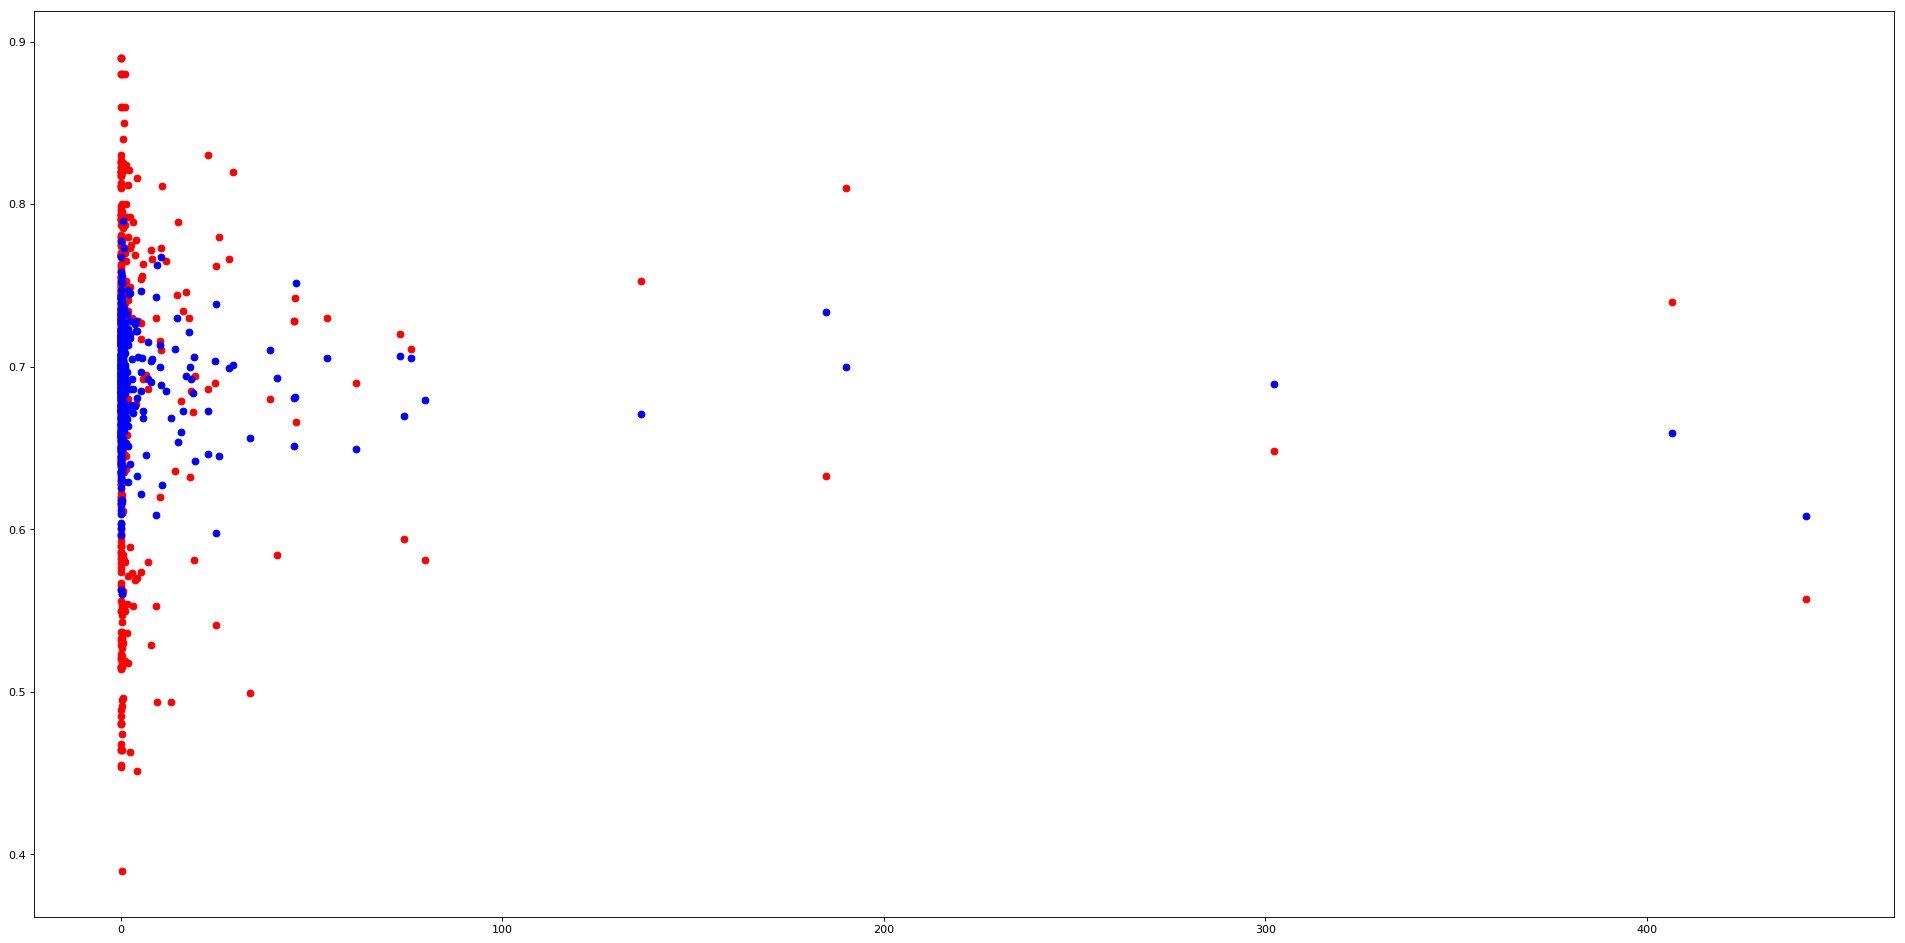

RandomForestRegressor {'n_estimators': 50}
Mean squared error: 0.01028382759467672
Score (Variance): -0.06600675216352969
--------------------------------------------------------------------------------------------------------



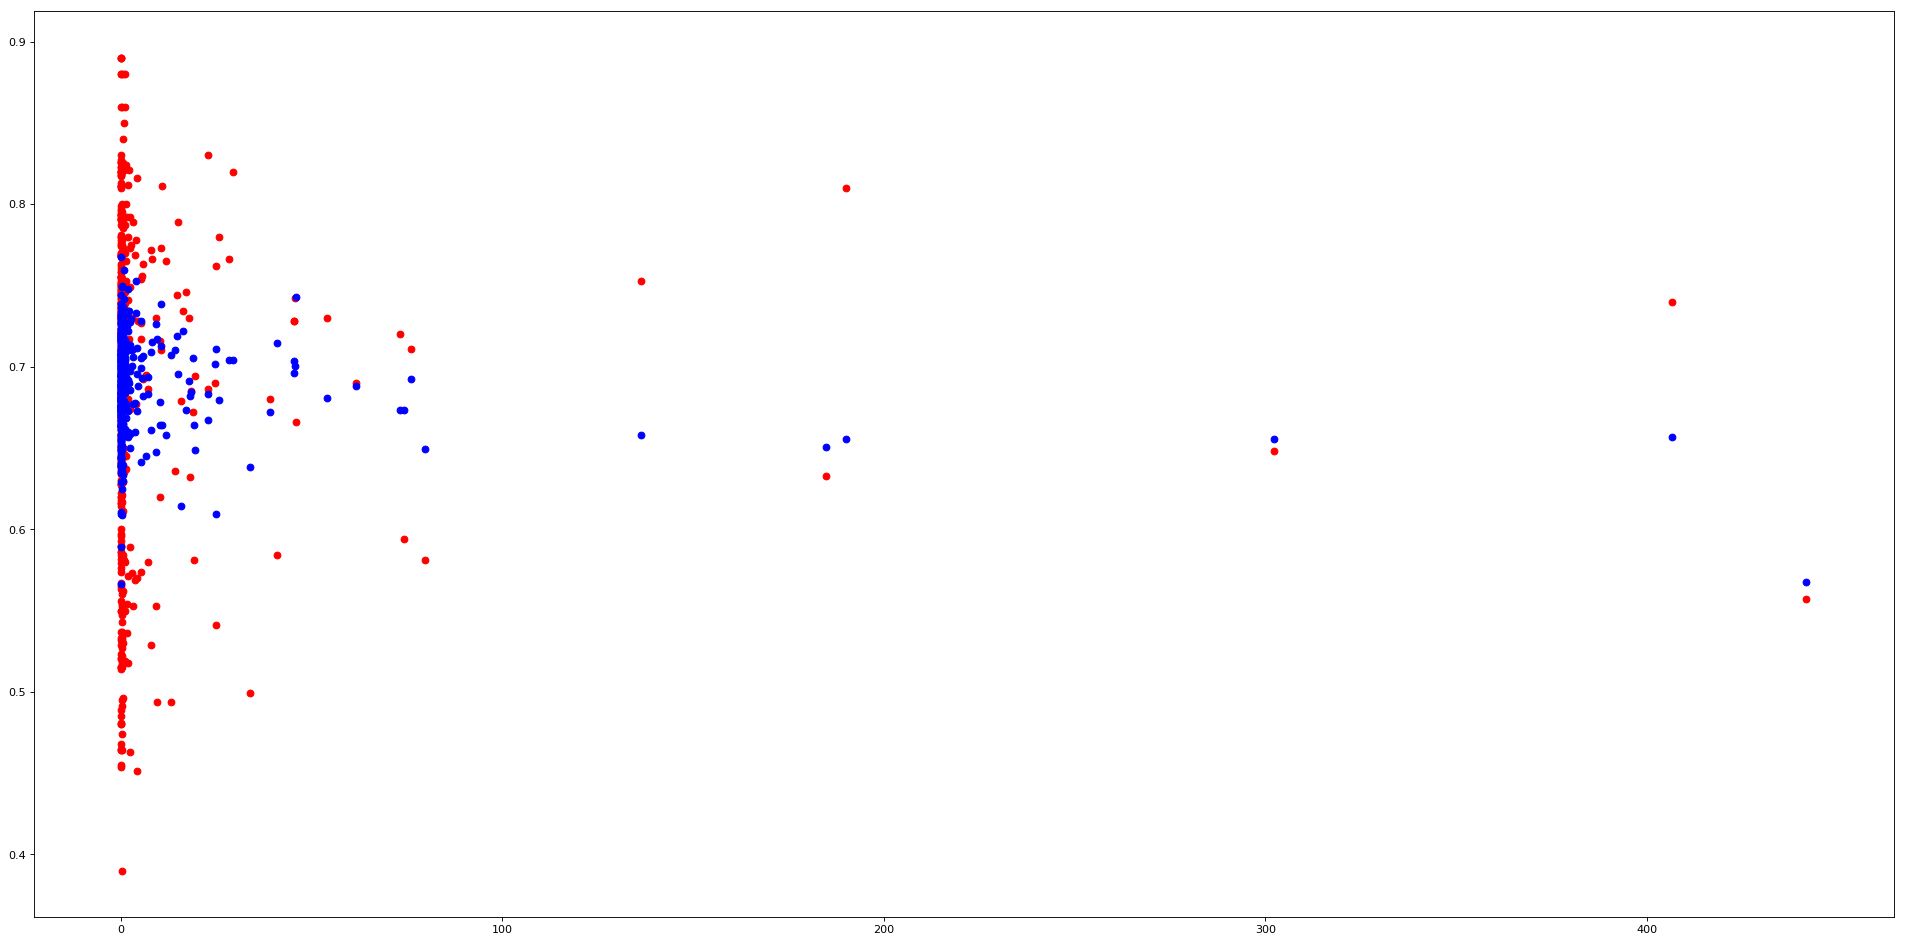

RandomForestRegressor {'n_estimators': 100}
Mean squared error: 0.010276753059787494
Score (Variance): -0.06527341606946324
--------------------------------------------------------------------------------------------------------



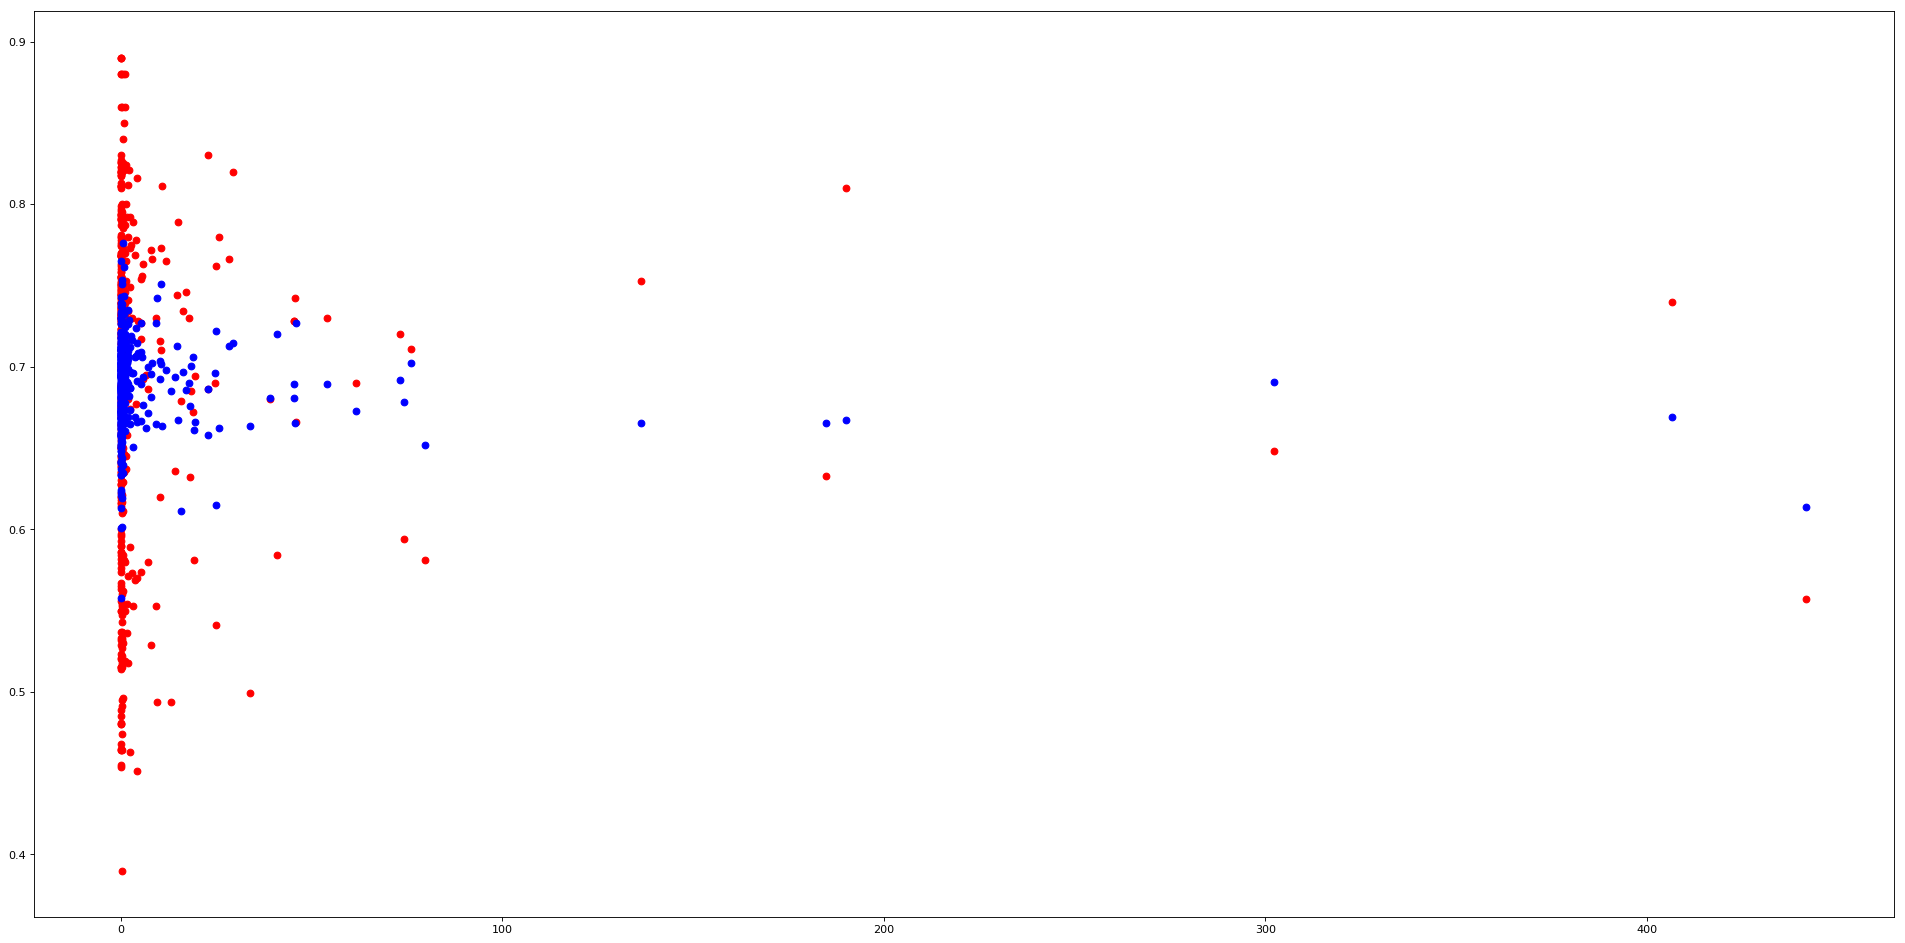

RandomForestRegressor {'n_estimators': 150}
Mean squared error: 0.01012559870566592
Score (Variance): -0.04960497349503479
--------------------------------------------------------------------------------------------------------



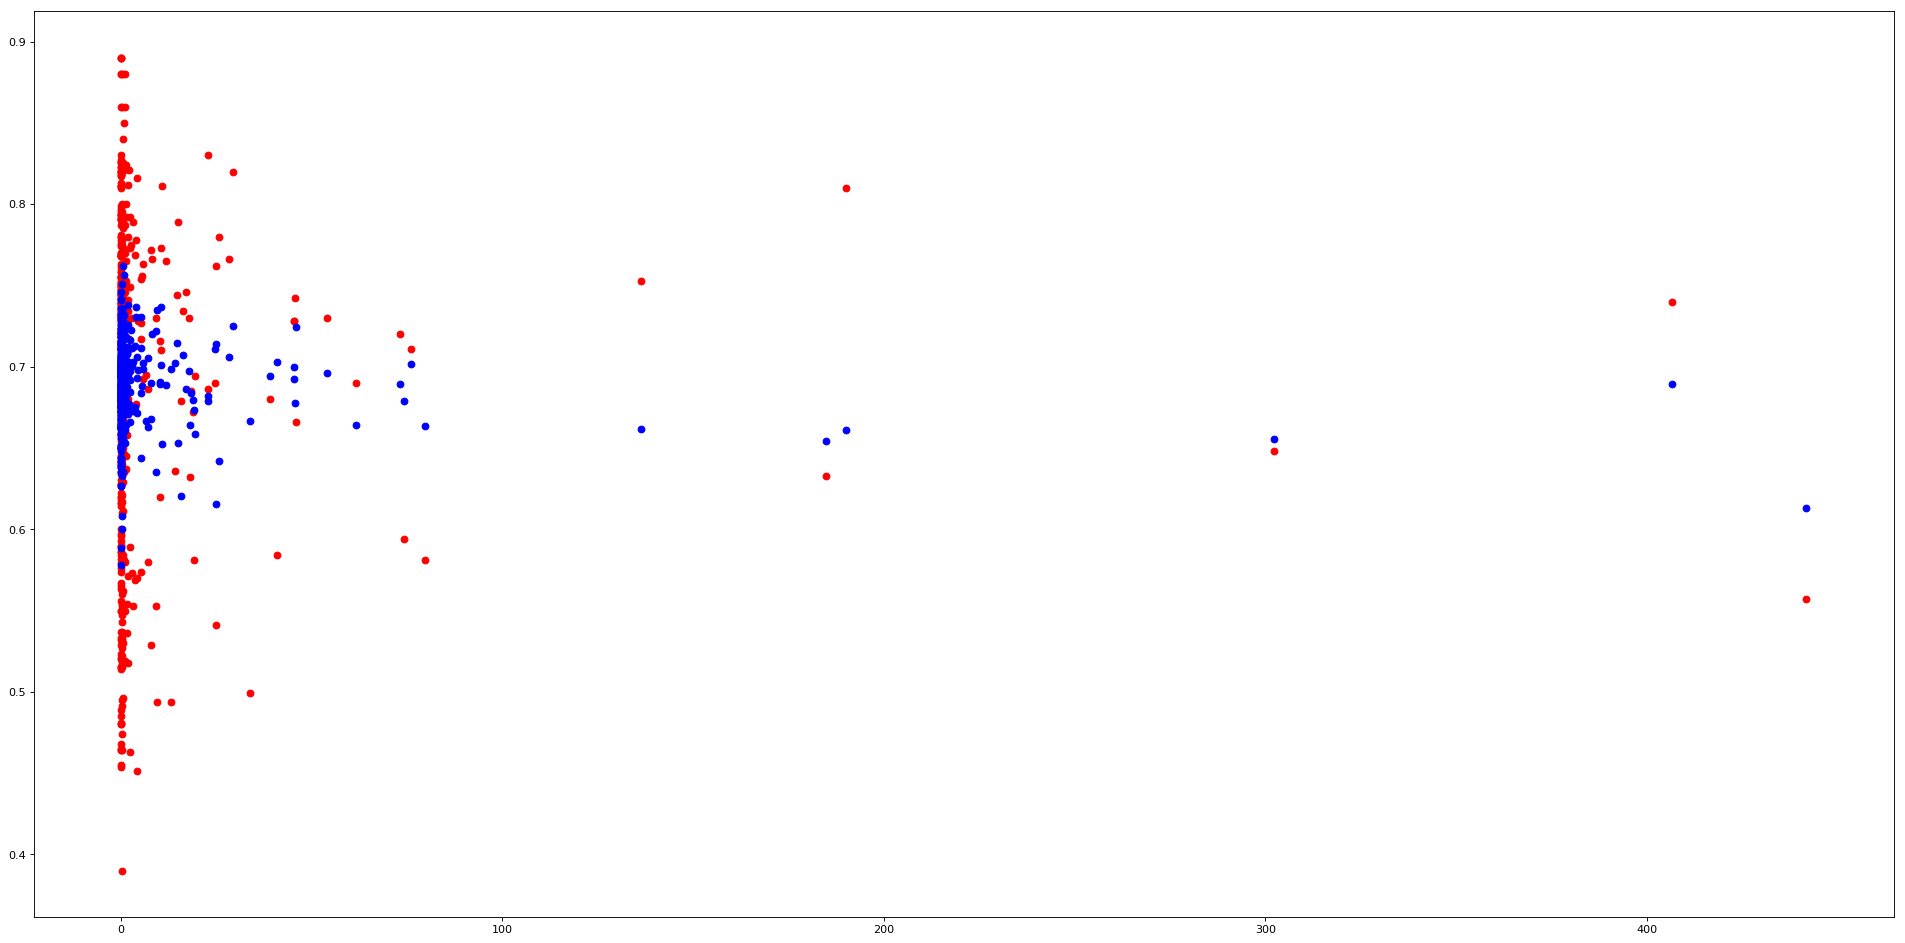

RandomForestRegressor {'n_estimators': 200}
Mean squared error: 0.010041076643750653
Score (Variance): -0.040843538331040374
--------------------------------------------------------------------------------------------------------



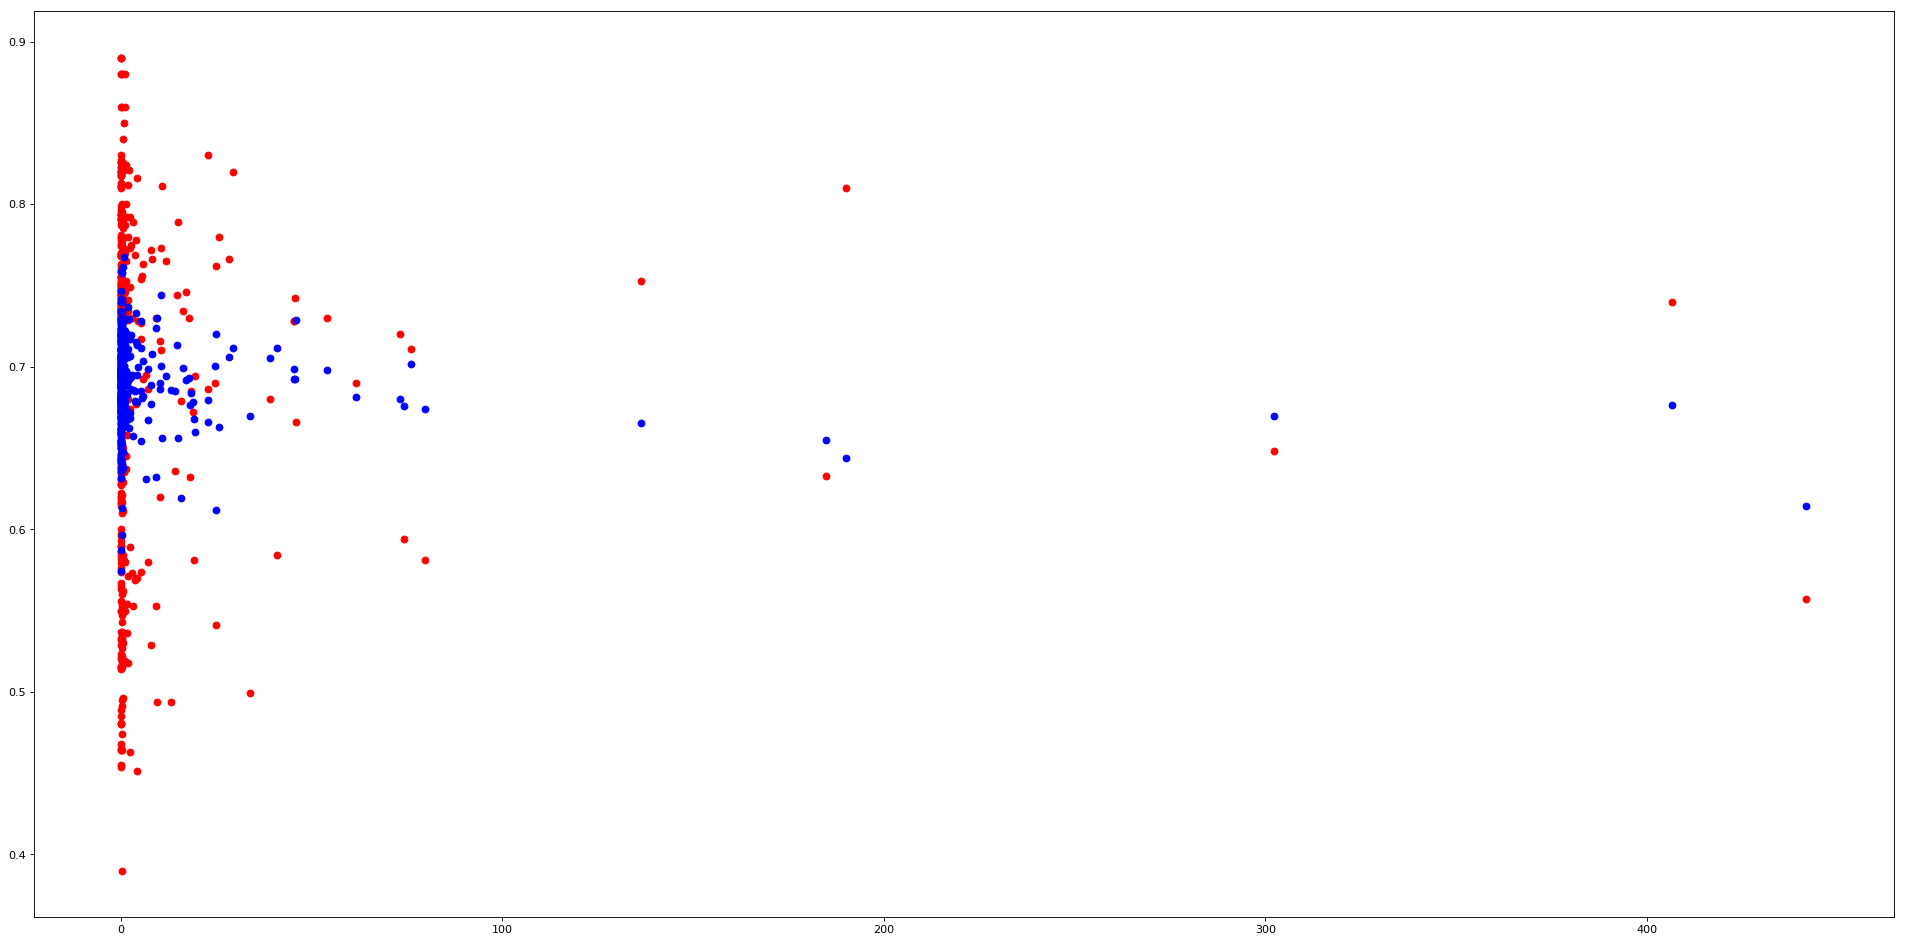

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {'criterion': 'mae'}
Mean squared error: 0.011092644911559616
Score (Variance): -0.14984758993780978
--------------------------------------------------------------------------------------------------------



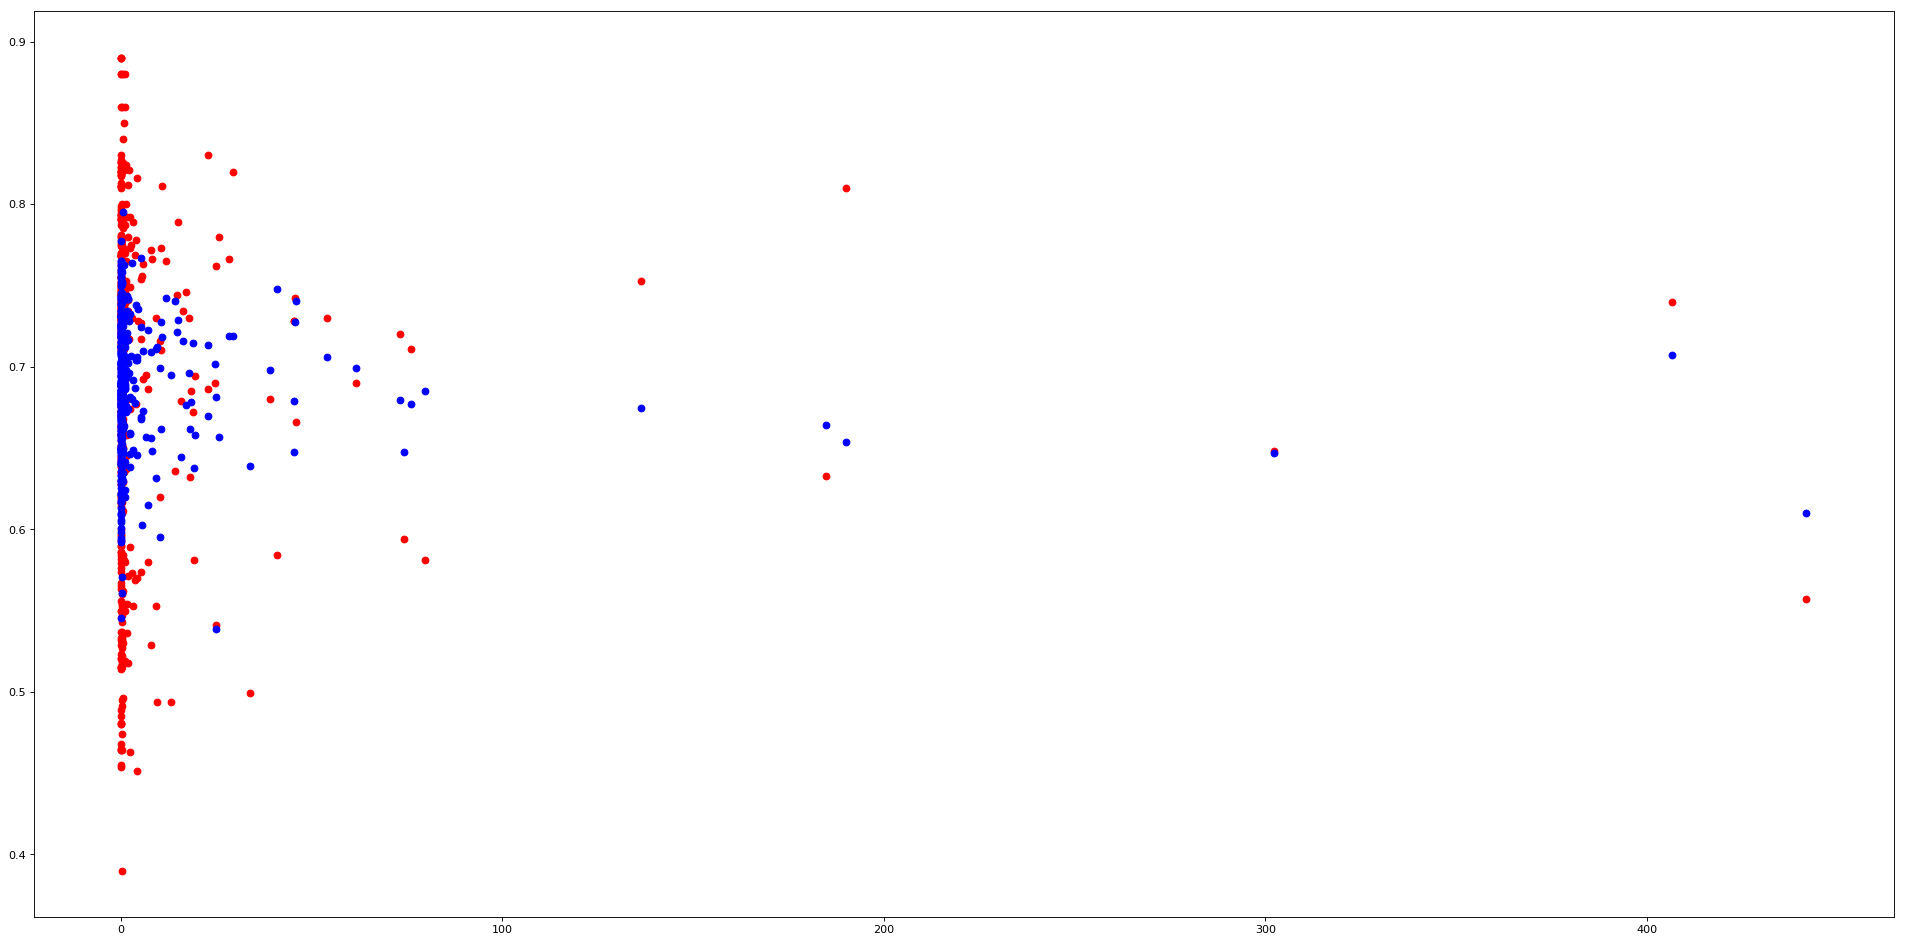

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 5}
Mean squared error: 0.012648788564738726
Score (Variance): -0.31115519903114364
--------------------------------------------------------------------------------------------------------



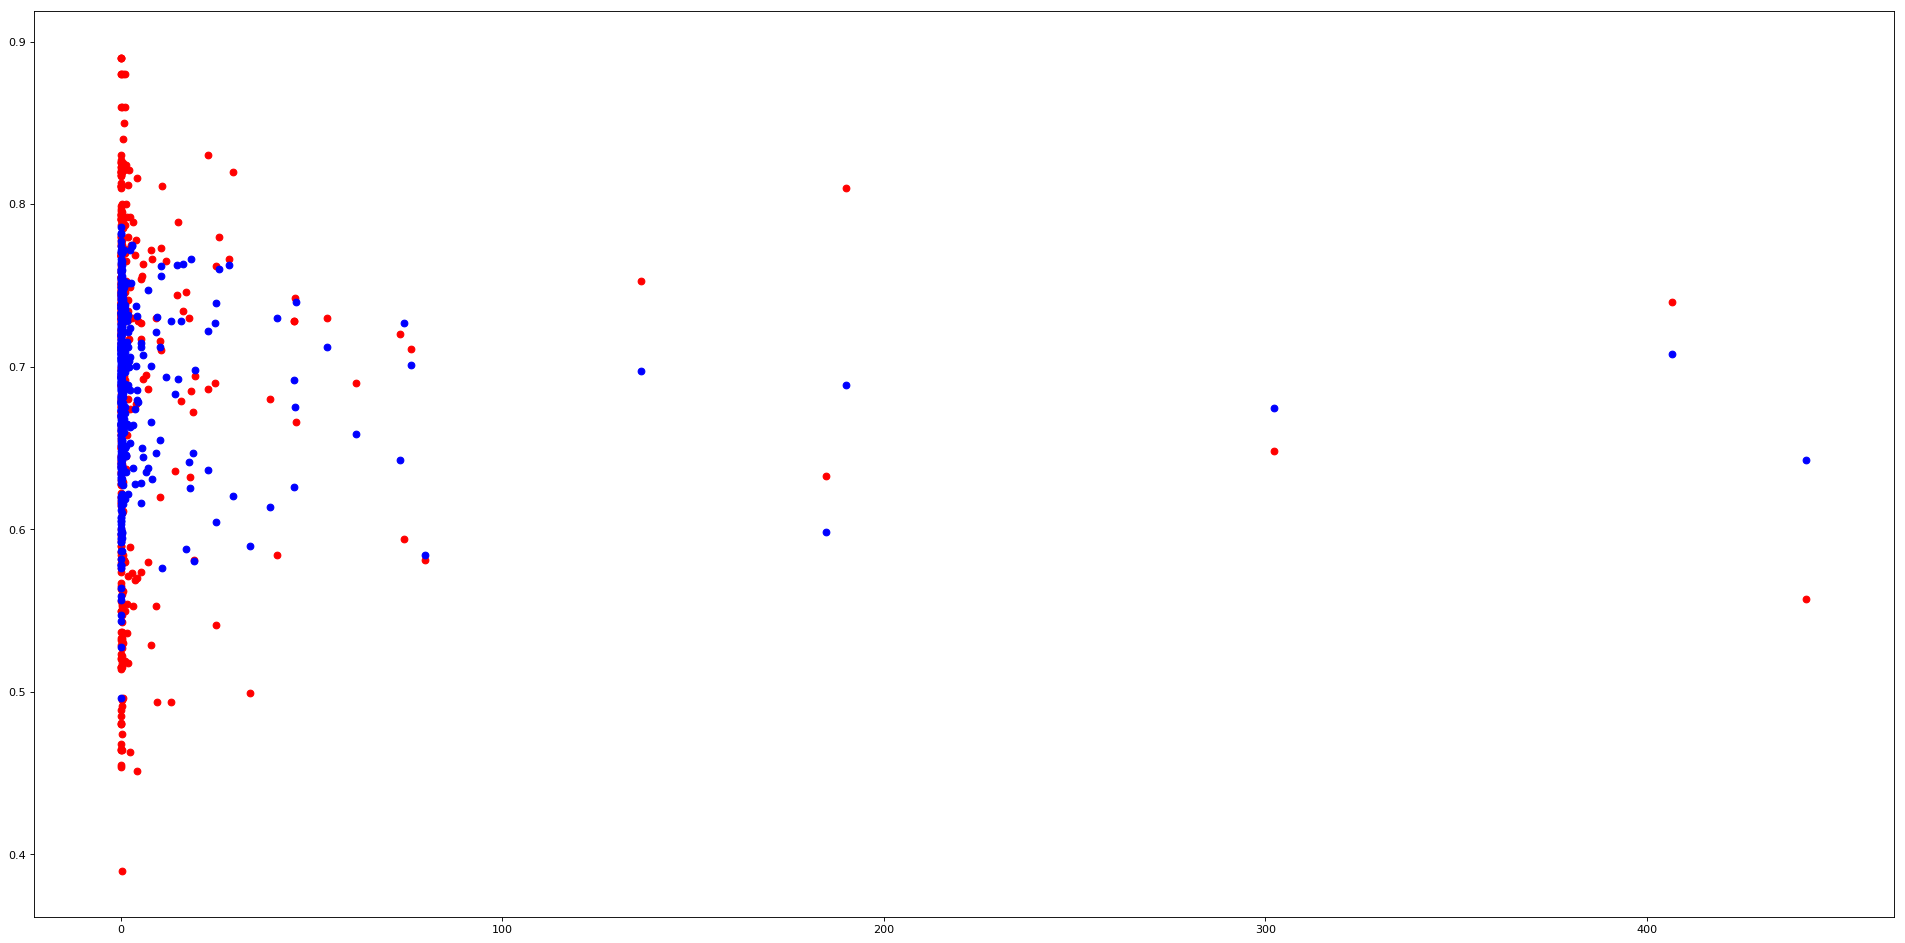

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 20}
Mean squared error: 0.0102216571638341
Score (Variance): -0.0595622548736825
--------------------------------------------------------------------------------------------------------



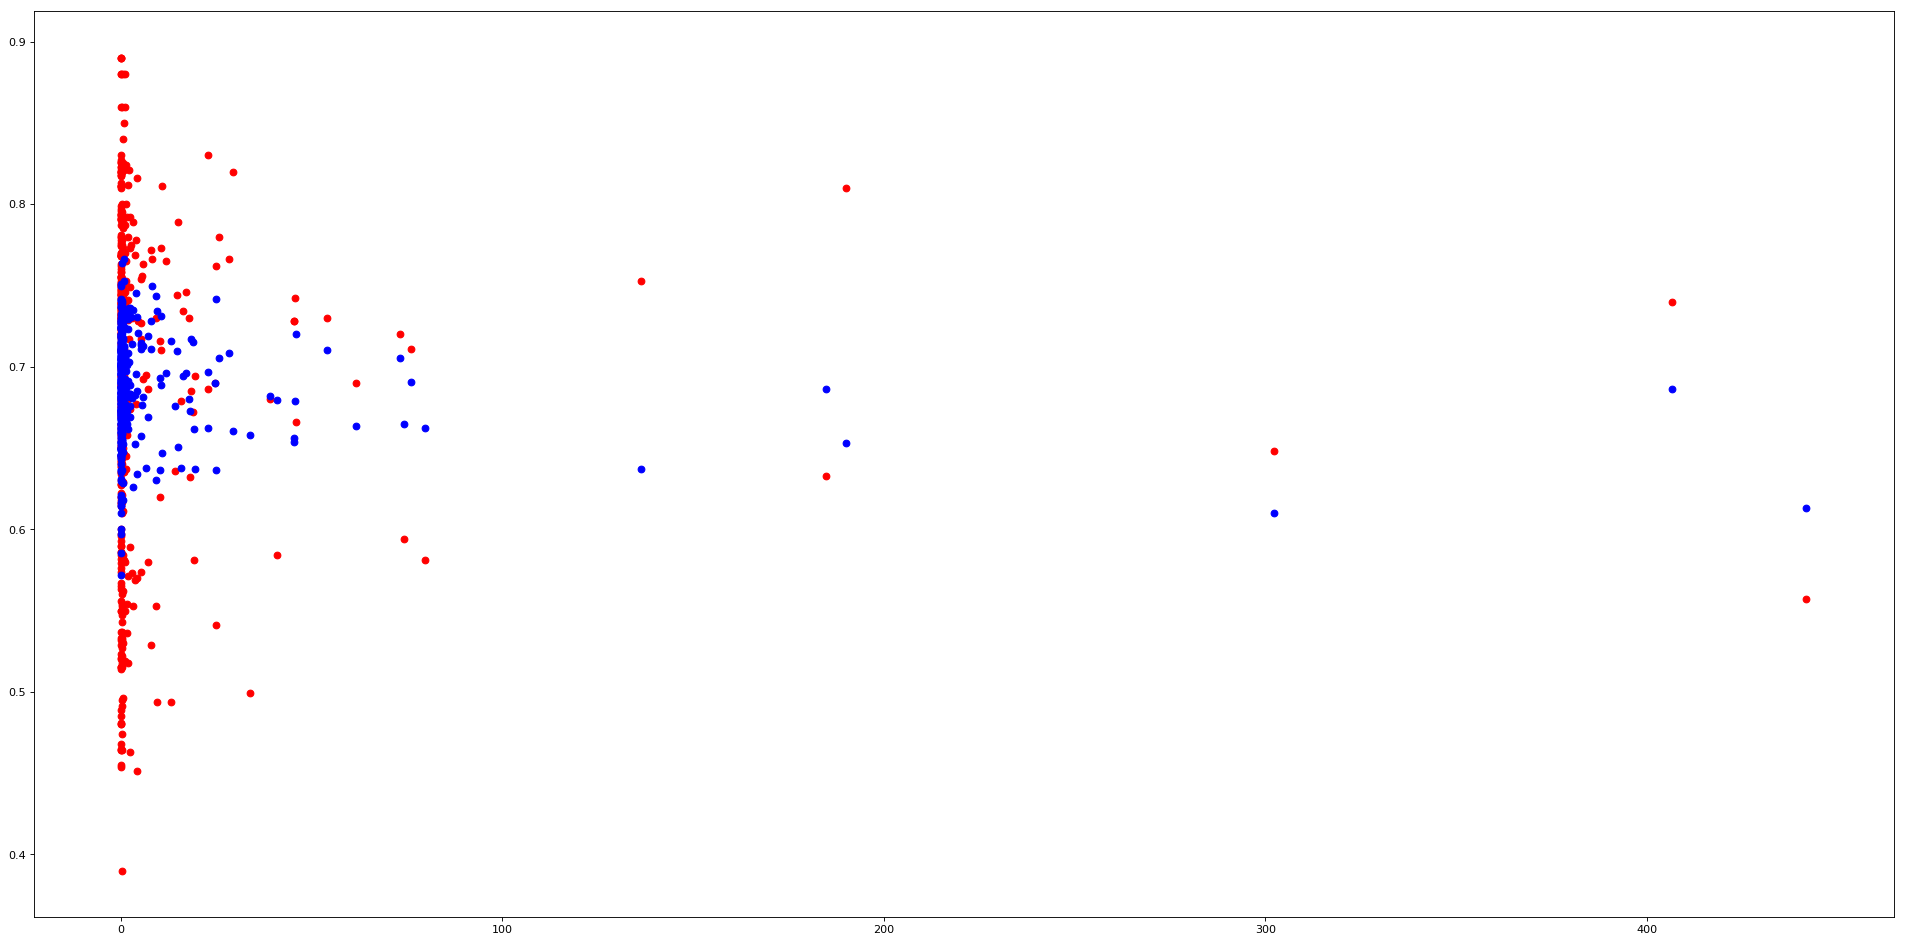

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 50}
Mean squared error: 0.010284087480421925
Score (Variance): -0.06603369154545047
--------------------------------------------------------------------------------------------------------



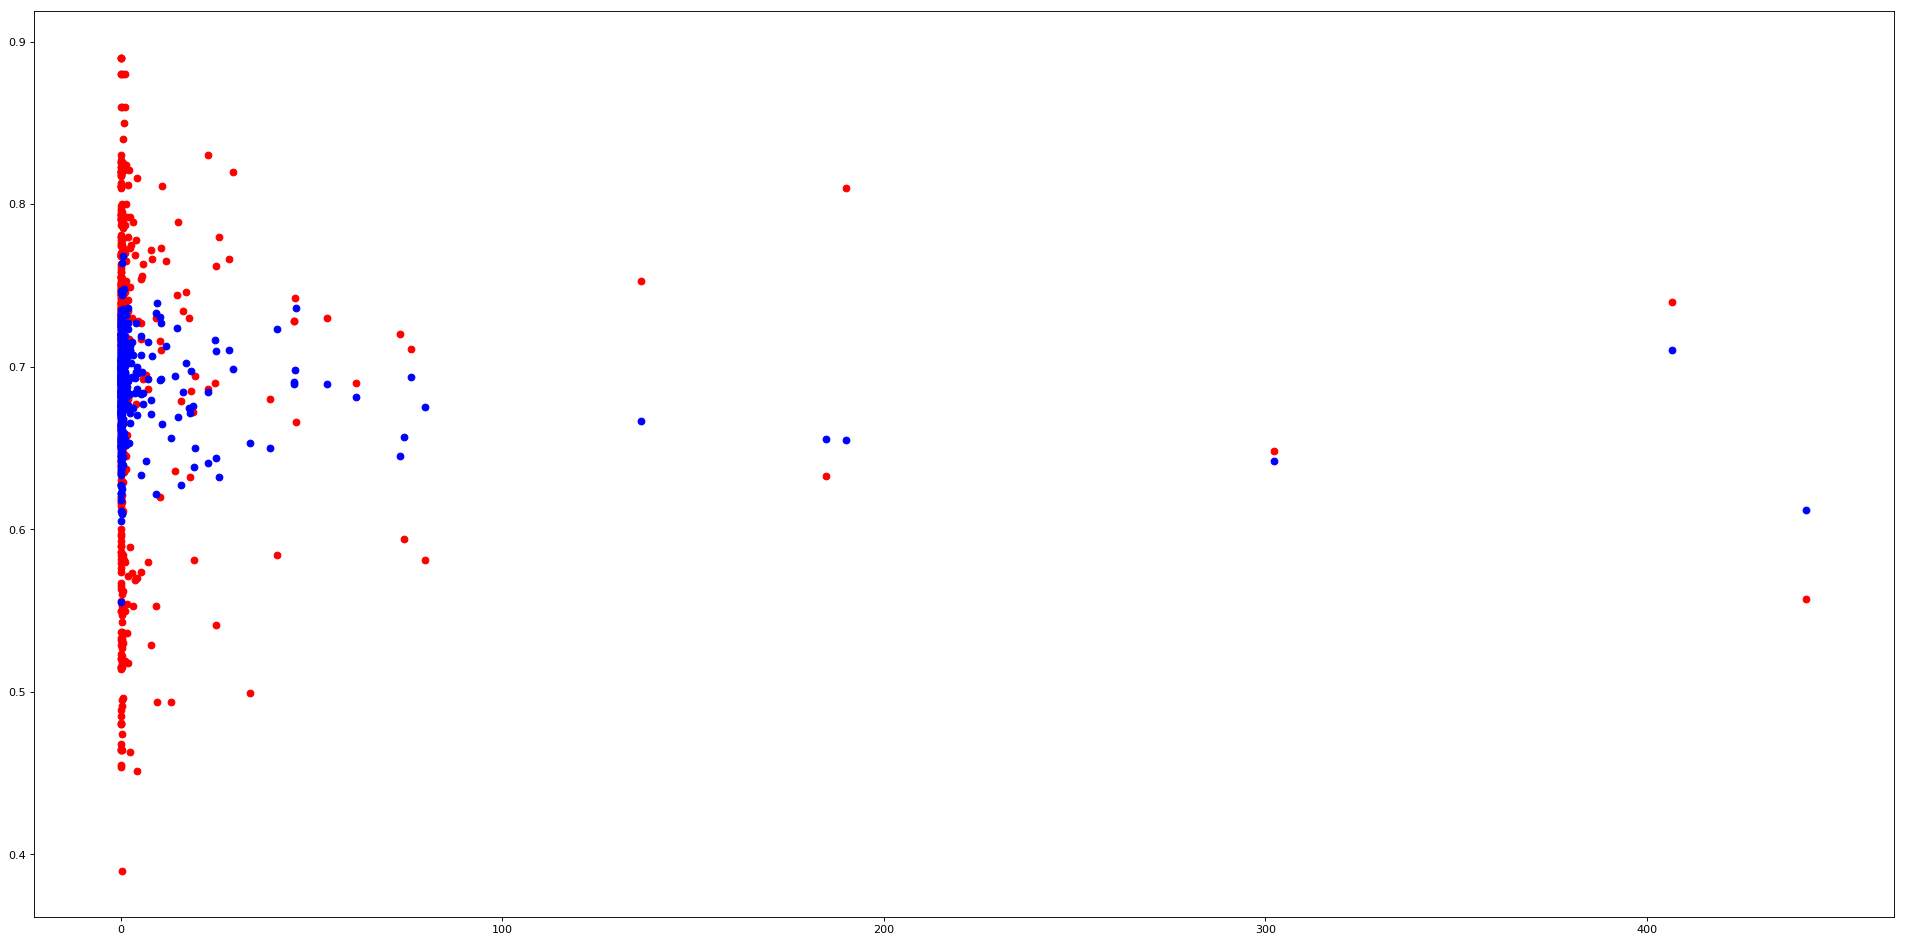

KeyboardInterrupt: ignored

In [118]:
random_forest_regressor_models = [
    (RandomForestRegressor, {}),
    (RandomForestRegressor, {"n_estimators" : 5}),
    (RandomForestRegressor, {"n_estimators" : 20}),
    (RandomForestRegressor, {"n_estimators" : 50}),
    (RandomForestRegressor, {"n_estimators" : 100}),
    (RandomForestRegressor, {"n_estimators" : 150}),
    (RandomForestRegressor, {"n_estimators" : 200}),
    (RandomForestRegressor, {"criterion": "mae"}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 5}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 20}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 50}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 100}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 150}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 200}),

]

for i, (Model, kwargs) in enumerate(random_forest_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train_poly, y_train)
  y_predicted = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Score (Variance):", model.score(X_test_poly, y_test))
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_expected_and_trained_data(X_test_poly, y_test, y_predicted)